In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#sys.path.insert(0, '/Users/Corey4005/Desktop/repos/SCANAnalysis/SCAN-scripts/')#for my windows machine
#sys.path.insert(0, '/Users/coreywalker/Desktop/NOAA/SCANAnalysis/SCAN-scripts/')#for my Macbook 
sys.path.insert(0, '/rhome/cwalker/Desktop/repositories/SCANAnalysis/SCAN-scripts/')#for my Linux Machine

In [2]:
from datasets import SM_VS_ESI_ANOM_READ, SCAN_META_READ, DROUGHT_READ, SCAN_SIG_READ, SOILS_READ

In [3]:
SM_VS_ESI_ANOM_READ

Date    ESI       station  week_x  week_y   2inANOM   4inANOM  \
0     2002-04-30 -0.527  2057:AL:SCAN      18      18 -1.839516 -2.608769   
1     2002-05-21  1.565  2057:AL:SCAN      21      21 -0.349508 -1.356723   
2     2002-05-28  1.484  2057:AL:SCAN      22      22 -0.234778 -0.972001   
3     2002-06-11  0.419  2057:AL:SCAN      24      24 -1.524178 -1.680948   
4     2002-06-18  1.374  2057:AL:SCAN      25      25 -0.737961 -1.484239   
...          ...    ...           ...     ...     ...       ...       ...   
9669  2020-12-02  1.522  2053:AL:SCAN      49      49       NaN -0.038652   
9670  2020-12-09  1.082  2053:AL:SCAN      50      50       NaN -0.628406   
9671  2020-12-16  0.068  2053:AL:SCAN      51      51       NaN -0.564758   
9672  2020-12-23  0.167  2053:AL:SCAN      52      52       NaN -0.662174   
9673  2020-12-30 -0.768  2053:AL:SCAN      53      53       NaN -1.101505   

       8inANOM  20inANOM  40inANOM  
0    -2.434962 -2.084585 -1.598313  
1    -1.702116 -1.692849 -0.663807  
2    -1.546049 -1.441618 -0.890192  
3    -1.660611 -1.608081 -0.872815  
4    -2.253738 -2.101628 -0.901292  
...        ...       ...       ...  
9669  0.551961  0.416028 -1.223196  
9670  0.522642  0.541675 -0.954042  
9671  0.286017  0.215204 -0.923545  
9672  0.122894 -0.009764  0.495781  
9673  1.154264  0.418541  1.125623  

[9674 rows x 10 columns]

In [4]:
#create percent rank of sm anomalies 
SM_VS_ESI_ANOM_READ['2in_pr'] = SM_VS_ESI_ANOM_READ['2inANOM'].rank(pct=True) * 100.0
SM_VS_ESI_ANOM_READ['4in_pr'] = SM_VS_ESI_ANOM_READ['4inANOM'].rank(pct=True) * 100.0
SM_VS_ESI_ANOM_READ['8in_pr'] = SM_VS_ESI_ANOM_READ['8inANOM'].rank(pct=True) * 100.0
SM_VS_ESI_ANOM_READ['20in_pr'] = SM_VS_ESI_ANOM_READ['20inANOM'].rank(pct=True) * 100.0
SM_VS_ESI_ANOM_READ['40in_pr'] = SM_VS_ESI_ANOM_READ['40inANOM'].rank(pct=True) * 100.0

In [5]:
def droughtLabel(percent_rank):
    #this function takes in a percent rank (float) and returns a drought category (float)
    if (percent_rank <= 30.0) & (percent_rank>=21.0):
        return 0.0
    elif (percent_rank > 30.0):
        return np.nan
    elif (percent_rank <= 20.0) & (percent_rank>=11.0):
        return 1.0
    elif (percent_rank <= 10.0) & (percent_rank>=6.0):
        return 2.0
    elif (percent_rank <=5.0) & (percent_rank>=3.0):
        return 3.0
    elif (percent_rank <=3.0):
        return 4.0

In [6]:
#get the drought category for percent rank (DC) for soil moisture stations (SMS)
SM_VS_ESI_ANOM_READ['2inSMSDC'] = SM_VS_ESI_ANOM_READ['2in_pr'].apply(droughtLabel)
SM_VS_ESI_ANOM_READ['4inSMSDC'] = SM_VS_ESI_ANOM_READ['4in_pr'].apply(droughtLabel)
SM_VS_ESI_ANOM_READ['8inSMSDC'] = SM_VS_ESI_ANOM_READ['8in_pr'].apply(droughtLabel)
SM_VS_ESI_ANOM_READ['20inSMSDC']= SM_VS_ESI_ANOM_READ['20in_pr'].apply(droughtLabel)
SM_VS_ESI_ANOM_READ['40inSMSDC']= SM_VS_ESI_ANOM_READ['40in_pr'].apply(droughtLabel)

In [7]:
#what is the average ESI for each drought category?
depths = []
category = []
averageESI = []

for i in ['2inSMSDC', '4inSMSDC', '8inSMSDC', '20inSMSDC', '40inSMSDC']:
    droughtFrame = SM_VS_ESI_ANOM_READ[[i, "ESI"]]
    for j in droughtFrame[i].unique():
        categoryFrame = droughtFrame[droughtFrame[i]==j]
        if np.isnan(j):
            pass
        else:
            avgESI = categoryFrame['ESI'].mean()
            depths.append(i)
            category.append(j)
            averageESI.append(avgESI)

df = pd.DataFrame()
df['depth'] = depths
df['category']=category
df['meanESI']=averageESI

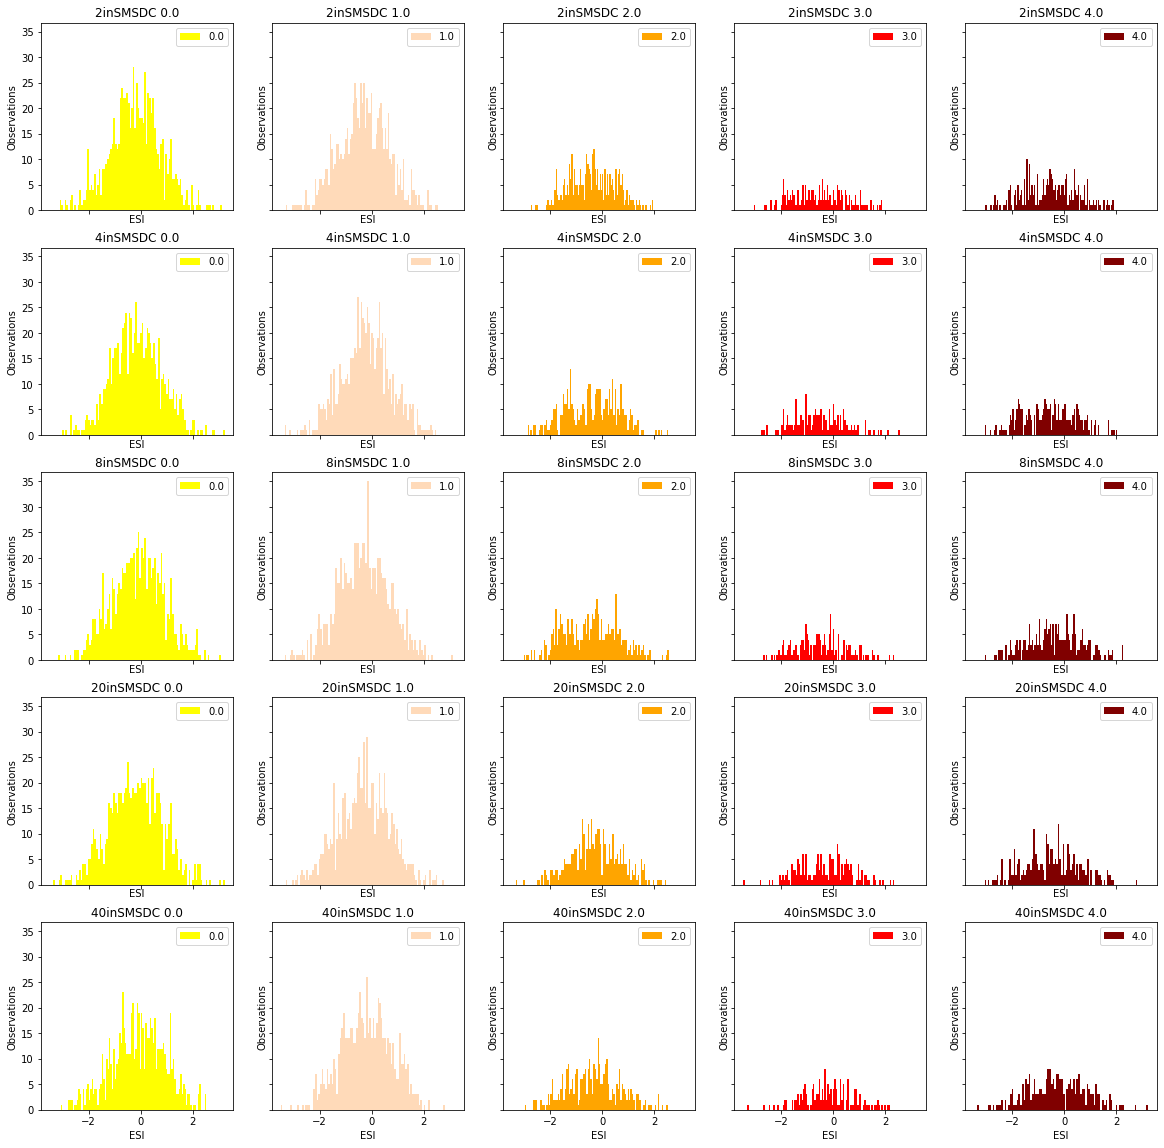

In [8]:
#what is the variability for each category?
fig, ax = plt.subplots(figsize=(20,20),nrows=5, ncols=5, sharey=True, sharex=True)
axes = ax.flatten()
count = 0
colorKey = {0:"yellow",1:"peachpuff",2:"orange",3:"red",4:"maroon"}
for i in ['2inSMSDC', '4inSMSDC', '8inSMSDC', '20inSMSDC', '40inSMSDC']:
    droughtFrame = SM_VS_ESI_ANOM_READ[[i, "ESI"]]
    for c in [0.0, 1.0, 2.0, 3.0, 4.0]:
        categoryFrame=droughtFrame[droughtFrame[i]==c]
        if np.isnan(c):
            pass
        else:
            axes[count].hist(categoryFrame['ESI'], label=c, bins=100, color=colorKey.get(c))
            axes[count].legend()
            axes[count].set_title(i + " " + str(c))
            axes[count].set_ylabel("Observations")
            axes[count].set_xlabel("ESI")
            count+=1
          

In [9]:
df.sort_values(["depth", "category"], inplace=True)

Text(0.5, 0, 'Drought Category')

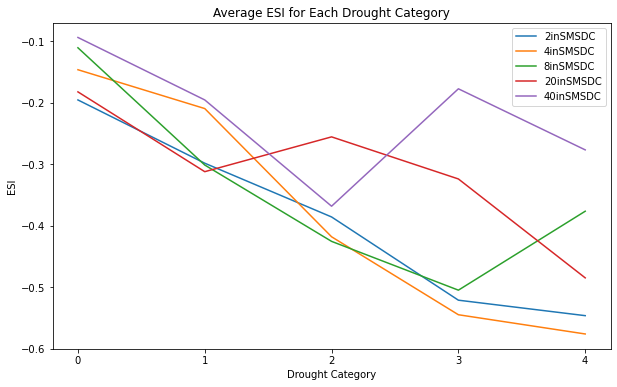

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
for i in ['2inSMSDC', '4inSMSDC', '8inSMSDC', '20inSMSDC', '40inSMSDC']:
    depthFrame = df[df['depth']==i]
    plotFrame = depthFrame.set_index('category')
    ax.plot(plotFrame['meanESI'], label=i)
    ax.legend()
ax.xaxis.set_ticks([0,1,2,3,4])
ax.set_title("Average ESI for Each Drought Category")
ax.set_ylabel("ESI")
ax.set_xlabel("Drought Category")

In [11]:
scanTriplets = SCAN_META_READ[['station', 'Station Name']]

In [12]:
DROUGHT_READ.rename(columns={'station_names':'Station Name', 'date':'Date'}, inplace=True)

In [13]:
drought_data = DROUGHT_READ.merge(scanTriplets, on='Station Name')

In [14]:
DM_test = drought_data[drought_data['station']=='2056:AL:SCAN']
ESI_test = SM_VS_ESI_ANOM_READ[SM_VS_ESI_ANOM_READ['station']=='2056:AL:SCAN']
SMSDM_test = SM_VS_ESI_ANOM_READ[SM_VS_ESI_ANOM_READ['station']=='2056:AL:SCAN']
ESI_test['Date']=pd.to_datetime(ESI_test['Date'], format='%Y-%m-%d')
SMSDM_test['Date']=pd.to_datetime(SMSDM_test['Date'], format='%Y-%m-%d')

/tmp/ipykernel_27158/3058360447.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ESI_test['Date']=pd.to_datetime(ESI_test['Date'], format='%Y-%m-%d')
/tmp/ipykernel_27158/3058360447.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SMSDM_test['Date']=pd.to_datetime(SMSDM_test['Date'], format='%Y-%m-%d')


In [15]:
#set the index
DM_test.set_index('Date', inplace=True)
ESI_test.set_index('Date', inplace=True)
SMSDM_test.set_index('Date', inplace=True)

In [16]:
#lets look at drought year 
DM_test = DM_test[(DM_test.index.year==2012) | (DM_test.index.year==2013)]
ESI_test = ESI_test[(ESI_test.index.year==2012)|(ESI_test.index.year==2013)]
SMSDM_test = SMSDM_test[(SMSDM_test.index.year==2012)|(SMSDM_test.index.year==2013)]

In [17]:
DM_test.sort_index(inplace=True)
ESI_test.sort_index(inplace=True)
SMSDM_test.sort_index(inplace=True)

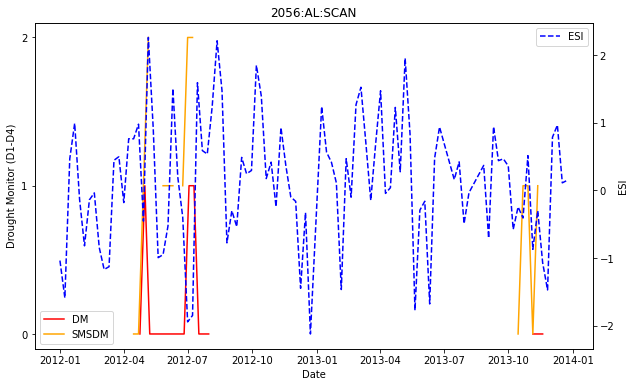

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(DM_test['Category'], label='DM', color='red')
ax.plot()
ax2 = ax.twinx()
ax2.plot(ESI_test['ESI'], label='ESI', linestyle='dashed', color='blue')
ax2.legend()
ax.set_ylabel('Drought Monitor (D1-D4)')
ax2.set_ylabel('ESI')
ax.set_xlabel('Date')
ax.set_title(DM_test['station'].unique().item())
ax.plot(SMSDM_test['4inSMSDC'], label="SMSDM", color='orange')
ax.legend(loc='lower left')
ax.yaxis.set_ticks([0,1,2])

In [19]:
SMSDM_test

ESI       station  week_x  week_y   2inANOM   4inANOM   8inANOM  \
Date                                                                            
2012-01-01 -1.036  2056:AL:SCAN      52      52  0.530074  0.773755  0.901517   
2012-01-08 -1.587  2056:AL:SCAN       1       1 -1.129205 -0.240322  0.653609   
2012-01-15  0.468  2056:AL:SCAN       2       2  0.607961  0.629268  1.104360   
2012-01-22  0.993  2056:AL:SCAN       3       3  0.137346  0.442041  1.572774   
2012-01-29 -0.133  2056:AL:SCAN       4       4  0.576963  0.714880  1.379145   
...           ...           ...     ...     ...       ...       ...       ...   
2013-11-26 -1.470  2056:AL:SCAN      48      48 -1.189684 -0.243622 -2.253057   
2013-12-03  0.788  2056:AL:SCAN      49      49 -1.167394 -0.160547 -1.002094   
2013-12-10  0.966  2056:AL:SCAN      50      50  0.123019  0.591791 -0.861794   
2013-12-17  0.113  2056:AL:SCAN      51      51  0.256049  0.540199 -0.427590   
2013-12-24  0.150  2056:AL:SCAN      52      52 -0.384387  0.439368 -0.120292   

            20inANOM  40inANOM     2in_pr     4in_pr     8in_pr    20in_pr  \
Date                                                                         
2012-01-01  0.398306  1.263294  66.677599  77.002967  82.548998  62.741899   
2012-01-08  0.331736  1.538225  13.392369  39.659895  73.469162  59.484698   
2012-01-15  0.340749  1.342732  69.935498  70.623145  88.506256  59.957246   
2012-01-22  0.285516  1.345538  52.629277  63.558548  96.966006  57.493249   
2012-01-29  0.468891  1.394955  68.743850  74.503538  94.474588  65.948470   
...              ...       ...        ...        ...        ...        ...   
2013-11-26 -0.765908       NaN  11.916475  39.557179   0.996567  21.703420   
2013-12-03  0.101743       NaN  12.419372  42.353344  15.867567  49.662466   
2013-12-10  0.564228       NaN  52.038920  69.322073  19.577013  69.846985   
2013-12-17  0.392162       NaN  56.761780  67.381876  32.211272  62.274977   
2013-12-24  0.362260       NaN  35.148136  63.455832  42.719522  60.924842   

              40in_pr  2inSMSDC  4inSMSDC  8inSMSDC  20inSMSDC  40inSMSDC  
Date                                                                       
2012-01-01  92.298303       NaN       NaN       NaN        NaN        NaN  
2012-01-08  96.753326       1.0       NaN       NaN        NaN        NaN  
2012-01-15  93.848407       NaN       NaN       NaN        NaN        NaN  
2012-01-22  93.897229       NaN       NaN       NaN        NaN        NaN  
2012-01-29  94.751617       NaN       NaN       NaN        NaN        NaN  
...               ...       ...       ...       ...        ...        ...  
2013-11-26        NaN       1.0       NaN       4.0        0.0        NaN  
2013-12-03        NaN       1.0       NaN       1.0        NaN        NaN  
2013-12-10        NaN       NaN       NaN       1.0        NaN        NaN  
2013-12-17        NaN       NaN       NaN       NaN        NaN        NaN  
2013-12-24        NaN       NaN       NaN       NaN        NaN        NaN  

[99 rows x 19 columns]

In [20]:
#now we are goin to test cumulative fall for drought 2007
DM_test = drought_data[drought_data['station']=='2078:AL:SCAN']
ESI_test = SM_VS_ESI_ANOM_READ[SM_VS_ESI_ANOM_READ['station']=='2078:AL:SCAN']
SMSDM_test = SM_VS_ESI_ANOM_READ[SM_VS_ESI_ANOM_READ['station']=='2078:AL:SCAN']

In [21]:
DM_test.set_index('Date', inplace=True)
ESI_test.set_index('Date', inplace=True)
SMSDM_test.set_index('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

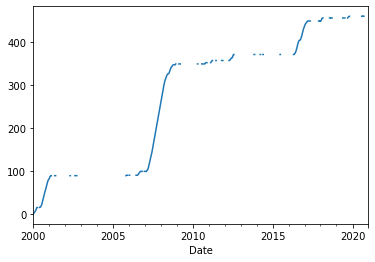

In [22]:
DM_test['Category'].cumsum().plot()

In [23]:
#fixing datetime
ESI_test.index = pd.to_datetime(ESI_test.index)

<AxesSubplot:xlabel='Date'>

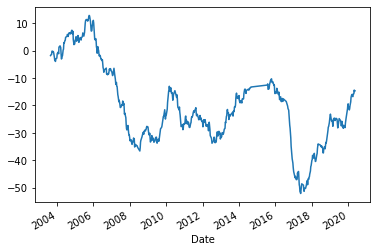

In [24]:
ESI_test['ESI'].cumsum().plot()

In [25]:
#fixing datetime
SMSDM_test.index = pd.to_datetime(SMSDM_test.index)

Text(0.5, 0, 'Date')

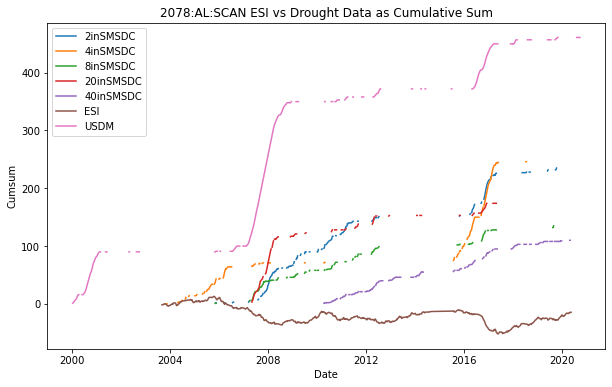

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(SMSDM_test['2inSMSDC'].cumsum(), label='2inSMSDC')
ax.plot(SMSDM_test['4inSMSDC'].cumsum(), label='4inSMSDC')
ax.plot(SMSDM_test['8inSMSDC'].cumsum(), label='8inSMSDC')
ax.plot(SMSDM_test['20inSMSDC'].cumsum(), label='20inSMSDC')
ax.plot(SMSDM_test['40inSMSDC'].cumsum(), label='40inSMSDC')
ax.plot(ESI_test['ESI'].cumsum(), label='ESI')
ax.plot(DM_test['Category'].cumsum(), label='USDM')
ax.legend()
ax.set_title('2078:AL:SCAN ESI vs Drought Data as Cumulative Sum')
ax.set_ylabel('Cumsum')
ax.set_xlabel('Date')

Text(0.5, 1.0, '2078:AL:SCAN Drought Categroy vs ESI Raw Data')

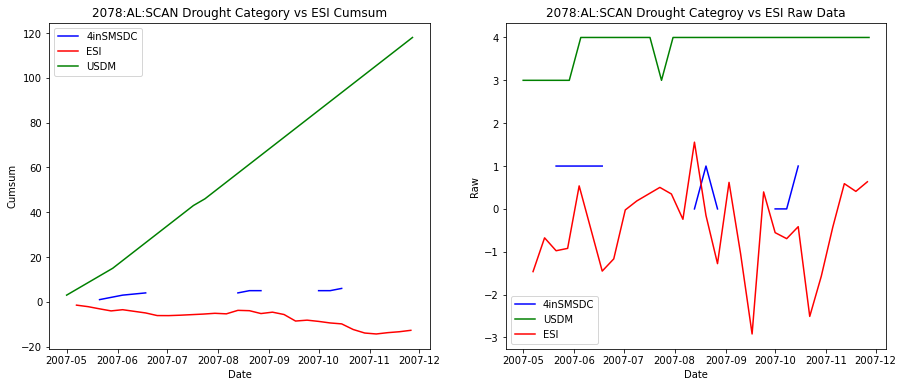

In [27]:
fig, ax = plt.subplots(figsize=(15, 6), nrows=1, ncols=2)
ax[0].plot(SMSDM_test[(SMSDM_test.index.month>=5) & (SMSDM_test.index.month<=11) & (SMSDM_test.index.year==2007)]['4inSMSDC'].cumsum(), label='4inSMSDC', color='blue')
ax[0].plot(ESI_test[(ESI_test.index.month>=5) & (ESI_test.index.month<=11) & (ESI_test.index.year==2007)]['ESI'].cumsum(), label='ESI', color='red')
ax[0].plot(DM_test[(DM_test.index.month>=5) & (DM_test.index.month<=11) & (DM_test.index.year==2007)]['Category'].cumsum(), label='USDM', color='green')
ax[0].legend()
ax[1].plot(SMSDM_test[(SMSDM_test.index.month>=5) & (SMSDM_test.index.month<=11) & (SMSDM_test.index.year==2007)]['4inSMSDC'], label='4inSMSDC', color='blue')
ax[1].plot(DM_test[(DM_test.index.month>=5) & (DM_test.index.month<=11) & (DM_test.index.year==2007)]['Category'], label='USDM', color='green')
ax[1].plot(ESI_test[(ESI_test.index.month>=5) & (ESI_test.index.month<=11) & (ESI_test.index.year==2007)]['ESI'], label='ESI', color='red')
ax[1].legend()
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Cumsum')
ax[0].set_title('2078:AL:SCAN Drought Category vs ESI Cumsum')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Raw')
ax[1].set_title('2078:AL:SCAN Drought Categroy vs ESI Raw Data')

In [28]:
DM_test[(DM_test.index.month>=5) & (DM_test.index.month<=11) & (DM_test.index.year==2007)]

point  Category Station Name       station
Date                                                                       
2007-05-01  POINT (-86.60236 34.89375)       3.0   Bragg Farm  2078:AL:SCAN
2007-05-08  POINT (-86.60236 34.89375)       3.0   Bragg Farm  2078:AL:SCAN
2007-05-15  POINT (-86.60236 34.89375)       3.0   Bragg Farm  2078:AL:SCAN
2007-05-22  POINT (-86.60236 34.89375)       3.0   Bragg Farm  2078:AL:SCAN
2007-05-29  POINT (-86.60236 34.89375)       3.0   Bragg Farm  2078:AL:SCAN
2007-06-05  POINT (-86.60236 34.89375)       4.0   Bragg Farm  2078:AL:SCAN
2007-06-12  POINT (-86.60236 34.89375)       4.0   Bragg Farm  2078:AL:SCAN
2007-06-19  POINT (-86.60236 34.89375)       4.0   Bragg Farm  2078:AL:SCAN
2007-06-26  POINT (-86.60236 34.89375)       4.0   Bragg Farm  2078:AL:SCAN
2007-07-03  POINT (-86.60236 34.89375)       4.0   Bragg Farm  2078:AL:SCAN
2007-07-10  POINT (-86.60236 34.89375)       4.0   Bragg Farm  2078:AL:SCAN
2007-07-17  POINT (-86.60236 34.89375)       4.0   Bragg Farm  2078:AL:SCAN
2007-07-24  POINT (-86.60236 34.89375)       3.0   Bragg Farm  2078:AL:SCAN
2007-07-31  POINT (-86.60236 34.89375)       4.0   Bragg Farm  2078:AL:SCAN
2007-08-07  POINT (-86.60236 34.89375)       4.0   Bragg Farm  2078:AL:SCAN
2007-08-14  POINT (-86.60236 34.89375)       4.0   Bragg Farm  2078:AL:SCAN
2007-08-21  POINT (-86.60236 34.89375)       4.0   Bragg Farm  2078:AL:SCAN
2007-08-28  POINT (-86.60236 34.89375)       4.0   Bragg Farm  2078:AL:SCAN
2007-09-04  POINT (-86.60236 34.89375)       4.0   Bragg Farm  2078:AL:SCAN
2007-09-11  POINT (-86.60236 34.89375)       4.0   Bragg Farm  2078:AL:SCAN
2007-09-18  POINT (-86.60236 34.89375)       4.0   Bragg Farm  2078:AL:SCAN
2007-09-25  POINT (-86.60236 34.89375)       4.0   Bragg Farm  2078:AL:SCAN
2007-10-02  POINT (-86.60236 34.89375)       4.0   Bragg Farm  2078:AL:SCAN
2007-10-09  POINT (-86.60236 34.89375)       4.0   Bragg Farm  2078:AL:SCAN
2007-10-16  POINT (-86.60236 34.89375)       4.0   Bragg Farm  2078:AL:SCAN
2007-10-23  POINT (-86.60236 34.89375)       4.0   Bragg Farm  2078:AL:SCAN
2007-10-30  POINT (-86.60236 34.89375)       4.0   Bragg Farm  2078:AL:SCAN
2007-11-06  POINT (-86.60236 34.89375)       4.0   Bragg Farm  2078:AL:SCAN
2007-11-13  POINT (-86.60236 34.89375)       4.0   Bragg Farm  2078:AL:SCAN
2007-11-20  POINT (-86.60236 34.89375)       4.0   Bragg Farm  2078:AL:SCAN
2007-11-27  POINT (-86.60236 34.89375)       4.0   Bragg Farm  2078:AL:SCAN

Text(0, 0.5, 'Drought Category')

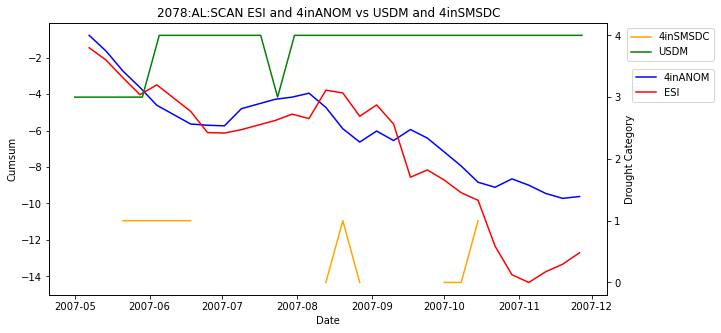

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(SMSDM_test[(SMSDM_test.index.month>=5) & (SMSDM_test.index.month<=11) & (SMSDM_test.index.year==2007)]['4inANOM'].cumsum(), label='4inANOM', color='blue')
ax.plot(ESI_test[(ESI_test.index.month>=5) & (ESI_test.index.month<=11) & (ESI_test.index.year==2007)]['ESI'].cumsum(), label='ESI', color='red')
ax2=ax.twinx()
ax2.plot(SMSDM_test[(SMSDM_test.index.month>=5) & (SMSDM_test.index.month<=11) & (SMSDM_test.index.year==2007)]['4inSMSDC'], label='4inSMSDC', color='orange')
ax2.plot(DM_test[(DM_test.index.month>=5) & (DM_test.index.month<=11) & (DM_test.index.year==2007)]['Category'], label='USDM', color='green')
ax.set_xlabel('Date')
ax.set_ylabel('Cumsum')
ax.set_title('2078:AL:SCAN ESI and 4inANOM vs USDM and 4inSMSDC')
ax2.legend(bbox_to_anchor=(1.20, 1.0), loc='upper right')
ax.legend(bbox_to_anchor=(1.20, 0.85), loc='upper right')
ax2.yaxis.set_ticks([0, 1, 2, 3, 4])
ax2.set_ylabel('Drought Category')

<AxesSubplot:xlabel='Date'>

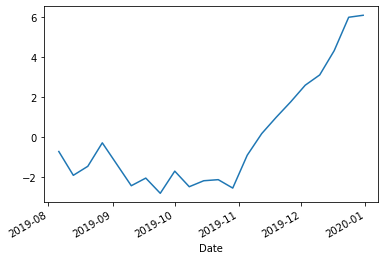

In [30]:
ESI_test[(ESI_test.index.month >= 8) & (ESI_test.index.year==2019)]['ESI'].cumsum().plot()

<AxesSubplot:xlabel='Date'>

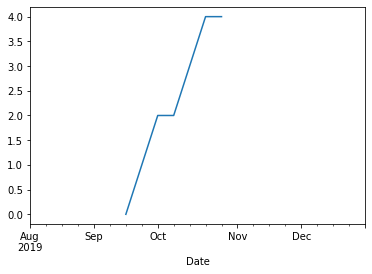

In [31]:
DM_test[(DM_test.index.month >= 8) & (DM_test.index.year==2019)]['Category'].cumsum().plot() 

In [32]:
DM_test[(DM_test.index.month >= 8) & (DM_test.index.year==2019)]['Category'].cumsum()

Date
2019-08-06    NaN
2019-08-13    NaN
2019-08-20    NaN
2019-08-27    NaN
2019-09-03    NaN
2019-09-10    NaN
2019-09-17    0.0
2019-09-24    1.0
2019-10-01    2.0
2019-10-08    2.0
2019-10-15    3.0
2019-10-22    4.0
2019-10-29    4.0
2019-11-05    NaN
2019-11-12    NaN
2019-11-19    4.0
2019-11-26    NaN
2019-12-03    NaN
2019-12-10    NaN
2019-12-17    NaN
2019-12-24    NaN
2019-12-31    NaN
Name: Category, dtype: float64

<AxesSubplot:xlabel='Date'>

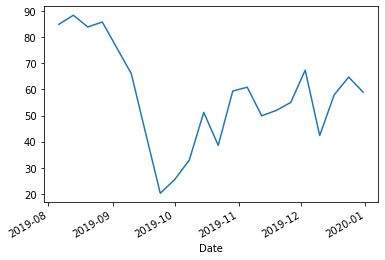

In [33]:
SMSDM_test[(SMSDM_test.index.month >= 8) & (SMSDM_test.index.year==2019)]['4in_pr'].plot()

<AxesSubplot:xlabel='Date'>

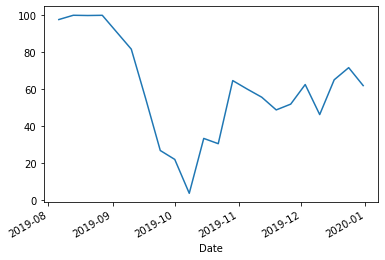

In [34]:
SMSDM_test[(SMSDM_test.index.month >= 8) & (SMSDM_test.index.year==2019)]['2in_pr'].plot()

In [35]:
SMSDM_test[(SMSDM_test.index.month >= 8) & (SMSDM_test.index.year==2019)]

ESI       station  week_x  week_y   2inANOM   4inANOM   8inANOM  \
Date                                                                            
2019-08-06 -0.731  2078:AL:SCAN      32      32  1.638670  0.991352 -0.100813   
2019-08-13 -1.194  2078:AL:SCAN      33      33  2.173916  1.104749 -2.118304   
2019-08-20  0.452  2078:AL:SCAN      34      34  2.108838  0.962681 -0.703471   
2019-08-27  1.177  2078:AL:SCAN      35      35  2.167247  1.012472 -1.753205   
2019-09-10 -2.151  2078:AL:SCAN      37      37  0.897431  0.506653  1.942781   
2019-09-17  0.383  2078:AL:SCAN      38      38  0.194134 -0.140454  2.001121   
2019-09-24 -0.763  2078:AL:SCAN      39      39 -0.651359 -0.855910  1.437879   
2019-10-01  1.111  2078:AL:SCAN      40      40 -0.808681 -0.684659  1.663948   
2019-10-08 -0.781  2078:AL:SCAN      41      41 -1.686217 -0.455703  1.833979   
2019-10-15  0.300  2078:AL:SCAN      42      42 -0.441484  0.091895  2.687446   
2019-10-22  0.054  2078:AL:SCAN      43      43 -0.532558 -0.270118  2.638313   
2019-10-29 -0.422  2078:AL:SCAN      44      44  0.473818  0.331959  3.128107   
2019-11-05  1.648  2078:AL:SCAN      45      45  0.346782  0.373267  3.217924   
2019-11-12  1.085  2078:AL:SCAN      46      46  0.218887  0.055735  3.132563   
2019-11-19  0.818  2078:AL:SCAN      47      47  0.029107  0.115012  3.174321   
2019-11-26  0.774  2078:AL:SCAN      48      48  0.116703  0.201244  3.334867   
2019-12-03  0.834  2078:AL:SCAN      49      49  0.417570  0.539178  3.397499   
2019-12-10  0.516  2078:AL:SCAN      50      50 -0.049747 -0.160756  3.207148   
2019-12-17  1.217  2078:AL:SCAN      51      51  0.482187  0.290726  3.119388   
2019-12-24  1.676  2078:AL:SCAN      52      52  0.646147  0.475630  2.733857   
2019-12-31  0.100  2078:AL:SCAN       1       1  0.401044  0.319532  2.393086   

            20inANOM  40inANOM     2in_pr     4in_pr     8in_pr    20in_pr  \
Date                                                                         
2019-08-06  0.823698 -0.569001  97.398054  84.866469  43.450338  80.186769   
2019-08-13       NaN -0.485669  99.704821  88.335996   1.428413        NaN   
2019-08-20  0.686324 -0.547122  99.573631  83.862132  24.128004  74.392439   
2019-08-27  0.750613 -0.322283  99.682956  85.745264   3.454767  77.160216   
2019-09-10  0.243146 -0.663474  81.447469  66.000913  99.069870  55.591809   
2019-09-17  0.007580 -0.749250  54.597136  43.038119  99.169527  46.253375   
2019-09-24 -0.099714 -0.680483  26.833935  20.246519  95.371498  42.664266   
2019-10-01 -0.286388 -0.766384  22.029081  25.542114  97.730041  36.318632   
2019-10-08 -0.402388 -0.742904   3.771728  32.926273  98.638025  32.673267   
2019-10-15 -0.371822 -0.694718  33.344266  51.175531  99.723176  33.629613   
2019-10-22 -0.550864 -0.832584  30.501804  38.575668  99.712103  28.015302   
2019-10-29 -0.024252 -0.847313  64.502023  59.335768  99.800687  45.173267   
2019-11-05  0.418401 -0.763529  59.921286  60.819448  99.878197  63.568857   
2019-11-12  0.230141 -0.755399  55.559200  49.885871  99.811759  55.130513   
2019-11-19  0.263402 -0.754537  48.704493  51.928783  99.833905  56.615662   
2019-11-26  0.351520 -0.625090  51.820269  54.987446  99.966781  60.452295   
2019-12-03  1.286121 -0.285215  62.381109  67.336225  99.988927  93.260576   
2019-12-10  0.753359 -0.876095  46.190008  42.341931  99.867124  77.272727   
2019-12-17  1.063235 -0.679014  64.928392  57.897740  99.789614  88.006301   
2019-12-24  0.912708 -0.756922  71.476987  64.688427  99.734249  83.010801   
2019-12-31  0.918163 -0.852820  61.801684  58.902077  99.623519  83.202070   

              40in_pr  2inSMSDC  4inSMSDC  8inSMSDC  20inSMSDC  40inSMSDC  
Date                                                                       
2019-08-06  29.842549       NaN       NaN       NaN        NaN        0.0  
2019-08-13  32.478945       NaN       NaN       4.0        NaN        NaN  
2019-08-20  30.562675       NaN       NaN       0.0

Text(0.5, 1.0, '2078:AL:SCAN Flash Drought Event')

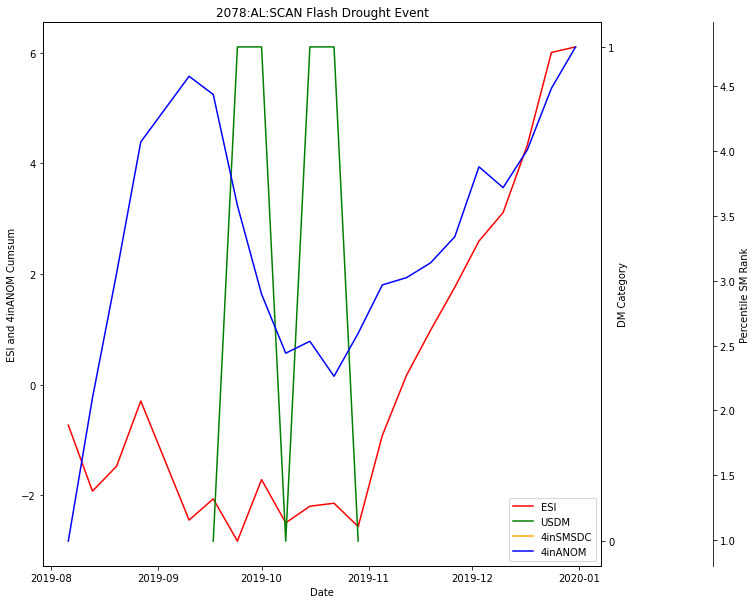

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
esi, = ax.plot(ESI_test[(ESI_test.index.month >= 8) & (ESI_test.index.year==2019)]['ESI'].cumsum(), label="ESI", color='red')
ax2 = ax.twinx()
ax2.yaxis.set_ticks([0, 1, 2, 3, 4])
ax3 = ax.twinx()
ax3.spines.right.set_position(("axes", 1.2))
dm, = ax2.plot(DM_test[(DM_test.index.month >= 8) & (DM_test.index.year==2019)]['Category'], label="USDM", color='green')
smdm, = ax2.plot(SMSDM_test[(SMSDM_test.index.month >= 8) & (SMSDM_test.index.year==2019)]['4inSMSDC'], label="4inSMSDC", color='orange')
sm4, = ax3.plot(SMSDM_test[(SMSDM_test.index.month >= 8) & (SMSDM_test.index.year==2019)]['4inANOM'].cumsum(), label="4inANOM", color='blue')

#smdm2, = ax2.plot(SMSDM_test[(SMSDM_test.index.month >= 8) & (SMSDM_test.index.year==2019)]['2inSMSDC'], label="2inSMDC", color='yellow')
ax.legend(handles=[esi, dm, smdm, sm4], loc='lower right')
ax.set_xlabel('Date')
ax2.set_ylabel('DM Category')
ax3.set_ylabel('Percentile SM Rank')
ax.set_ylabel('ESI and 4inANOM Cumsum')
ax.set_title('2078:AL:SCAN Flash Drought Event')

In [37]:
SMSDM_test[(SMSDM_test.index.month >= 8) & (SMSDM_test.index.year==2019)]['4inSMSDC']

Date
2019-08-06    NaN
2019-08-13    NaN
2019-08-20    NaN
2019-08-27    NaN
2019-09-10    NaN
2019-09-17    NaN
2019-09-24    NaN
2019-10-01    0.0
2019-10-08    NaN
2019-10-15    NaN
2019-10-22    NaN
2019-10-29    NaN
2019-11-05    NaN
2019-11-12    NaN
2019-11-19    NaN
2019-11-26    NaN
2019-12-03    NaN
2019-12-10    NaN
2019-12-17    NaN
2019-12-24    NaN
2019-12-31    NaN
Name: 4inSMSDC, dtype: float64

Text(0.5, 1.0, '2078:AL:SCAN Flash Drought Event')

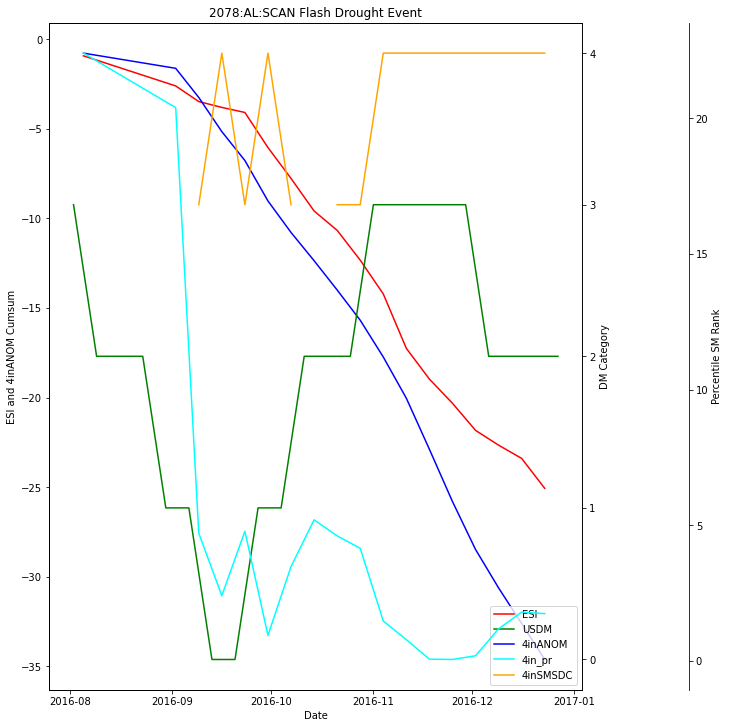

In [38]:
fig, ax = plt.subplots(figsize=(10,10), constrained_layout=True)
esi, = ax.plot(ESI_test[(ESI_test.index.month >= 8) & (ESI_test.index.year==2016)]['ESI'].cumsum(), label="ESI", color='red')
ax2 = ax.twinx()
ax2.set_yticks([0, 1, 2, 3, 4]) 
ax3 = ax.twinx()
ax3.spines.right.set_position(("axes", 1.2))
dm, = ax2.plot(DM_test[(DM_test.index.month >= 8) & (DM_test.index.year==2016)]['Category'], label="USDM", color='green')
smdm, = ax2.plot(SMSDM_test[(SMSDM_test.index.month >= 8) & (SMSDM_test.index.year==2016)]['4inSMSDC'], label="4inSMSDC", color='orange')
sm4, = ax.plot(SMSDM_test[(SMSDM_test.index.month >= 8) & (SMSDM_test.index.year==2016)]['4inANOM'].cumsum(), label="4inANOM", color='blue')
smpr4, = ax3.plot(SMSDM_test[(SMSDM_test.index.month >= 8) & (SMSDM_test.index.year==2016)]['4in_pr'], label="4in_pr", color='cyan')
ax.legend(handles=[esi, dm, sm4, smpr4, smdm], loc='lower right')
ax.set_xlabel('Date')
ax2.set_ylabel('DM Category')
ax3.set_ylabel('Percentile SM Rank')
ax.set_ylabel('ESI and 4inANOM Cumsum')
ax.set_title('2078:AL:SCAN Flash Drought Event')

In [39]:
ESI_test

ESI       station  week_x  week_y   2inANOM   4inANOM   8inANOM  \
Date                                                                            
2003-08-27 -1.783  2078:AL:SCAN      35      35       NaN       NaN       NaN   
2003-09-10  0.396  2078:AL:SCAN      37      37  2.164270  0.998736  1.390679   
2003-09-17  0.035  2078:AL:SCAN      38      38  1.314586  0.670494  0.635382   
2003-09-24  1.165  2078:AL:SCAN      39      39  1.862839  0.846438  1.246991   
2003-10-01  0.046  2078:AL:SCAN      40      40  1.779189  0.627369  1.333774   
...           ...           ...     ...     ...       ...       ...       ...   
2020-04-15 -0.105  2078:AL:SCAN      16      16  1.448394  0.598713  3.116271   
2020-04-22  0.244  2078:AL:SCAN      17      17  1.529283  0.737754  3.218922   
2020-04-29  1.244  2078:AL:SCAN      18      18  1.442555  0.962767  3.190488   
2020-05-06 -0.487  2078:AL:SCAN      19      19  0.851080  0.384983  2.874805   
2020-05-13  0.253  2078:AL:SCAN      20      20  1.735319  0.712805       NaN   

            20inANOM  40inANOM     2in_pr     4in_pr     8in_pr    20in_pr  \
Date                                                                         
2003-08-27       NaN       NaN        NaN        NaN        NaN        NaN   
2003-09-10  2.639969  1.948964  99.661091  85.140379  94.662828  99.966247   
2003-09-17  2.320282  1.586560  93.254619  72.380735  72.727273  99.842484   
2003-09-24  2.889176  1.446026  98.720892  79.833371  91.828147  99.988749   
2003-10-01  2.580136  1.672270  98.283590  70.554668  93.422655  99.954995   
...              ...       ...        ...        ...        ...        ...   
2020-04-15  1.197821 -0.174465  95.331803  69.550331  99.778541  91.415392   
2020-04-22  1.277831 -0.579650  96.239204  75.450810  99.889270  93.103060   
2020-04-29  1.020041 -0.582725  95.244342  83.884958  99.844978  86.701170   
2020-05-06  0.996195 -0.444693  79.731059  61.321616  99.756395  85.924842   
2020-05-13  1.206543 -0.558616  98.108670  74.355170        NaN  91.629163   

              40in_pr  2inSMSDC  4inSMSDC  8inSMSDC  20inSMSDC  40inSMSDC  
Date                                                                       
2003-08-27        NaN       NaN       NaN       NaN        NaN        NaN  
2003-09-10  99.279873       NaN       NaN       NaN        NaN        NaN  
2003-09-17  97.253753       NaN       NaN       NaN        NaN        NaN  
2003-09-24  95.483950       NaN       NaN       NaN        NaN        NaN  
2003-10-01  98.047113       NaN       NaN       NaN        NaN        NaN  
...               ...       ...       ...       ...        ...        ...  
2020-04-15  42.646161       NaN       NaN       NaN        NaN        NaN  
2020-04-22  29.537410       NaN       NaN       NaN        NaN        0.0  
2020-04-29  29.464177       NaN       NaN       NaN        NaN        0.0  
2020-05-06  33.894788       NaN       NaN       NaN        NaN        NaN  
2020-05-13  30.117173       NaN       NaN       NaN        NaN        NaN  

[706 rows x 19 columns]

In [40]:
drought_data['Date']=pd.to_datetime(drought_data['Date'])

In [41]:
drought_data.set_index('Date', inplace=True)

In [42]:
flash_2019 = drought_data[(drought_data.index.year==2019)&(drought_data.index.month>=8)]

In [43]:
SM_VS_ESI_ANOM_READ['Date']=pd.to_datetime(SM_VS_ESI_ANOM_READ['Date'])

In [44]:
SM_VS_ESI_ANOM_READ.set_index('Date', inplace=True)

In [45]:
SM_ESI_flash_2019 = SM_VS_ESI_ANOM_READ[(SM_VS_ESI_ANOM_READ.index.year==2019)&(SM_VS_ESI_ANOM_READ.index.month>=8)]

In [46]:
SM_ESI_flash_2019

ESI       station  week_x  week_y   2inANOM   4inANOM   8inANOM  \
Date                                                                            
2019-08-06  0.581  2057:AL:SCAN      32      32 -0.320020  0.553622  0.785686   
2019-08-13  0.210  2057:AL:SCAN      33      33 -0.262023  0.853190  0.985721   
2019-08-20 -0.333  2057:AL:SCAN      34      34 -1.076246  0.525206  0.761227   
2019-08-27 -0.945  2057:AL:SCAN      35      35 -0.780767  0.251437  0.542510   
2019-09-03 -1.315  2057:AL:SCAN      36      36 -0.866953  0.155705  0.471759   
...           ...           ...     ...     ...       ...       ...       ...   
2019-12-03 -0.640  2053:AL:SCAN      49      49  1.150144  1.130342  1.101391   
2019-12-10  0.140  2053:AL:SCAN      50      50  1.031959  0.992935  1.385743   
2019-12-17  0.213  2053:AL:SCAN      51      51  0.535768  0.429769  0.578262   
2019-12-24  1.394  2053:AL:SCAN      52      52  0.778315  0.916498  1.048247   
2019-12-31 -0.644  2053:AL:SCAN       1       1  1.073521  1.284879  1.138990   

            20inANOM  40inANOM     2in_pr     4in_pr     8in_pr    20in_pr  \
Date                                                                         
2019-08-06  0.961752  1.143419  37.279983  67.792741  78.651312  84.777228   
2019-08-13  0.998732  1.210929  39.198644  80.015978  84.962906  85.969847   
2019-08-20  1.012649  1.018275  14.649612  66.697101  77.854058  86.374887   
2019-08-27  0.906686  0.841734  22.750629  56.493951  69.084265  82.740774   
2019-09-03  0.566161  0.510153  20.454794  53.332572  66.050271  69.903240   
...              ...       ...        ...        ...        ...        ...   
2019-12-03  0.734631  1.250638  89.625014  89.226204  88.461964  76.462646   
2019-12-10  0.975073  1.056672  85.995408  84.923533  94.607463  85.182268   
2019-12-17  0.550751  0.735964  66.950913  63.102031  70.479460  69.273177   
2019-12-24  0.353277  0.566720  76.801137  82.321388  87.000332  60.587309   
2019-12-31  0.789787  0.596466  87.460370  92.581602  89.458532  78.921017   

              40in_pr  2inSMSDC  4inSMSDC  8inSMSDC  20inSMSDC  40inSMSDC  
Date                                                                       
2019-08-06  89.271329       NaN       NaN       NaN        NaN        NaN  
2019-08-13  91.212010       NaN       NaN       NaN        NaN        NaN  
2019-08-20  85.316734       1.0       NaN       NaN        NaN        NaN  
2019-08-27  78.908825       0.0       NaN       NaN        NaN        NaN  
2019-09-03  65.897718       NaN       NaN       NaN        NaN        NaN  
...               ...       ...       ...       ...        ...        ...  
2019-12-03  92.029782       NaN       NaN       NaN        NaN        NaN  
2019-12-10  86.451849       NaN       NaN       NaN        NaN        NaN  
2019-12-17  74.551446       NaN       NaN       NaN        NaN        NaN  
2019-12-24  67.838399       NaN       NaN       NaN        NaN        NaN  
2019-12-31  69.126083       NaN       NaN       NaN        NaN        NaN  

[343 rows x 19 columns]

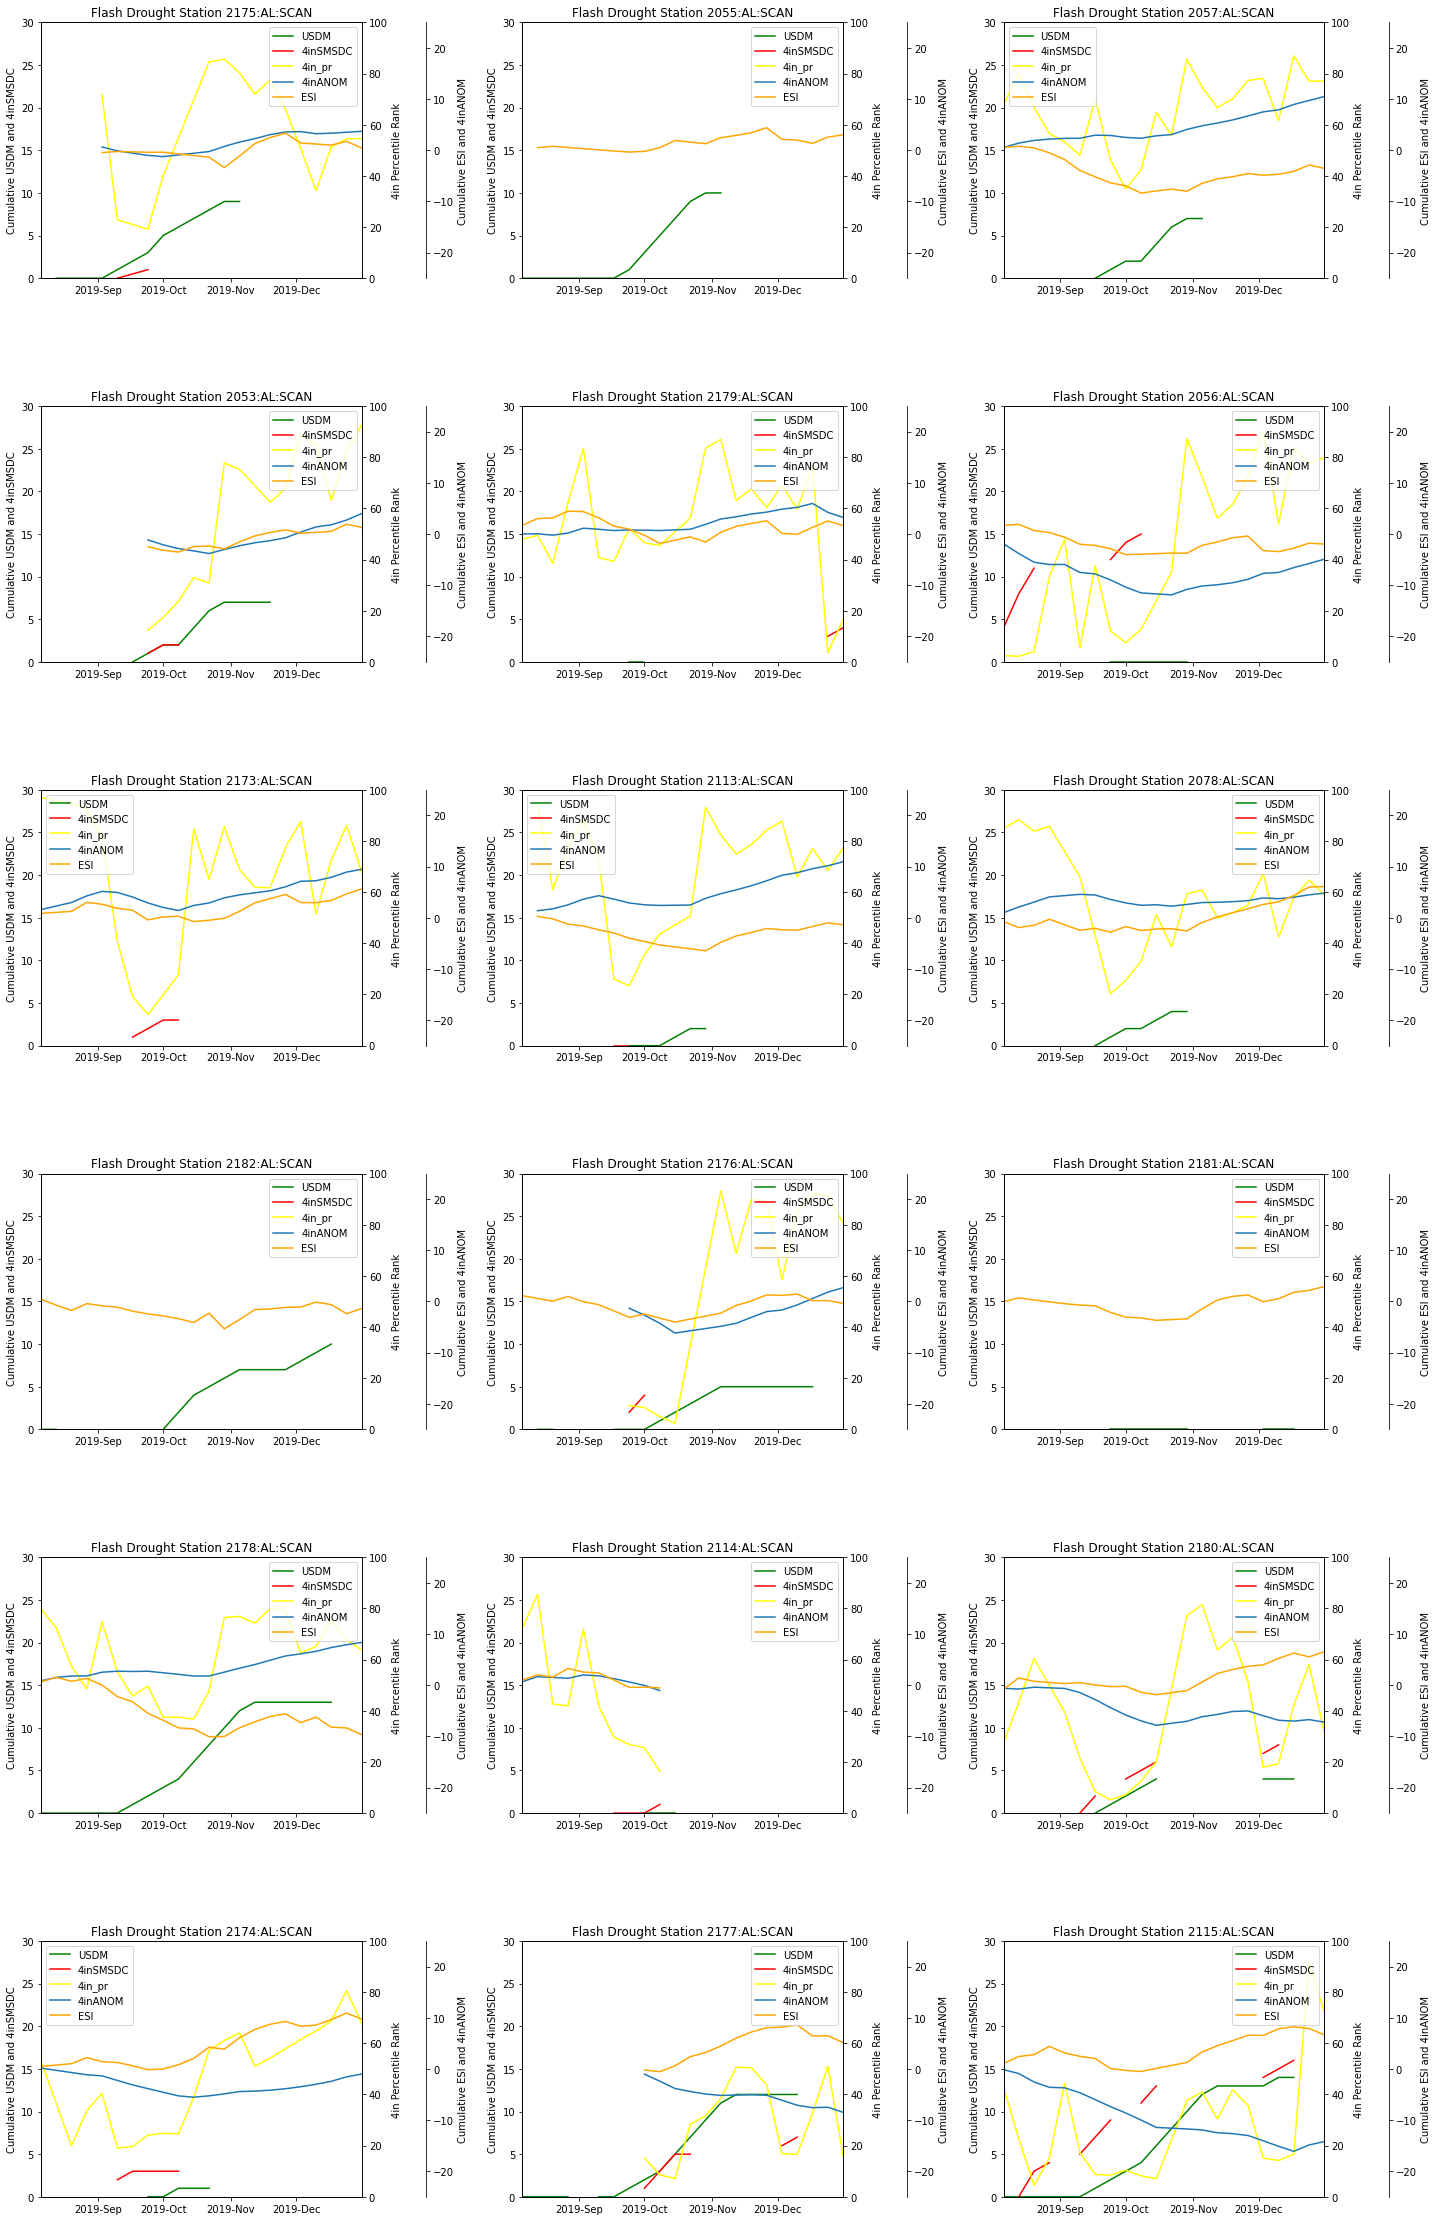

In [47]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(23,40), nrows=6, ncols=3)
axes = ax.flatten()
count = 0
for s in flash_2019['station'].unique():
    USDM = flash_2019[flash_2019['station']==s]['Category']
    xticks = [month for month in USDM.index.month]
    USDM_h, = axes[count].plot(USDM.cumsum(), label='USDM', color='green')
    axes[count].set_xlim(USDM.index[0], USDM.index[-1])
    axes[count].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    axes[count].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
    axes[count].set_title('Flash Drought Station '+ s)
    axes[count].set_ylabel('Cumulative USDM and 4inSMSDC')
    
    #plot the actual sm drought category
    sm4inDC = SM_ESI_flash_2019[SM_ESI_flash_2019['station']==s]['4inSMSDC']
    smdc, = axes[count].plot(sm4inDC.cumsum(), label='4inSMSDC', color='red')
    axes[count].set_ylim(0, 30)
    
    #now lets plot pr for sm
    axes2 = axes[count].twinx()
    smpr, = axes2.plot(SM_ESI_flash_2019[SM_ESI_flash_2019['station']==s]['4in_pr'], label='4in_pr', color='yellow')
    axes2.set_ylim(0,100)
    axes2.set_ylabel('4in Percentile Rank')
    
    #now lets plot SM cumsum
    axes3 = axes[count].twinx()
    axes3.spines.right.set_position(("axes", 1.2))
    sms4ANOM, = axes3.plot(SM_ESI_flash_2019[SM_ESI_flash_2019['station']==s]['4inANOM'].cumsum(), label='4inANOM')
    axes3.set_ylim(-25,25)
    
    #now lets plot ESI cumsum
    ESI, = axes3.plot(SM_ESI_flash_2019[SM_ESI_flash_2019['station']==s]['ESI'].cumsum(), label='ESI', color='orange')
    axes3.legend(handles=[USDM_h, smdc, smpr, sms4ANOM, ESI])
    axes3.set_ylabel('Cumulative ESI and 4inANOM')
    count+=1
plt.subplots_adjust(hspace=0.5, wspace=0.5)

In [48]:
SM_ESI_flash_2019.reset_index(inplace=True)

In [49]:
flash_2019.reset_index(inplace=True)

In [50]:
combined = SM_ESI_flash_2019.merge(flash_2019, on=['station', 'Date'])

In [51]:
combined.set_index('Date', inplace=True)

In [52]:
df = combined[(combined.index.month>=8)&(combined.index.month<=12)]
df.columns

Index(['ESI', 'station', 'week_x', 'week_y', '2inANOM', '4inANOM', '8inANOM',
       '20inANOM', '40inANOM', '2in_pr', '4in_pr', '8in_pr', '20in_pr',
       '40in_pr', '2inSMSDC', '4inSMSDC', '8inSMSDC', '20inSMSDC', '40inSMSDC',
       'point', 'Category', 'Station Name'],
      dtype='object')

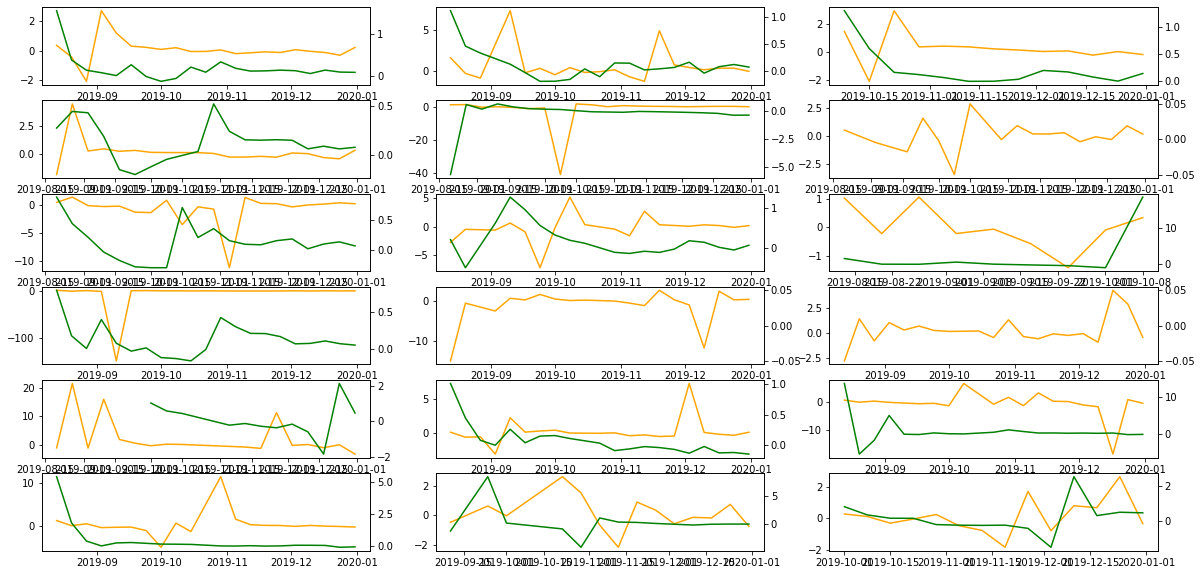

In [53]:
fig, ax = plt.subplots(figsize=(20,10), nrows=6, ncols=3)
axes=ax.flatten()
count=0
for s in df['station'].unique():
    station = df[df['station']==s]
    station = station[['ESI', '2inANOM', '4inANOM', '8inANOM',
       '20inANOM', '40inANOM', '2in_pr', '4in_pr', '8in_pr', '20in_pr',
       '40in_pr', '2inSMSDC', '4inSMSDC', '8inSMSDC', '20inSMSDC', '40inSMSDC', 'Category',]]
    station['ESI']=station['ESI'].cumsum().pct_change()
    axes[count].plot(station['ESI'], label='ESI pct change', color='orange')
    axes2 = axes[count].twinx()
    axes2.plot(station['4inANOM'].cumsum().pct_change(), label='4inANOM',color='green')
    count+=1

In [54]:
df['ESI']=df['ESI'].pct_change()

In [55]:
df

ESI       station  week_x  week_y   2inANOM   4inANOM  \
Date                                                                     
2019-08-06       NaN  2057:AL:SCAN      32      32 -0.320020  0.553622   
2019-08-13 -0.638554  2057:AL:SCAN      33      33 -0.262023  0.853190   
2019-08-20 -2.585714  2057:AL:SCAN      34      34 -1.076246  0.525206   
2019-08-27  1.837838  2057:AL:SCAN      35      35 -0.780767  0.251437   
2019-09-03  0.391534  2057:AL:SCAN      36      36 -0.866953  0.155705   
...              ...           ...     ...     ...       ...       ...   
2019-12-03 -2.245136  2053:AL:SCAN      49      49  1.150144  1.130342   
2019-12-10 -1.218750  2053:AL:SCAN      50      50  1.031959  0.992935   
2019-12-17  0.521429  2053:AL:SCAN      51      51  0.535768  0.429769   
2019-12-24  5.544601  2053:AL:SCAN      52      52  0.778315  0.916498   
2019-12-31 -1.461980  2053:AL:SCAN       1       1  1.073521  1.284879   

             8inANOM  20inANOM  40inANOM     2in_pr  ...    20in_pr  \
Date                                                 ...              
2019-08-06  0.785686  0.961752  1.143419  37.279983  ...  84.777228   
2019-08-13  0.985721  0.998732  1.210929  39.198644  ...  85.969847   
2019-08-20  0.761227  1.012649  1.018275  14.649612  ...  86.374887   
2019-08-27  0.542510  0.906686  0.841734  22.750629  ...  82.740774   
2019-09-03  0.471759  0.566161  0.510153  20.454794  ...  69.903240   
...              ...       ...       ...        ...  ...        ...   
2019-12-03  1.101391  0.734631  1.250638  89.625014  ...  76.462646   
2019-12-10  1.385743  0.975073  1.056672  85.995408  ...  85.182268   
2019-12-17  0.578262  0.550751  0.735964  66.950913  ...  69.273177   
2019-12-24  1.048247  0.353277  0.566720  76.801137  ...  60.587309   
2019-12-31  1.138990  0.789787  0.596466  87.460370  ...  78.921017   

              40in_pr  2inSMSDC  4inSMSDC  8inSMSDC  20inSMSDC  40inSMSDC  \
Date                                                                        
2019-08-06  89.271329       NaN       NaN       NaN        NaN        NaN   
2019-08-13  91.212010       NaN       NaN       NaN        NaN        NaN   
2019-08-20  85.316734       1.0       NaN       NaN        NaN        NaN   
2019-08-27  78.908825       0.0       NaN       NaN        NaN        NaN   
2019-09-03  65.897718       NaN       NaN       NaN        NaN        NaN   
...               ...       ...       ...       ...        ...        ...   
2019-12-03  92.029782       NaN       NaN       NaN        NaN        NaN   
2019-12-10  86.451849       NaN       NaN       NaN        NaN        NaN   
2019-12-17  74.551446       NaN       NaN       NaN        NaN        NaN   
2019-12-24  67.838399       NaN       NaN       NaN        NaN        NaN   
2019-12-31  69.126083       NaN       NaN       NaN        NaN        NaN   

                              point  Category Station Name  
Date                                                        
2019-08-06  POINT (-86.55 34.78333)       NaN     AAMU-JTG  
2019-08-13  POINT (-86.55 34.78333)       NaN     AAMU-JTG  
2019-08-20  POINT (-86.55 34.78333)       NaN     AAMU-JTG  
2019-08-27  POINT (-86.55 34.78333)       NaN     AAMU-JTG  
2019-09-03  POINT (-86.55 34.78333)       NaN     AAMU-JTG  
...                             ...       ...          ...  
2019-12-03   POINT (-86.53333 34.9)       NaN        Wtars  
2019-12-10   POINT (-86.53333 34.9)       NaN        Wtars  
2019-12-17   POINT (-86.53333 34.9)       NaN        Wtars  
2019-12-24   POINT (-86.53333 34.9)       NaN        Wtars  
2019-12-31   POINT (-86.53333 34.9)       NaN        Wtars  

[343 rows x 22 columns]

In [56]:
drought_data

point  Category Station Name       station
Date                                                                       
2000-01-04  POINT (-85.51818 33.33168)       2.0      Wedowee  2175:AL:SCAN
2000-01-11  POINT (-85.51818 33.33168)       2.0      Wedowee  2175:AL:SCAN
2000-01-18  POINT (-85.51818 33.33168)       2.0      Wedowee  2175:AL:SCAN
2000-01-25  POINT (-85.51818 33.33168)       2.0      Wedowee  2175:AL:SCAN
2000-02-01  POINT (-85.51818 33.33168)       1.0      Wedowee  2175:AL:SCAN
...                                ...       ...          ...           ...
2020-12-01  POINT (-85.74802 32.43455)       NaN     Tuskegee  2115:AL:SCAN
2020-12-08  POINT (-85.74802 32.43455)       NaN     Tuskegee  2115:AL:SCAN
2020-12-15  POINT (-85.74802 32.43455)       NaN     Tuskegee  2115:AL:SCAN
2020-12-22  POINT (-85.74802 32.43455)       NaN     Tuskegee  2115:AL:SCAN
2020-12-29  POINT (-85.74802 32.43455)       NaN     Tuskegee  2115:AL:SCAN

[19728 rows x 4 columns]

In [57]:
df = SM_VS_ESI_ANOM_READ.merge(drought_data, on=['station','Date'])

df

In [58]:
import seaborn as sns

In [59]:
df

ESI       station  week_x  week_y   2inANOM   4inANOM   8inANOM  \
Date                                                                            
2002-04-30 -0.527  2057:AL:SCAN      18      18 -1.839516 -2.608769 -2.434962   
2002-05-21  1.565  2057:AL:SCAN      21      21 -0.349508 -1.356723 -1.702116   
2002-05-28  1.484  2057:AL:SCAN      22      22 -0.234778 -0.972001 -1.546049   
2002-06-11  0.419  2057:AL:SCAN      24      24 -1.524178 -1.680948 -1.660611   
2002-06-18  1.374  2057:AL:SCAN      25      25 -0.737961 -1.484239 -2.253738   
...           ...           ...     ...     ...       ...       ...       ...   
2019-12-03 -0.640  2053:AL:SCAN      49      49  1.150144  1.130342  1.101391   
2019-12-10  0.140  2053:AL:SCAN      50      50  1.031959  0.992935  1.385743   
2019-12-17  0.213  2053:AL:SCAN      51      51  0.535768  0.429769  0.578262   
2019-12-24  1.394  2053:AL:SCAN      52      52  0.778315  0.916498  1.048247   
2019-12-31 -0.644  2053:AL:SCAN       1       1  1.073521  1.284879  1.138990   

            20inANOM  40inANOM     2in_pr  ...    20in_pr    40in_pr  \
Date                                       ...                         
2002-04-30 -2.084585 -1.598313   2.459823  ...   1.901440   4.357378   
2002-05-21 -1.692849 -0.663807  36.405379  ...   4.466697  26.913219   
2002-05-28 -1.441618 -0.890192  40.024052  ...   7.684518  18.943000   
2002-06-11 -1.608081 -0.872815   5.914507  ...   5.569307  19.602099   
2002-06-18 -2.101628 -0.901292  23.854816  ...   1.822682  18.674478   
...              ...       ...        ...  ...        ...        ...   
2019-12-03  0.734631  1.250638  89.625014  ...  76.462646  92.029782   
2019-12-10  0.975073  1.056672  85.995408  ...  85.182268  86.451849   
2019-12-17  0.550751  0.735964  66.950913  ...  69.273177  74.551446   
2019-12-24  0.353277  0.566720  76.801137  ...  60.587309  67.838399   
2019-12-31  0.789787  0.596466  87.460370  ...  78.921017  69.126083   

            2inSMSDC  4inSMSDC  8inSMSDC  20inSMSDC  40inSMSDC  \
Date                                                             
2002-04-30       4.0       4.0       4.0        4.0        3.0   
2002-05-21       NaN       2.0       3.0        3.0        0.0   
2002-05-28       NaN       1.0       NaN        2.0        1.0   
2002-06-11       NaN       3.0       3.0        NaN        1.0   
2002-06-18       0.0       2.0       4.0        4.0        1.0   
...              ...       ...       ...        ...        ...   
2019-12-03       NaN       NaN       NaN        NaN        NaN   
2019-12-10       NaN       NaN       NaN        NaN        NaN   
2019-12-17       NaN       NaN       NaN        NaN        NaN   
2019-12-24       NaN       NaN       NaN        NaN        NaN   
2019-12-31       NaN       NaN       NaN        NaN        NaN   

                              point  Category Station Name  
Date                                                        
2002-04-30  POINT (-86.55 34.78333)       0.0     AAMU-JTG  
2002-05-21  POINT (-86.55 34.78333)       NaN     AAMU-JTG  
2002-05-28  POINT (-86.55 34.78333)       NaN     AAMU-JTG  
2002-06-11  POINT (-86.55 34.78333)       NaN     AAMU-JTG  
2002-06-18  POINT (-86.55 34.78333)       NaN     AAMU-JTG  
...                             ...       ...          ...  
2019-12-03   POINT (-86.53333 34.9)       NaN        Wtars  
2019-12-10   POINT (-86.53333 34.9)       NaN        Wtars  
2019-12-17   POINT (-86.53333 34.9)       NaN        Wtars  
2019-12-24   POINT (-86.53333 34.9)       NaN        Wtars  
2019-12-31   POINT (-86.53333 34.9)       NaN        Wtars  

[1949 rows x 22 columns]

In [60]:
drought_data[(drought_data['station']=='2057:AL:SCAN')&(drought_data.index.year>=2004)&(drought_data.index.month>=4)]

point  Category Station Name       station
Date                                                                    
2004-04-06  POINT (-86.55 34.78333)       NaN     AAMU-JTG  2057:AL:SCAN
2004-04-13  POINT (-86.55 34.78333)       NaN     AAMU-JTG  2057:AL:SCAN
2004-04-20  POINT (-86.55 34.78333)       NaN     AAMU-JTG  2057:AL:SCAN
2004-04-27  POINT (-86.55 34.78333)       NaN     AAMU-JTG  2057:AL:SCAN
2004-05-04  POINT (-86.55 34.78333)       NaN     AAMU-JTG  2057:AL:SCAN
...                             ...       ...          ...           ...
2020-12-01  POINT (-86.55 34.78333)       NaN     AAMU-JTG  2057:AL:SCAN
2020-12-08  POINT (-86.55 34.78333)       NaN     AAMU-JTG  2057:AL:SCAN
2020-12-15  POINT (-86.55 34.78333)       NaN     AAMU-JTG  2057:AL:SCAN
2020-12-22  POINT (-86.55 34.78333)       NaN     AAMU-JTG  2057:AL:SCAN
2020-12-29  POINT (-86.55 34.78333)       NaN     AAMU-JTG  2057:AL:SCAN

[667 rows x 4 columns]

In [61]:
SM_VS_ESI_ANOM_READ[(SM_VS_ESI_ANOM_READ['station']=='2057:AL:SCAN')&(SM_VS_ESI_ANOM_READ.index.year==2004)]

ESI       station  week_x  week_y   2inANOM   4inANOM   8inANOM  \
Date                                                                            
2004-01-01 -0.191  2057:AL:SCAN       1       1  0.307374 -0.827580 -0.540777   
2004-01-08  1.332  2057:AL:SCAN       2       2 -0.283798 -1.078127 -1.020622   
2004-01-15  0.574  2057:AL:SCAN       3       3 -0.102735 -1.174363 -1.009023   
2004-01-22 -0.361  2057:AL:SCAN       4       4 -0.141601 -1.201839 -0.997620   
2004-01-29 -0.336  2057:AL:SCAN       5       5  0.056995 -1.153986 -0.946312   
2004-02-05 -0.378  2057:AL:SCAN       6       6 -0.264735 -1.852535 -1.287358   
2004-02-12  0.622  2057:AL:SCAN       7       7  0.129697 -0.856487 -0.807563   
2004-02-26 -0.108  2057:AL:SCAN       9       9 -0.424931 -1.762096 -0.939458   
2004-03-04  0.320  2057:AL:SCAN      10      10  0.322596 -0.937536  0.218877   
2004-03-11 -0.845  2057:AL:SCAN      11      11  0.304249 -0.506040  0.323889   
2004-03-18  0.186  2057:AL:SCAN      12      12 -0.653925 -1.541691  0.167704   
2004-03-25 -1.601  2057:AL:SCAN      13      13 -0.330178 -1.174369  0.118098   
2004-04-01 -1.018  2057:AL:SCAN      14      14 -0.796736 -1.748899 -1.457664   
2004-04-08  0.812  2057:AL:SCAN      15      15 -0.620206 -1.632929 -0.679830   
2004-04-15  1.860  2057:AL:SCAN      16      16 -0.214799 -1.081060 -0.518601   
2004-04-22  0.366  2057:AL:SCAN      17      17 -0.399838 -1.210466 -0.577810   
2004-04-29  0.089  2057:AL:SCAN      18      18  0.236358 -0.663291 -0.369915   
2004-05-06  0.035  2057:AL:SCAN      19      19  1.011528 -0.432241 -0.129527   
2004-05-13  0.851  2057:AL:SCAN      20      20  0.074174 -1.148645 -0.715241   
2004-05-27  0.514  2057:AL:SCAN      22      22  0.285674 -1.001319 -0.494834   
2004-06-10  0.894  2057:AL:SCAN      24      24  0.237167 -0.538410  0.848350   
2004-06-24  1.991  2057:AL:SCAN      26      26 -0.552528 -0.821732 -0.003018   
2004-07-01  1.898  2057:AL:SCAN      27      27  0.581833  0.207504  0.672230   
2004-07-15  1.010  2057:AL:SCAN      29      29 -0.589365 -1.243833 -0.157517   
2004-07-22  0.749  2057:AL:SCAN      30      30  0.137165 -0.258807  0.283622   
2004-07-29  1.577  2057:AL:SCAN      31      31  0.109007 -0.253220  0.139936   
2004-08-05  1.123  2057:AL:SCAN      32      32  0.288094 -0.200566  0.203272   
2004-08-12 -0.748  2057:AL:SCAN      33      33 -0.798337 -0.930145 -0.350589   
2004-08-19  0.255  2057:AL:SCAN      34      34 -0.612359 -0.975788 -0.464766   
2004-08-26  0.907  2057:AL:SCAN      35      35 -0.451244 -1.113317 -0.597269   
2004-09-09 -0.914  2057:AL:SCAN      37      37 -0.344349 -0.655412 -0.101192   
2004-09-16  0.781  2057:AL:SCAN      38      38 -1.179236 -1.036804 -0.400654   
2004-09-23 -0.053  2057:AL:SCAN      39      39  0.448018 -0.352166  0.072416   
2004-09-30  1.272  2057:AL:SCAN      40      40 -0.685064 -1.115365 -0.467523   
2004-10-07  0.382  2057:AL:SCAN      41      41 -1.076916 -1.364852 -0.593323   
2004-10-21  0.429  2057:AL:SCAN      43      43  0.281147 -0.594001  0.057417   
2004-10-28  0.093  2057:AL:SCAN      44      44  0.098236 -0.645193 -0.226229   
2004-11-04 -0.314  2057:AL:SCAN      45      45  0.632043 -0.084307  0.080180   
2004-11-11 -0.344  2057:AL:SCAN      46      46  0.223975 -0.478405 -0.047238   
2004-11-18  0.959  2057:AL:SCAN      47      47  0.667512 -0.048567  0.198431   
2004-12-02  1.231  2057:AL:SCAN      49      49  1.326138 -0.024435  0.184716   
2004-12-09  1.777  2057:AL:SCAN      50      50  1.469810  0.313222  0.421648   
2004-12-16  0.127  2057:AL:SCAN      51      51  0.822045 -0.387495  0.209296   
2004-12-23 -0.221  2057:AL:SCAN      52      52  0.128715 -0.869965 -0.139583   

            20inANOM  40inANOM     2in_pr     4in_pr     8in_pr    20in_pr  \
Date                                                                         
2004-01-01 -0.784039  0.020601  58.357932  20.874230  28.778651  21.174617   
2004-01-08 -1.579950 -0.122693  38.493495  14.094955 

In [62]:
df.index.year.unique()

Int64Index([2002, 2008, 2013, 2019], dtype='int64', name='Date')

In [63]:
for s in SM_VS_ESI_ANOM_READ['station'].unique():
    #grab the station data for the ESI frame
    station_esi=SM_VS_ESI_ANOM_READ[SM_VS_ESI_ANOM_READ['station']==s]
    
    #grab the station data for the drought frame
    station_dm = drought_data[drought_data['station']==s]
    for y in station_esi.index.year.unique():
        #get the year frame for the ESI station frame 
        ESIyearFrame = station[station.index.year==y]
        
        #get the year frame for the drought monitor station frame
        DMyearFrame = station_dm[station_dm.index.year==y]
        
        #get the monthFrame for the ESI
        for m in ESIyearFrame.index.month.unique():
            ESImonthFrame=ESIyearFrame[ESIyearFrame.index.month==m]
            DMmonthFrame=DMyearFrame[DMyearFrame.index.month==m]
            
            #print out each day
            print(ESImonthFrame, DMmonthFrame)

            ESI   2inANOM   4inANOM   8inANOM  20inANOM  40inANOM     2in_pr  \
Date                                                                           
2019-09-24  NaN -0.159274 -1.152774 -0.180746  1.095121 -0.882577  42.647863   

              4in_pr     8in_pr    20in_pr    40in_pr  2inSMSDC  4inSMSDC  \
Date                                                                        
2019-09-24  12.39443  40.504927  88.760126  19.235933       NaN       1.0   

            8inSMSDC  20inSMSDC  40inSMSDC  Category  
Date                                                  
2019-09-24       NaN        NaN        1.0       1.0                                 point  Category Station Name       station
Date                                                                    
2019-09-03  POINT (-86.55 34.78333)       NaN     AAMU-JTG  2057:AL:SCAN
2019-09-10  POINT (-86.55 34.78333)       NaN     AAMU-JTG  2057:AL:SCAN
2019-09-17  POINT (-86.55 34.78333)       0.0     AAMU-JTG  2057:AL:SC

            ESI   2inANOM   4inANOM   8inANOM  20inANOM  40inANOM     2in_pr  \
Date                                                                           
2019-09-24  NaN -0.159274 -1.152774 -0.180746  1.095121 -0.882577  42.647863   

              4in_pr     8in_pr    20in_pr    40in_pr  2inSMSDC  4inSMSDC  \
Date                                                                        
2019-09-24  12.39443  40.504927  88.760126  19.235933       NaN       1.0   

            8inSMSDC  20inSMSDC  40inSMSDC  Category  
Date                                                  
2019-09-24       NaN        NaN        1.0       1.0                                    point  Category  Station Name       station
Date                                                                        
2019-09-03  POINT (-87.98685 34.81982)       NaN  Isbell Farms  2173:AL:SCAN
2019-09-10  POINT (-87.98685 34.81982)       NaN  Isbell Farms  2173:AL:SCAN
2019-09-17  POINT (-87.98685 34.81982)       NaN  Isbe

            ESI   2inANOM   4inANOM   8inANOM  20inANOM  40inANOM     2in_pr  \
Date                                                                           
2019-09-24  NaN -0.159274 -1.152774 -0.180746  1.095121 -0.882577  42.647863   

              4in_pr     8in_pr    20in_pr    40in_pr  2inSMSDC  4inSMSDC  \
Date                                                                        
2019-09-24  12.39443  40.504927  88.760126  19.235933       NaN       1.0   

            8inSMSDC  20inSMSDC  40inSMSDC  Category  
Date                                                  
2019-09-24       NaN        NaN        1.0       1.0                                    point  Category Station Name       station
Date                                                                       
2019-09-03  POINT (-86.89137 32.40392)       NaN        Selma  2176:AL:SCAN
2019-09-10  POINT (-86.89137 32.40392)       NaN        Selma  2176:AL:SCAN
2019-09-17  POINT (-86.89137 32.40392)       0.0        Se

                 ESI   2inANOM   4inANOM   8inANOM  20inANOM  40inANOM  \
Date                                                                     
2019-12-03 -0.784314  1.150144  1.130342  1.101391  0.734631  1.250638   
2019-12-10  0.795455  1.031959  0.992935  1.385743  0.975073  1.056672   
2019-12-17  0.674051  0.535768  0.429769  0.578262  0.550751  0.735964   
2019-12-24  2.635161  0.778315  0.916498  1.048247  0.353277  0.566720   
2019-12-31 -0.334893  1.073521  1.284879  1.138990  0.789787  0.596466   

               2in_pr     4in_pr     8in_pr    20in_pr    40in_pr  2inSMSDC  \
Date                                                                          
2019-12-03  89.625014  89.226204  88.461964  76.462646  92.029782       NaN   
2019-12-10  85.995408  84.923533  94.607463  85.182268  86.451849       NaN   
2019-12-17  66.950913  63.102031  70.479460  69.273177  74.551446       NaN   
2019-12-24  76.801137  82.321388  87.000332  60.587309  67.838399       NaN   
2019-12

In [64]:
drought_data

point  Category Station Name       station
Date                                                                       
2000-01-04  POINT (-85.51818 33.33168)       2.0      Wedowee  2175:AL:SCAN
2000-01-11  POINT (-85.51818 33.33168)       2.0      Wedowee  2175:AL:SCAN
2000-01-18  POINT (-85.51818 33.33168)       2.0      Wedowee  2175:AL:SCAN
2000-01-25  POINT (-85.51818 33.33168)       2.0      Wedowee  2175:AL:SCAN
2000-02-01  POINT (-85.51818 33.33168)       1.0      Wedowee  2175:AL:SCAN
...                                ...       ...          ...           ...
2020-12-01  POINT (-85.74802 32.43455)       NaN     Tuskegee  2115:AL:SCAN
2020-12-08  POINT (-85.74802 32.43455)       NaN     Tuskegee  2115:AL:SCAN
2020-12-15  POINT (-85.74802 32.43455)       NaN     Tuskegee  2115:AL:SCAN
2020-12-22  POINT (-85.74802 32.43455)       NaN     Tuskegee  2115:AL:SCAN
2020-12-29  POINT (-85.74802 32.43455)       NaN     Tuskegee  2115:AL:SCAN

[19728 rows x 4 columns]

In [65]:
drought_data=drought_data.sort_index()
SM_VS_ESI_ANOM_READ.sort_index()

ESI       station  week_x  week_y   2inANOM   4inANOM   8inANOM  \
Date                                                                            
2002-02-12 -1.326  2053:AL:SCAN       7       7  0.834835 -0.643664  0.542349   
2002-02-19 -1.577  2053:AL:SCAN       8       8  0.164259 -1.027176  0.290153   
2002-02-26 -1.735  2053:AL:SCAN       9       9  0.106221 -1.050136  0.179310   
2002-03-05 -0.752  2053:AL:SCAN      10      10 -0.309406 -1.455401  0.104532   
2002-03-12 -2.121  2053:AL:SCAN      11      11 -0.113839 -1.455137  0.076642   
...           ...           ...     ...     ...       ...       ...       ...   
2020-12-30  0.047  2115:AL:SCAN      53      53 -0.707107 -0.707107 -0.707107   
2020-12-30  0.266  2177:AL:SCAN      53      53       NaN       NaN       NaN   
2020-12-30  0.208  2175:AL:SCAN      53      53       NaN       NaN       NaN   
2020-12-30 -1.000  2173:AL:SCAN      53      53       NaN       NaN       NaN   
2020-12-30 -0.768  2053:AL:SCAN      53      53       NaN -1.101505  1.154264   

            20inANOM  40inANOM     2in_pr     4in_pr     8in_pr    20in_pr  \
Date                                                                         
2002-02-12 -0.382594 -1.350406  78.965781  26.774709  69.073192  33.190819   
2002-02-19 -0.570702 -0.278074  53.503881  15.373202  59.273613  27.351485   
2002-02-26 -0.718167 -1.268593  51.350169  14.802556  54.722622  23.278578   
2002-03-05 -1.160224 -1.585050  37.640757   6.893403  51.699701  12.207471   
2002-03-12 -1.003007 -1.445378  44.233082   6.904816  50.603477  15.706571   
...              ...       ...        ...        ...        ...        ...   
2020-12-30 -0.707107 -0.707107  24.920739  24.743209  23.856716  23.829883   
2020-12-30       NaN       NaN        NaN        NaN        NaN        NaN   
2020-12-30       NaN       NaN        NaN        NaN        NaN        NaN   
2020-12-30       NaN       NaN        NaN        NaN        NaN        NaN   
2020-12-30  0.418541  1.125623        NaN  13.558548  89.912524  63.602610   

              40in_pr  2inSMSDC  4inSMSDC  8inSMSDC  20inSMSDC  40inSMSDC  
Date                                                                       
2002-02-12   7.896985       NaN       0.0       NaN        NaN        2.0  
2002-02-19  39.423898       NaN       1.0       NaN        0.0        NaN  
2002-02-26   9.325034       NaN       1.0       NaN        0.0        2.0  
2002-03-05   4.638106       NaN       2.0       NaN        1.0        3.0  
2002-03-12   6.505554       NaN       2.0       NaN        1.0        2.0  
...               ...       ...       ...       ...        ...        ...  
2020-12-30  25.503479       0.0       0.0       0.0        0.0        0.0  
2020-12-30        NaN       NaN       NaN       NaN        NaN        NaN  
2020-12-30        NaN       NaN       NaN       NaN        NaN        NaN  
2020-12-30        NaN       NaN       NaN       NaN        NaN        NaN  
2020-12-30  88.770902       NaN       1.0       NaN        NaN        NaN  

[9674 rows x 19 columns]

In [66]:
drought_data.reset_index(inplace=True)
SM_VS_ESI_ANOM_READ.reset_index(inplace=True)

In [67]:
combined = pd.merge_asof(SM_VS_ESI_ANOM_READ.sort_values('Date'), drought_data.sort_values('Date'), on='Date', by='station', tolerance=pd.Timedelta(7, unit="d"), allow_exact_matches=True)

In [68]:
combined[~combined['point'].isnull()]

Date    ESI       station  week_x  week_y   2inANOM   4inANOM  \
0    2002-02-12 -1.326  2053:AL:SCAN       7       7  0.834835 -0.643664   
1    2002-02-19 -1.577  2053:AL:SCAN       8       8  0.164259 -1.027176   
2    2002-02-26 -1.735  2053:AL:SCAN       9       9  0.106221 -1.050136   
3    2002-03-05 -0.752  2053:AL:SCAN      10      10 -0.309406 -1.455401   
4    2002-03-12 -2.121  2053:AL:SCAN      11      11 -0.113839 -1.455137   
...         ...    ...           ...     ...     ...       ...       ...   
9669 2020-12-30  0.047  2115:AL:SCAN      53      53 -0.707107 -0.707107   
9670 2020-12-30  0.266  2177:AL:SCAN      53      53       NaN       NaN   
9671 2020-12-30  0.208  2175:AL:SCAN      53      53       NaN       NaN   
9672 2020-12-30 -1.000  2173:AL:SCAN      53      53       NaN       NaN   
9673 2020-12-30 -0.768  2053:AL:SCAN      53      53       NaN -1.101505   

       8inANOM  20inANOM  40inANOM  ...    20in_pr    40in_pr  2inSMSDC  \
0     0.542349 -0.382594 -1.350406  ...  33.190819   7.896985       NaN   
1     0.290153 -0.570702 -0.278074  ...  27.351485  39.423898       NaN   
2     0.179310 -0.718167 -1.268593  ...  23.278578   9.325034       NaN   
3     0.104532 -1.160224 -1.585050  ...  12.207471   4.638106       NaN   
4     0.076642 -1.003007 -1.445378  ...  15.706571   6.505554       NaN   
...        ...       ...       ...  ...        ...        ...       ...   
9669 -0.707107 -0.707107 -0.707107  ...  23.829883  25.503479       0.0   
9670       NaN       NaN       NaN  ...        NaN        NaN       NaN   
9671       NaN       NaN       NaN  ...        NaN        NaN       NaN   
9672       NaN       NaN       NaN  ...        NaN        NaN       NaN   
9673  1.154264  0.418541  1.125623  ...  63.602610  88.770902       NaN   

      4inSMSDC  8inSMSDC  20inSMSDC  40inSMSDC                       point  \
0          0.0       NaN        NaN        2.0      POINT (-86.53333 34.9)   
1          1.0       NaN        0.0        NaN      POINT (-86.53333 34.9)   
2          1.0       NaN        0.0        2.0      POINT (-86.53333 34.9)   
3          2.0       NaN        1.0        3.0      POINT (-86.53333 34.9)   
4          2.0       NaN        1.0        2.0      POINT (-86.53333 34.9)   
...        ...       ...        ...        ...                         ...   
9669       0.0       0.0        0.0        0.0  POINT (-85.74802 32.43455)   
9670       NaN       NaN        NaN        NaN  POINT (-86.05253 32.28393)   
9671       NaN       NaN        NaN        NaN  POINT (-85.51818 33.33168)   
9672       NaN       NaN        NaN        NaN  POINT (-87.98685 34.81982)   
9673       1.0       NaN        NaN        NaN      POINT (-86.53333 34.9)   

      Category  Station Name  
0          NaN         Wtars  
1          NaN         Wtars  
2          NaN         Wtars  
3          NaN         Wtars  
4          0.0         Wtars  
...        ...           ...  
9669       NaN      Tuskegee  
9670       NaN   Broad Acres  
9671       NaN       Wedowee  
9672       NaN  Isbell Farms  
9673       NaN         Wtars  

[9674 rows x 23 columns]

In [69]:
combined.set_index('Date', inplace=True)
combined.sort_index(inplace=True)

In [70]:
stations = {}
for y in combined.index.year.unique():
    #get the unique year
    yearFrame = combined[combined.index.year==y]
    
    for s in yearFrame.station.unique():
        #in that year, get each station and create new data
        station = yearFrame[yearFrame['station']==s]
        station['ESI_cumsum']=station['ESI'].cumsum()
        station['ESI_pc']=station['ESI'].pct_change()*100.0
        station['ESI_cumsum_pc']=station['ESI'].cumsum().pct_change()*100.0
        station['4inANOM_cumsum']=station['4inANOM'].cumsum()*100.0
        station['4inpc']=station['4in_pr'].diff()/station['4in_pr'].abs().shift()*100.0
        station.reset_index(inplace=True)
        stations[s+str(y)]=station

/tmp/ipykernel_27158/2299267856.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_cumsum']=station['ESI'].cumsum()
/tmp/ipykernel_27158/2299267856.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_pc']=station['ESI'].pct_change()*100.0
/tmp/ipykernel_27158/2299267856.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

/tmp/ipykernel_27158/2299267856.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_pc']=station['ESI'].pct_change()*100.0
/tmp/ipykernel_27158/2299267856.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_cumsum_pc']=station['ESI'].cumsum().pct_change()*100.0
/tmp/ipykernel_27158/2299267856.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

/tmp/ipykernel_27158/2299267856.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['4inpc']=station['4in_pr'].diff()/station['4in_pr'].abs().shift()*100.0
/tmp/ipykernel_27158/2299267856.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_cumsum']=station['ESI'].cumsum()
/tmp/ipykernel_27158/2299267856.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

/tmp/ipykernel_27158/2299267856.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_cumsum']=station['ESI'].cumsum()
/tmp/ipykernel_27158/2299267856.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_pc']=station['ESI'].pct_change()*100.0
/tmp/ipykernel_27158/2299267856.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

/tmp/ipykernel_27158/2299267856.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['4inANOM_cumsum']=station['4inANOM'].cumsum()*100.0
/tmp/ipykernel_27158/2299267856.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['4inpc']=station['4in_pr'].diff()/station['4in_pr'].abs().shift()*100.0
/tmp/ipykernel_27158/2299267856.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

/tmp/ipykernel_27158/2299267856.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_cumsum_pc']=station['ESI'].cumsum().pct_change()*100.0
/tmp/ipykernel_27158/2299267856.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['4inANOM_cumsum']=station['4inANOM'].cumsum()*100.0
/tmp/ipykernel_27158/2299267856.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

/tmp/ipykernel_27158/2299267856.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_cumsum_pc']=station['ESI'].cumsum().pct_change()*100.0
/tmp/ipykernel_27158/2299267856.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['4inANOM_cumsum']=station['4inANOM'].cumsum()*100.0
/tmp/ipykernel_27158/2299267856.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

/tmp/ipykernel_27158/2299267856.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_pc']=station['ESI'].pct_change()*100.0
/tmp/ipykernel_27158/2299267856.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_cumsum_pc']=station['ESI'].cumsum().pct_change()*100.0
/tmp/ipykernel_27158/2299267856.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

/tmp/ipykernel_27158/2299267856.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['4inpc']=station['4in_pr'].diff()/station['4in_pr'].abs().shift()*100.0
/tmp/ipykernel_27158/2299267856.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_cumsum']=station['ESI'].cumsum()
/tmp/ipykernel_27158/2299267856.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

/tmp/ipykernel_27158/2299267856.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_pc']=station['ESI'].pct_change()*100.0
/tmp/ipykernel_27158/2299267856.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_cumsum_pc']=station['ESI'].cumsum().pct_change()*100.0
/tmp/ipykernel_27158/2299267856.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

/tmp/ipykernel_27158/2299267856.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_cumsum_pc']=station['ESI'].cumsum().pct_change()*100.0
/tmp/ipykernel_27158/2299267856.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['4inANOM_cumsum']=station['4inANOM'].cumsum()*100.0
/tmp/ipykernel_27158/2299267856.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

/tmp/ipykernel_27158/2299267856.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_cumsum']=station['ESI'].cumsum()
/tmp/ipykernel_27158/2299267856.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_pc']=station['ESI'].pct_change()*100.0
/tmp/ipykernel_27158/2299267856.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

/tmp/ipykernel_27158/2299267856.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['4inANOM_cumsum']=station['4inANOM'].cumsum()*100.0
/tmp/ipykernel_27158/2299267856.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['4inpc']=station['4in_pr'].diff()/station['4in_pr'].abs().shift()*100.0
/tmp/ipykernel_27158/2299267856.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

/tmp/ipykernel_27158/2299267856.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_cumsum']=station['ESI'].cumsum()
/tmp/ipykernel_27158/2299267856.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_pc']=station['ESI'].pct_change()*100.0
/tmp/ipykernel_27158/2299267856.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

/tmp/ipykernel_27158/2299267856.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_pc']=station['ESI'].pct_change()*100.0
/tmp/ipykernel_27158/2299267856.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_cumsum_pc']=station['ESI'].cumsum().pct_change()*100.0
/tmp/ipykernel_27158/2299267856.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

/tmp/ipykernel_27158/2299267856.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['4inpc']=station['4in_pr'].diff()/station['4in_pr'].abs().shift()*100.0
/tmp/ipykernel_27158/2299267856.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_cumsum']=station['ESI'].cumsum()
/tmp/ipykernel_27158/2299267856.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

/tmp/ipykernel_27158/2299267856.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_cumsum_pc']=station['ESI'].cumsum().pct_change()*100.0
/tmp/ipykernel_27158/2299267856.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['4inANOM_cumsum']=station['4inANOM'].cumsum()*100.0
/tmp/ipykernel_27158/2299267856.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

/tmp/ipykernel_27158/2299267856.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_cumsum']=station['ESI'].cumsum()
/tmp/ipykernel_27158/2299267856.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_pc']=station['ESI'].pct_change()*100.0
/tmp/ipykernel_27158/2299267856.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

/tmp/ipykernel_27158/2299267856.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['4inANOM_cumsum']=station['4inANOM'].cumsum()*100.0
/tmp/ipykernel_27158/2299267856.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['4inpc']=station['4in_pr'].diff()/station['4in_pr'].abs().shift()*100.0
/tmp/ipykernel_27158/2299267856.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

/tmp/ipykernel_27158/2299267856.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_pc']=station['ESI'].pct_change()*100.0
/tmp/ipykernel_27158/2299267856.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_cumsum_pc']=station['ESI'].cumsum().pct_change()*100.0
/tmp/ipykernel_27158/2299267856.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

/tmp/ipykernel_27158/2299267856.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['4inANOM_cumsum']=station['4inANOM'].cumsum()*100.0
/tmp/ipykernel_27158/2299267856.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['4inpc']=station['4in_pr'].diff()/station['4in_pr'].abs().shift()*100.0
/tmp/ipykernel_27158/2299267856.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

/tmp/ipykernel_27158/2299267856.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_pc']=station['ESI'].pct_change()*100.0
/tmp/ipykernel_27158/2299267856.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_cumsum_pc']=station['ESI'].cumsum().pct_change()*100.0
/tmp/ipykernel_27158/2299267856.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

/tmp/ipykernel_27158/2299267856.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['4inpc']=station['4in_pr'].diff()/station['4in_pr'].abs().shift()*100.0
/tmp/ipykernel_27158/2299267856.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_cumsum']=station['ESI'].cumsum()
/tmp/ipykernel_27158/2299267856.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

/tmp/ipykernel_27158/2299267856.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_cumsum_pc']=station['ESI'].cumsum().pct_change()*100.0
/tmp/ipykernel_27158/2299267856.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['4inANOM_cumsum']=station['4inANOM'].cumsum()*100.0
/tmp/ipykernel_27158/2299267856.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

/tmp/ipykernel_27158/2299267856.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_cumsum']=station['ESI'].cumsum()
/tmp/ipykernel_27158/2299267856.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_pc']=station['ESI'].pct_change()*100.0
/tmp/ipykernel_27158/2299267856.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

/tmp/ipykernel_27158/2299267856.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['4inANOM_cumsum']=station['4inANOM'].cumsum()*100.0
/tmp/ipykernel_27158/2299267856.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['4inpc']=station['4in_pr'].diff()/station['4in_pr'].abs().shift()*100.0
/tmp/ipykernel_27158/2299267856.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

/tmp/ipykernel_27158/2299267856.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['ESI_cumsum_pc']=station['ESI'].cumsum().pct_change()*100.0
/tmp/ipykernel_27158/2299267856.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station['4inANOM_cumsum']=station['4inANOM'].cumsum()*100.0
/tmp/ipykernel_27158/2299267856.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [71]:
df = pd.concat(stations, axis=0)

In [72]:
df.set_index('Date', inplace=True)

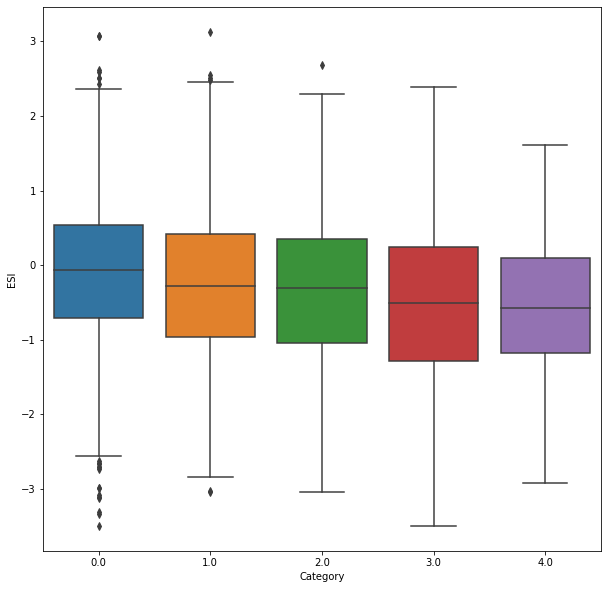

In [73]:
fig, ax=plt.subplots(figsize=(10,10))
g = sns.boxplot(data=df, x='Category', y='ESI')

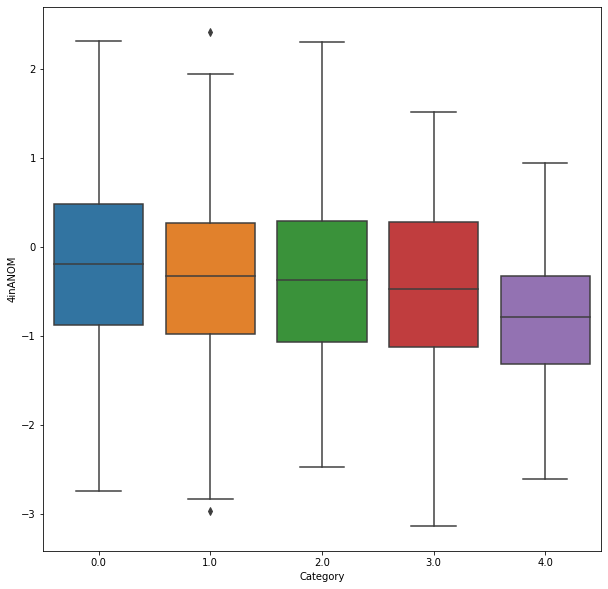

In [74]:
fig, ax=plt.subplots(figsize=(10,10))
g = sns.boxplot(data=df, x='Category', y='4inANOM')

In [75]:
#now for 8-11 months
good_months = df[(df.index.get_level_values('Date').month>=9)&(df.index.get_level_values('Date').month<=11)]

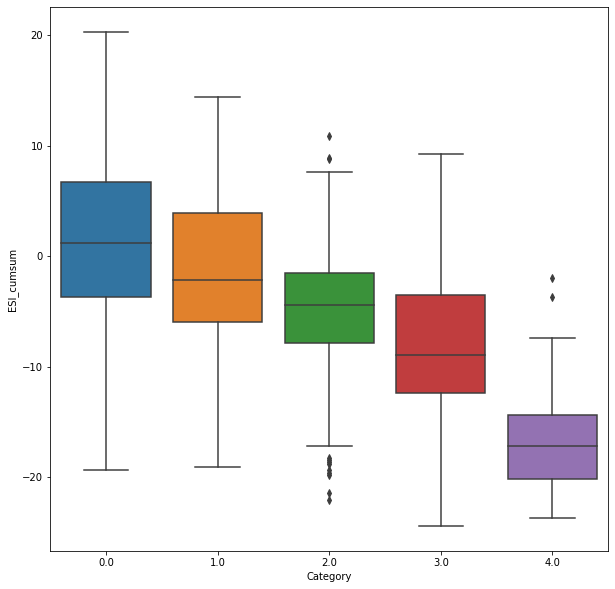

In [76]:
fig, ax=plt.subplots(figsize=(10,10))
g = sns.boxplot(data=good_months, x='Category', y='ESI_cumsum')

In [77]:
df['ESI_bin'] = pd.qcut(df['ESI'],30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '(-3.501, -1.924]'),
  Text(1, 0, '(-1.924, -1.569]'),
  Text(2, 0, '(-1.569, -1.318]'),
  Text(3, 0, '(-1.318, -1.127]'),
  Text(4, 0, '(-1.127, -0.961]'),
  Text(5, 0, '(-0.961, -0.812]'),
  Text(6, 0, '(-0.812, -0.688]'),
  Text(7, 0, '(-0.688, -0.584]'),
  Text(8, 0, '(-0.584, -0.485]'),
  Text(9, 0, '(-0.485, -0.38]'),
  Text(10, 0, '(-0.38, -0.295]'),
  Text(11, 0, '(-0.295, -0.206]'),
  Text(12, 0, '(-0.206, -0.115]'),
  Text(13, 0, '(-0.115, -0.033]'),
  Text(14, 0, '(-0.033, 0.0555]'),
  Text(15, 0, '(0.0555, 0.133]'),
  Text(16, 0, '(0.133, 0.218]'),
  Text(17, 0, '(0.218, 0.301]'),
  Text(18, 0, '(0.301, 0.386]'),
  Text(19, 0, '(0.386, 0.472]'),
  Text(20, 0, '(0.472, 0.552]'),
  Text(21, 0, '(0.552, 0.656]'),
  Text(22, 0, '(0.656, 0.76]'),
  Text(23, 0, '(0.76, 0.87]'),
  Text(24, 0, '(0.87, 1.003]'),
  Text(25, 0, '(1.003,

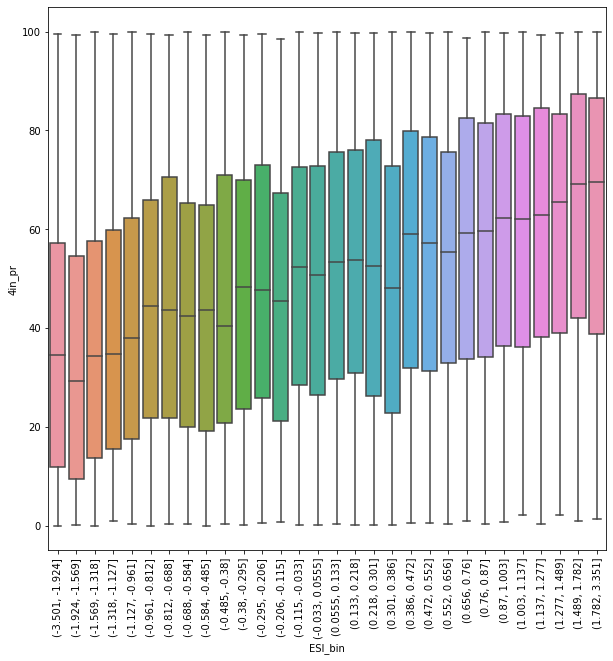

In [78]:
fig, ax=plt.subplots(figsize=(10,10))
g = sns.boxplot(data=df, x='ESI_bin', y='4in_pr', ax=ax)
plt.xticks(rotation=90)

In [79]:
good_months = df[(df.index.get_level_values('Date').month>=9)&(df.index.get_level_values('Date').month<=11)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '(-3.501, -1.924]'),
  Text(1, 0, '(-1.924, -1.569]'),
  Text(2, 0, '(-1.569, -1.318]'),
  Text(3, 0, '(-1.318, -1.127]'),
  Text(4, 0, '(-1.127, -0.961]'),
  Text(5, 0, '(-0.961, -0.812]'),
  Text(6, 0, '(-0.812, -0.688]'),
  Text(7, 0, '(-0.688, -0.584]'),
  Text(8, 0, '(-0.584, -0.485]'),
  Text(9, 0, '(-0.485, -0.38]'),
  Text(10, 0, '(-0.38, -0.295]'),
  Text(11, 0, '(-0.295, -0.206]'),
  Text(12, 0, '(-0.206, -0.115]'),
  Text(13, 0, '(-0.115, -0.033]'),
  Text(14, 0, '(-0.033, 0.0555]'),
  Text(15, 0, '(0.0555, 0.133]'),
  Text(16, 0, '(0.133, 0.218]'),
  Text(17, 0, '(0.218, 0.301]'),
  Text(18, 0, '(0.301, 0.386]'),
  Text(19, 0, '(0.386, 0.472]'),
  Text(20, 0, '(0.472, 0.552]'),
  Text(21, 0, '(0.552, 0.656]'),
  Text(22, 0, '(0.656, 0.76]'),
  Text(23, 0, '(0.76, 0.87]'),
  Text(24, 0, '(0.87, 1.003]'),
  Text(25, 0, '(1.003,

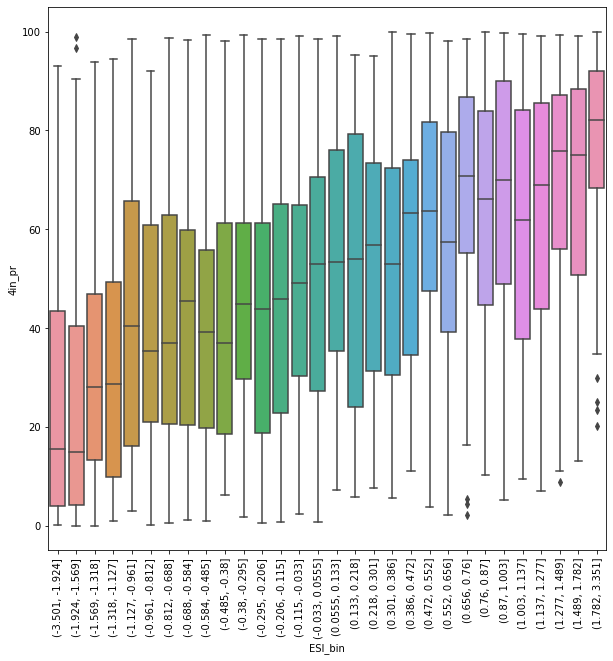

In [80]:
fig, ax=plt.subplots(figsize=(10,10))
g = sns.boxplot(data=good_months, x='ESI_bin', y='4in_pr', ax=ax)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='ESI_cumsum', ylabel='4in_pr'>

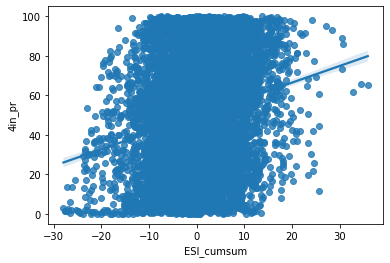

In [81]:
sns.regplot(x='ESI_cumsum', y='4in_pr', data=df)

In [82]:
df['ESI_cumsum_bin'] = pd.qcut(df['ESI_cumsum'],30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '(-3.501, -1.924]'),
  Text(1, 0, '(-1.924, -1.569]'),
  Text(2, 0, '(-1.569, -1.318]'),
  Text(3, 0, '(-1.318, -1.127]'),
  Text(4, 0, '(-1.127, -0.961]'),
  Text(5, 0, '(-0.961, -0.812]'),
  Text(6, 0, '(-0.812, -0.688]'),
  Text(7, 0, '(-0.688, -0.584]'),
  Text(8, 0, '(-0.584, -0.485]'),
  Text(9, 0, '(-0.485, -0.38]'),
  Text(10, 0, '(-0.38, -0.295]'),
  Text(11, 0, '(-0.295, -0.206]'),
  Text(12, 0, '(-0.206, -0.115]'),
  Text(13, 0, '(-0.115, -0.033]'),
  Text(14, 0, '(-0.033, 0.0555]'),
  Text(15, 0, '(0.0555, 0.133]'),
  Text(16, 0, '(0.133, 0.218]'),
  Text(17, 0, '(0.218, 0.301]'),
  Text(18, 0, '(0.301, 0.386]'),
  Text(19, 0, '(0.386, 0.472]'),
  Text(20, 0, '(0.472, 0.552]'),
  Text(21, 0, '(0.552, 0.656]'),
  Text(22, 0, '(0.656, 0.76]'),
  Text(23, 0, '(0.76, 0.87]'),
  Text(24, 0, '(0.87, 1.003]'),
  Text(25, 0, '(1.003,

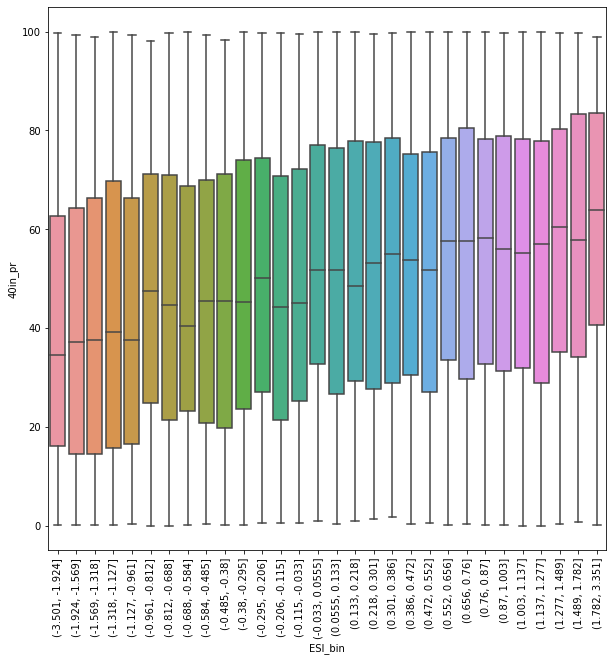

In [83]:
fig, ax=plt.subplots(figsize=(10,10))
g = sns.boxplot(data=df, x='ESI_bin', y='40in_pr', ax=ax)
plt.xticks(rotation=90)

In [84]:
good_months = df[(df.index.month>=9)&(df.index.month<=11)]
good_months['ESI_bin'] = pd.qcut(good_months['ESI'],30)

/tmp/ipykernel_27158/3425253894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_months['ESI_bin'] = pd.qcut(good_months['ESI'],30)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '(-3.477, -1.995]'),
  Text(1, 0, '(-1.995, -1.647]'),
  Text(2, 0, '(-1.647, -1.39]'),
  Text(3, 0, '(-1.39, -1.21]'),
  Text(4, 0, '(-1.21, -1.055]'),
  Text(5, 0, '(-1.055, -0.891]'),
  Text(6, 0, '(-0.891, -0.736]'),
  Text(7, 0, '(-0.736, -0.618]'),
  Text(8, 0, '(-0.618, -0.5]'),
  Text(9, 0, '(-0.5, -0.391]'),
  Text(10, 0, '(-0.391, -0.299]'),
  Text(11, 0, '(-0.299, -0.216]'),
  Text(12, 0, '(-0.216, -0.146]'),
  Text(13, 0, '(-0.146, -0.048]'),
  Text(14, 0, '(-0.048, 0.042]'),
  Text(15, 0, '(0.042, 0.129]'),
  Text(16, 0, '(0.129, 0.209]'),
  Text(17, 0, '(0.209, 0.296]'),
  Text(18, 0, '(0.296, 0.382]'),
  Text(19, 0, '(0.382, 0.468]'),
  Text(20, 0, '(0.468, 0.543]'),
  Text(21, 0, '(0.543, 0.636]'),
  Text(22, 0, '(0.636, 0.743]'),
  Text(23, 0, '(0.743, 0.839]'),
  Text(24, 0, '(0.839, 0.954]'),
  Text(25, 0, '(0.954, 1.1

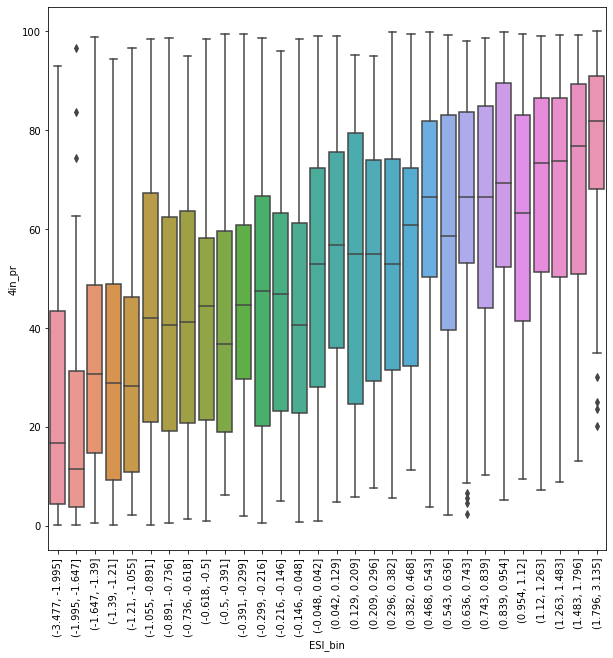

In [85]:
fig, ax=plt.subplots(figsize=(10,10))
g = sns.boxplot(data=good_months, x='ESI_bin', y='4in_pr', ax=ax)
plt.xticks(rotation=90)

In [86]:
summer_months=df[(df.index.month>=6)&(df.index.month<=9)]
summer_months['ESI_bin'] = pd.qcut(summer_months['ESI'],30)

/tmp/ipykernel_27158/1020472137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_months['ESI_bin'] = pd.qcut(summer_months['ESI'],30)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '(-3.501, -1.961]'),
  Text(1, 0, '(-1.961, -1.602]'),
  Text(2, 0, '(-1.602, -1.343]'),
  Text(3, 0, '(-1.343, -1.177]'),
  Text(4, 0, '(-1.177, -0.988]'),
  Text(5, 0, '(-0.988, -0.82]'),
  Text(6, 0, '(-0.82, -0.702]'),
  Text(7, 0, '(-0.702, -0.578]'),
  Text(8, 0, '(-0.578, -0.468]'),
  Text(9, 0, '(-0.468, -0.353]'),
  Text(10, 0, '(-0.353, -0.269]'),
  Text(11, 0, '(-0.269, -0.165]'),
  Text(12, 0, '(-0.165, -0.085]'),
  Text(13, 0, '(-0.085, 0.0078]'),
  Text(14, 0, '(0.0078, 0.088]'),
  Text(15, 0, '(0.088, 0.174]'),
  Text(16, 0, '(0.174, 0.278]'),
  Text(17, 0, '(0.278, 0.353]'),
  Text(18, 0, '(0.353, 0.437]'),
  Text(19, 0, '(0.437, 0.507]'),
  Text(20, 0, '(0.507, 0.607]'),
  Text(21, 0, '(0.607, 0.703]'),
  Text(22, 0, '(0.703, 0.793]'),
  Text(23, 0, '(0.793, 0.904]'),
  Text(24, 0, '(0.904, 1.01]'),
  Text(25, 0, '(1.01,

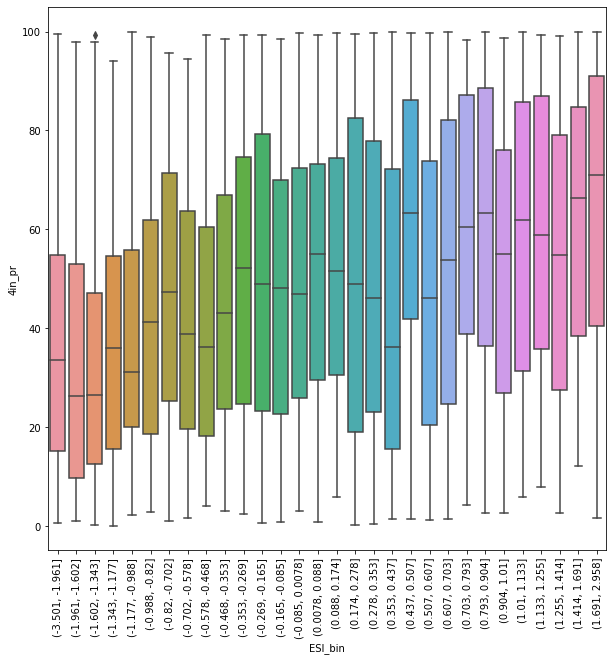

In [87]:
fig, ax=plt.subplots(figsize=(10,10))
g = sns.boxplot(data=summer_months, x='ESI_bin', y='4in_pr', ax=ax)
plt.xticks(rotation=90)

In [88]:
sigs = {}
for s in df['station'].unique():
    #get the stationframe from the main dataset
    stationFrame=df[df['station']==s]
    
    #get the signigigance df at the same station
    sigdf = SCAN_SIG_READ[SCAN_SIG_READ['station']==s]
    
    for m in sigdf['Month'].unique():
        #get the stationFrame where sigFrame == m for station s
        monthStation = stationFrame[stationFrame.index.month==m]
        sigs[s+str(m)]=monthStation
        

In [89]:
newdf = pd.concat(sigs, axis=0)

In [90]:
newdf

ESI       station  week_x  week_y   2inANOM  \
              Date                                                        
2053:AL:SCAN4 2002-04-02 -0.435  2053:AL:SCAN      14      14  0.724556   
              2002-04-09 -0.163  2053:AL:SCAN      15      15  0.318988   
              2002-04-16 -0.484  2053:AL:SCAN      16      16  0.158151   
              2002-04-23 -1.498  2053:AL:SCAN      17      17 -0.756754   
              2002-04-30  0.554  2053:AL:SCAN      18      18 -0.873574   
...                         ...           ...     ...     ...       ...   
2181:AL:SCAN2 2019-02-26  0.198  2181:AL:SCAN       9       9  0.347273   
              2020-02-05  0.198  2181:AL:SCAN       6       6  1.809272   
              2020-02-12 -0.841  2181:AL:SCAN       7       7  1.302807   
              2020-02-19 -0.469  2181:AL:SCAN       8       8  1.087912   
              2020-02-26  1.661  2181:AL:SCAN       9       9  1.041819   

                           4inANOM   8inANOM  20inANOM  40inANOM     2in_pr  \
              Date                                                            
2053:AL:SCAN4 2002-04-02  0.095368  0.720884 -0.133735 -0.241910  74.723953   
              2002-04-09 -0.067437  0.484996 -0.619942  0.189875  58.740571   
              2002-04-16  0.072646  0.665487 -0.431747  0.349802  53.350825   
              2002-04-23 -0.837206  0.346158 -0.322725  0.079589  23.330054   
              2002-04-30 -1.832470  0.071150 -0.237434  0.021554  20.225210   
...                            ...       ...       ...       ...        ...   
2181:AL:SCAN2 2019-02-26       NaN  0.006028 -1.179529 -0.079067  59.954083   
              2020-02-05       NaN  1.576041  1.187023  1.614214  98.381983   
              2020-02-12       NaN  1.016485  1.558269  1.662730  93.025036   
              2020-02-19       NaN  1.355394  0.411302  0.946471  87.810211   
              2020-02-26       NaN  1.392552  0.183447  1.208351  86.432710   

                          ...                       point  Category  \
              Date        ...                                         
2053:AL:SCAN4 2002-04-02  ...      POINT (-86.53333 34.9)       NaN   
              2002-04-09  ...      POINT (-86.53333 34.9)       NaN   
              2002-04-16  ...      POINT (-86.53333 34.9)       NaN   
              2002-04-23  ...      POINT (-86.53333 34.9)       0.0   
              2002-04-30  ...      POINT (-86.53333 34.9)       0.0   
...                       ...                         ...       ...   
2181:AL:SCAN2 2019-02-26  ...  POINT (-87.55277 31.10923)       NaN   
              2020-02-05  ...  POINT (-87.55277 31.10923)       0.0   
              2020-02-12  ...  POINT (-87.55277 31.10923)       NaN   
              2020-02-19  ...  POINT (-87.55277 31.10923)       NaN   
              2020-02-26  ...  POINT (-87.55277 31.10923)       NaN   

                               Station Name  ESI_cumsum      ESI_pc  \
              Date                                                    
2053:AL:SCAN4 2002-04-02              Wtars      -6.540 -130.938834   
              2002-04-09              Wtars      -6.703  -62.528736   
              2002-04-16              Wtars      -7.187  196.932515   
              2002-04-23              Wtars      -8.685  209.504132   
              2002-04-30              Wtars      -8.131 -136.982644   
...                                     ...         ...         ...   
2181:AL:SCAN2 2019-02-26  Perdido Riv Farms       0.523 -110.448549   
              2020-02-05  Perdido Riv Farms      -0.712  -76.230492   
              2020-02-12  Perdido Riv Farms      -1.553 -524.747475   
              2020-02-19  Perdido Riv Farms      -2.022  -44.233056   
              2020-02-26  Perdido Riv Farms      -0.361 -454.157783   

                          ESI_cumsum_pc  4inANOM_cumsum      4inpc  \
              Date                                                   
2053:AL:SCAN4 2002-04-02       7.125

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '(-3.501, -1.924]'),
  Text(1, 0, '(-1.924, -1.569]'),
  Text(2, 0, '(-1.569, -1.318]'),
  Text(3, 0, '(-1.318, -1.127]'),
  Text(4, 0, '(-1.127, -0.961]'),
  Text(5, 0, '(-0.961, -0.812]'),
  Text(6, 0, '(-0.812, -0.688]'),
  Text(7, 0, '(-0.688, -0.584]'),
  Text(8, 0, '(-0.584, -0.485]'),
  Text(9, 0, '(-0.485, -0.38]'),
  Text(10, 0, '(-0.38, -0.295]'),
  Text(11, 0, '(-0.295, -0.206]'),
  Text(12, 0, '(-0.206, -0.115]'),
  Text(13, 0, '(-0.115, -0.033]'),
  Text(14, 0, '(-0.033, 0.0555]'),
  Text(15, 0, '(0.0555, 0.133]'),
  Text(16, 0, '(0.133, 0.218]'),
  Text(17, 0, '(0.218, 0.301]'),
  Text(18, 0, '(0.301, 0.386]'),
  Text(19, 0, '(0.386, 0.472]'),
  Text(20, 0, '(0.472, 0.552]'),
  Text(21, 0, '(0.552, 0.656]'),
  Text(22, 0, '(0.656, 0.76]'),
  Text(23, 0, '(0.76, 0.87]'),
  Text(24, 0, '(0.87, 1.003]'),
  Text(25, 0, '(1.003,

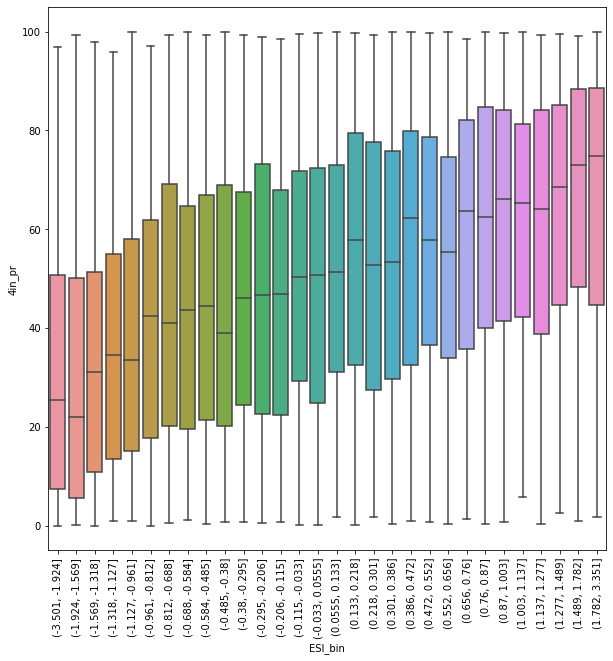

In [91]:
fig, ax=plt.subplots(figsize=(10,10))
g = sns.boxplot(data=newdf,x='ESI_bin', y='4in_pr', ax=ax)
plt.xticks(rotation=90)

In [92]:
import scipy as sp

In [93]:
newdf.dropna(subset=['4in_pr'], inplace=True)

In [94]:
newdf

ESI       station  week_x  week_y   2inANOM  \
              Date                                                        
2053:AL:SCAN4 2002-04-02 -0.435  2053:AL:SCAN      14      14  0.724556   
              2002-04-09 -0.163  2053:AL:SCAN      15      15  0.318988   
              2002-04-16 -0.484  2053:AL:SCAN      16      16  0.158151   
              2002-04-23 -1.498  2053:AL:SCAN      17      17 -0.756754   
              2002-04-30  0.554  2053:AL:SCAN      18      18 -0.873574   
...                         ...           ...     ...     ...       ...   
2181:AL:SCAN2 2017-02-19 -1.245  2181:AL:SCAN       7       7 -1.391765   
              2017-02-26 -1.290  2181:AL:SCAN       8       8 -0.508383   
              2018-02-05 -0.247  2181:AL:SCAN       6       6 -0.398190   
              2018-02-12  1.660  2181:AL:SCAN       7       7  0.849407   
              2018-02-19  2.106  2181:AL:SCAN       8       8  0.049001   

                           4inANOM   8inANOM  20inANOM  40inANOM     2in_pr  \
              Date                                                            
2053:AL:SCAN4 2002-04-02  0.095368  0.720884 -0.133735 -0.241910  74.723953   
              2002-04-09 -0.067437  0.484996 -0.619942  0.189875  58.740571   
              2002-04-16  0.072646  0.665487 -0.431747  0.349802  53.350825   
              2002-04-23 -0.837206  0.346158 -0.322725  0.079589  23.330054   
              2002-04-30 -1.832470  0.071150 -0.237434  0.021554  20.225210   
...                            ...       ...       ...       ...        ...   
2181:AL:SCAN2 2017-02-19 -0.880697 -1.029576 -0.904181 -0.816375   7.794905   
              2017-02-26  0.620348 -1.312816  0.141193 -0.208365  31.365475   
              2018-02-05 -0.190989  0.416556       NaN       NaN  34.688969   
              2018-02-12  1.438034  0.679838       NaN       NaN  79.588936   
              2018-02-19  0.726985  0.219985       NaN       NaN  49.404176   

                          ...                       point  Category  \
              Date        ...                                         
2053:AL:SCAN4 2002-04-02  ...      POINT (-86.53333 34.9)       NaN   
              2002-04-09  ...      POINT (-86.53333 34.9)       NaN   
              2002-04-16  ...      POINT (-86.53333 34.9)       NaN   
              2002-04-23  ...      POINT (-86.53333 34.9)       0.0   
              2002-04-30  ...      POINT (-86.53333 34.9)       0.0   
...                       ...                         ...       ...   
2181:AL:SCAN2 2017-02-19  ...  POINT (-87.55277 31.10923)       NaN   
              2017-02-26  ...  POINT (-87.55277 31.10923)       NaN   
              2018-02-05  ...  POINT (-87.55277 31.10923)       2.0   
              2018-02-12  ...  POINT (-87.55277 31.10923)       2.0   
              2018-02-19  ...  POINT (-87.55277 31.10923)       1.0   

                               Station Name  ESI_cumsum      ESI_pc  \
              Date                                                    
2053:AL:SCAN4 2002-04-02              Wtars      -6.540 -130.938834   
              2002-04-09              Wtars      -6.703  -62.528736   
              2002-04-16              Wtars      -7.187  196.932515   
              2002-04-23              Wtars      -8.685  209.504132   
              2002-04-30              Wtars      -8.131 -136.982644   
...                                     ...         ...         ...   
2181:AL:SCAN2 2017-02-19  Perdido Riv Farms      -5.776  -17.275748   
              2017-02-26  Perdido Riv Farms      -7.066    3.614458   
              2018-02-05  Perdido Riv Farms       3.484  -52.408478   
              2018-02-12  Perdido Riv Farms       5.144 -772.064777   
              2018-02-19  Perdido Riv Farms       7.250   26.867470   

                          ESI_cumsum_pc  4inANOM_cumsum       4inpc  \
              Date                                                    
2053:AL:SCAN4 2002-04-02       7.1

In [95]:
def annotate(**kws):
    r, p = sp.stats.pearsonr(newdf['ESI'], newdf['4in_pr'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)

Text(0.5, 1.0, 'ESI vs 4in_pr')

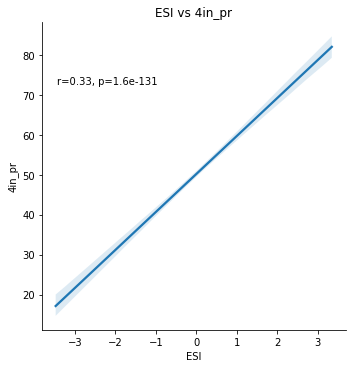

In [96]:
g = sns.lmplot(x='ESI', y='4in_pr', data=newdf, scatter=False)
g.map_dataframe(annotate)
ax = plt.gca()
ax.set_title('ESI vs 4in_pr')

In [97]:
soils = SOILS_READ[SOILS_READ['depth']=='HSMS-4.0in'].transpose()

In [98]:
soils.reset_index(inplace=True)

In [99]:
soils=soils.drop(0)

In [100]:
soils

index  6
1   2057:AL:SCAN  D
2   2078:AL:SCAN  B
3   2177:AL:SCAN  D
4   2113:AL:SCAN  A
5   2174:AL:SCAN  D
6   2055:AL:SCAN  B
7   2173:AL:SCAN  B
8   2180:AL:SCAN  A
9   2114:AL:SCAN  D
10  2178:AL:SCAN  A
11  2181:AL:SCAN  A
12  2182:AL:SCAN  A
13  2176:AL:SCAN  A
14  2056:AL:SCAN  B
15  2179:AL:SCAN  A
16  2115:AL:SCAN  A
17  2175:AL:SCAN  B
18  2053:AL:SCAN  B

In [101]:
soils=soils.rename(columns={'index':'station', 6:'4insoils'})

In [102]:
newdf.reset_index(inplace=True)

In [103]:
final = newdf.merge(soils, on=['station'])

In [104]:
final['ESI_bin'] = pd.qcut(final['ESI'], 12, labels=np.arange(0,12,1))

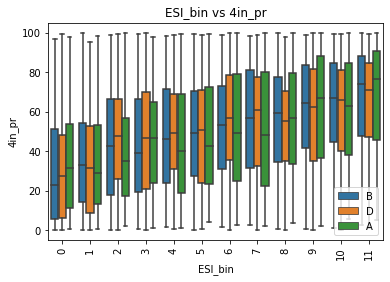

In [105]:
g = sns.boxplot(x='ESI_bin', y='4in_pr', data=final, hue='4insoils')
ax = plt.gca()
ax.set_title('ESI_bin vs 4in_pr')
plt.xticks(rotation=90)
ax.legend(loc='lower right')

In [106]:
final.set_index('Date', inplace=True)

In [107]:
goodmonths = final[(final.index.month>=5)&(final.index.month<=11)]

Text(0.5, 1.0, 'ESI Bins vs 4in Percentile Rank May-September')

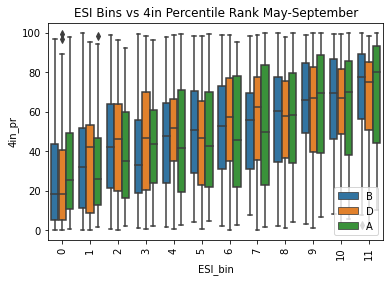

In [108]:
g = sns.boxplot(x='ESI_bin', y='4in_pr', data=goodmonths, hue='4insoils')
ax = plt.gca()
ax.set_title('ESI_bin vs 4in_pr')
plt.xticks(rotation=90)
ax.legend(loc='lower right')
ax.set_title('ESI Bins vs 4in Percentile Rank May-September')

In [109]:
final

level_0    ESI       station  week_x  week_y   2inANOM  \
Date                                                                       
2002-04-02  2053:AL:SCAN4 -0.435  2053:AL:SCAN      14      14  0.724556   
2002-04-09  2053:AL:SCAN4 -0.163  2053:AL:SCAN      15      15  0.318988   
2002-04-16  2053:AL:SCAN4 -0.484  2053:AL:SCAN      16      16  0.158151   
2002-04-23  2053:AL:SCAN4 -1.498  2053:AL:SCAN      17      17 -0.756754   
2002-04-30  2053:AL:SCAN4  0.554  2053:AL:SCAN      18      18 -0.873574   
...                   ...    ...           ...     ...     ...       ...   
2017-02-19  2181:AL:SCAN2 -1.245  2181:AL:SCAN       7       7 -1.391765   
2017-02-26  2181:AL:SCAN2 -1.290  2181:AL:SCAN       8       8 -0.508383   
2018-02-05  2181:AL:SCAN2 -0.247  2181:AL:SCAN       6       6 -0.398190   
2018-02-12  2181:AL:SCAN2  1.660  2181:AL:SCAN       7       7  0.849407   
2018-02-19  2181:AL:SCAN2  2.106  2181:AL:SCAN       8       8  0.049001   

             4inANOM   8inANOM  20inANOM  40inANOM  ...  Category  \
Date                                                ...             
2002-04-02  0.095368  0.720884 -0.133735 -0.241910  ...       NaN   
2002-04-09 -0.067437  0.484996 -0.619942  0.189875  ...       NaN   
2002-04-16  0.072646  0.665487 -0.431747  0.349802  ...       NaN   
2002-04-23 -0.837206  0.346158 -0.322725  0.079589  ...       0.0   
2002-04-30 -1.832470  0.071150 -0.237434  0.021554  ...       0.0   
...              ...       ...       ...       ...  ...       ...   
2017-02-19 -0.880697 -1.029576 -0.904181 -0.816375  ...       NaN   
2017-02-26  0.620348 -1.312816  0.141193 -0.208365  ...       NaN   
2018-02-05 -0.190989  0.416556       NaN       NaN  ...       2.0   
2018-02-12  1.438034  0.679838       NaN       NaN  ...       2.0   
2018-02-19  0.726985  0.219985       NaN       NaN  ...       1.0   

                 Station Name  ESI_cumsum      ESI_pc  ESI_cumsum_pc  \
Date                                                                   
2002-04-02              Wtars      -6.540 -130.938834       7.125307   
2002-04-09              Wtars      -6.703  -62.528736       2.492355   
2002-04-16              Wtars      -7.187  196.932515       7.220647   
2002-04-23              Wtars      -8.685  209.504132      20.843189   
2002-04-30              Wtars      -8.131 -136.982644      -6.378814   
...                       ...         ...         ...            ...   
2017-02-19  Perdido Riv Farms      -5.776  -17.275748      27.477378   
2017-02-26  Perdido Riv Farms      -7.066    3.614458      22.333795   
2018-02-05  Perdido Riv Farms       3.484  -52.408478      -6.620209   
2018-02-12  Perdido Riv Farms       5.144 -772.064777      47.646383   
2018-02-19  Perdido Riv Farms       7.250   26.867470      40.940902   

            4inANOM_cumsum       4inpc  ESI_bin    ESI_cumsum_bin  4insoils  
Date                                                                         
2002-04-02     -531.640691   -7.723911        3  (-6.641, -5.548]         B  
2002-04-09     -538.384394  -10.863758        5   (-8.08, -6.641]         B  
2002-04-16     -531.119776   10.439560        3   (-8.08, -6.641]         B  
2002-04-23     -614.840350  -59.113523        0   (-9.831, -8.08]         B  
2002-04-30     -798.087335  -85.896018        8   (-9.831, -8.08]         B  
...                    ...         ...      ...               ...       ...  
2017-02-19      821.743634  -79.950553        1  (-6.641, -5.548]         A  
2017-02-26      883.778425  262.125661        1   (-8.08, -6.641]         A  
2018-02-05     -234.802365  -23.364289        4    (3.115, 3.731]         A  
2018-02-12      -90.998993  129.413385       11     (4.43, 5.191]         A  
2018-02-19      -18.300523  -21.152461       11    (7.025, 8.149]         A  

[5064 rows x 31 columns]

In [110]:
categories = final[['ESI_bin', '2inSMSDC', '4inSMSDC', '8inSMSDC', '20inSMSDC','40inSMSDC', 'Category', 'station', '4insoils']]

In [111]:
categories['ESI_bin'] = categories['ESI_bin'].astype(int)

/tmp/ipykernel_27158/887033803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categories['ESI_bin'] = categories['ESI_bin'].astype(int)


In [112]:
categories[(categories.index.year==2019)&(categories['station']=='2057:AL:SCAN')]

ESI_bin  2inSMSDC  4inSMSDC  8inSMSDC  20inSMSDC  40inSMSDC  \
Date                                                                      
2019-04-02        3       2.0       NaN       NaN        NaN        NaN   
2019-04-09        9       NaN       NaN       NaN        NaN        NaN   
2019-04-16        8       NaN       NaN       NaN        NaN        NaN   
2019-04-23        8       NaN       NaN       NaN        NaN        NaN   
2019-04-30        3       0.0       NaN       NaN        NaN        NaN   
2019-06-04        1       1.0       NaN       NaN        NaN        NaN   
2019-06-18        6       0.0       NaN       NaN        NaN        NaN   
2019-07-02        8       0.0       NaN       NaN        NaN        NaN   
2019-07-09        4       1.0       NaN       NaN        NaN        NaN   
2019-07-16        7       NaN       NaN       NaN        NaN        NaN   
2019-07-23       11       NaN       NaN       NaN        NaN        NaN   
2019-07-30        2       0.0       NaN       NaN        NaN        NaN   
2019-08-06        8       NaN       NaN       NaN        NaN        NaN   
2019-08-13        6       NaN       NaN       NaN        NaN        NaN   
2019-08-20        4       1.0       NaN       NaN        NaN        NaN   
2019-08-27        2       0.0       NaN       NaN        NaN        NaN   
2019-09-03        1       NaN       NaN       NaN        NaN        NaN   
2019-09-10        0       1.0       NaN       NaN        NaN        NaN   
2019-09-17        1       NaN       NaN       NaN        NaN        NaN   
2019-09-24        1       2.0       NaN       NaN        NaN        NaN   
2019-10-01        3       NaN       NaN       NaN        NaN        NaN   
2019-10-08        1       0.0       NaN       NaN        NaN        NaN   
2019-10-15        7       NaN       NaN       NaN        NaN        NaN   
2019-10-22        7       1.0       NaN       NaN        NaN        NaN   
2019-10-29        3       NaN       NaN       NaN        NaN        NaN   
2019-11-05       11       NaN       NaN       NaN        NaN        NaN   
2019-11-12        9       NaN       NaN       NaN        NaN        NaN   
2019-11-19        7       NaN       NaN       NaN        NaN        NaN   
2019-11-26        8       NaN       NaN       NaN        NaN        NaN   
2019-12-03        4       NaN       NaN       NaN        NaN        NaN   
2019-12-10        6       3.0       NaN       NaN        NaN        NaN   
2019-12-17        8       NaN       NaN       NaN        NaN        NaN   
2019-12-24       10       NaN       NaN       NaN        NaN        NaN   
2019-12-31        3       NaN       NaN       NaN        NaN        NaN   
2019-01-08        7       1.0       NaN       NaN        NaN        NaN   
2019-01-15        0       4.0       NaN       NaN        NaN        NaN   
2019-01-22        1       1.0       NaN       NaN        NaN        NaN   
2019-01-29        2       NaN       NaN       NaN        NaN        NaN   

            Category       station 4insoils  
Date                                         
2019-04-02       NaN  2057:AL:SCAN        D  
2019-04-09       NaN  2057:AL:SCAN        D  
2019-04-16       NaN  2057:AL:SCAN        D  
2019-04-23       NaN  2057:AL:SCAN        D  
2019-04-30       NaN  2057:AL:SCAN        D  
2019-06-04       0.0  2057:AL:SCAN        D  
2019-06-18       0.0  2057:AL:SCAN        D  
2019-07-02       0.0  2057:AL:SCAN        D  
2019-07-09       0.0  2057:AL:SCAN        D  
2019-07-16       0.0  2057:AL:SCAN        D  
2019-07-23       NaN  2057:AL:SCAN        D  
2019-07-30       NaN  2057:AL:SCAN        D  
2019-08-06       NaN  2057:AL:SCAN        D  
2019-08-13       NaN  2057:AL:SCAN        D  
2019-08-20       NaN  2057:AL:SCAN        D  
2019-08-27       NaN  2057:AL:SCAN        D  
2019-09-03       NaN  2057:AL:SCAN        D  
2019-09-10       NaN  2057:AL:SCAN        D  
2019-09-17       0.0  2057:AL:SCAN        D  
2019-09-24       1.0  2057:AL:SCAN        D  

In [113]:
combined.columns

Index(['ESI', 'station', 'week_x', 'week_y', '2inANOM', '4inANOM', '8inANOM',
       '20inANOM', '40inANOM', '2in_pr', '4in_pr', '8in_pr', '20in_pr',
       '40in_pr', '2inSMSDC', '4inSMSDC', '8inSMSDC', '20inSMSDC', '40inSMSDC',
       'point', 'Category', 'Station Name'],
      dtype='object')

In [114]:
test = combined[(combined['station']=='2078:AL:SCAN')&(combined.index.month>=5)&(combined.index.month<=11)]

/tmp/ipykernel_27158/602000393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum'] = yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/602000393.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['4inANOM_cumsum'] = yearFrame['4inANOM'].cumsum()
/tmp/ipykernel_27158/602000393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

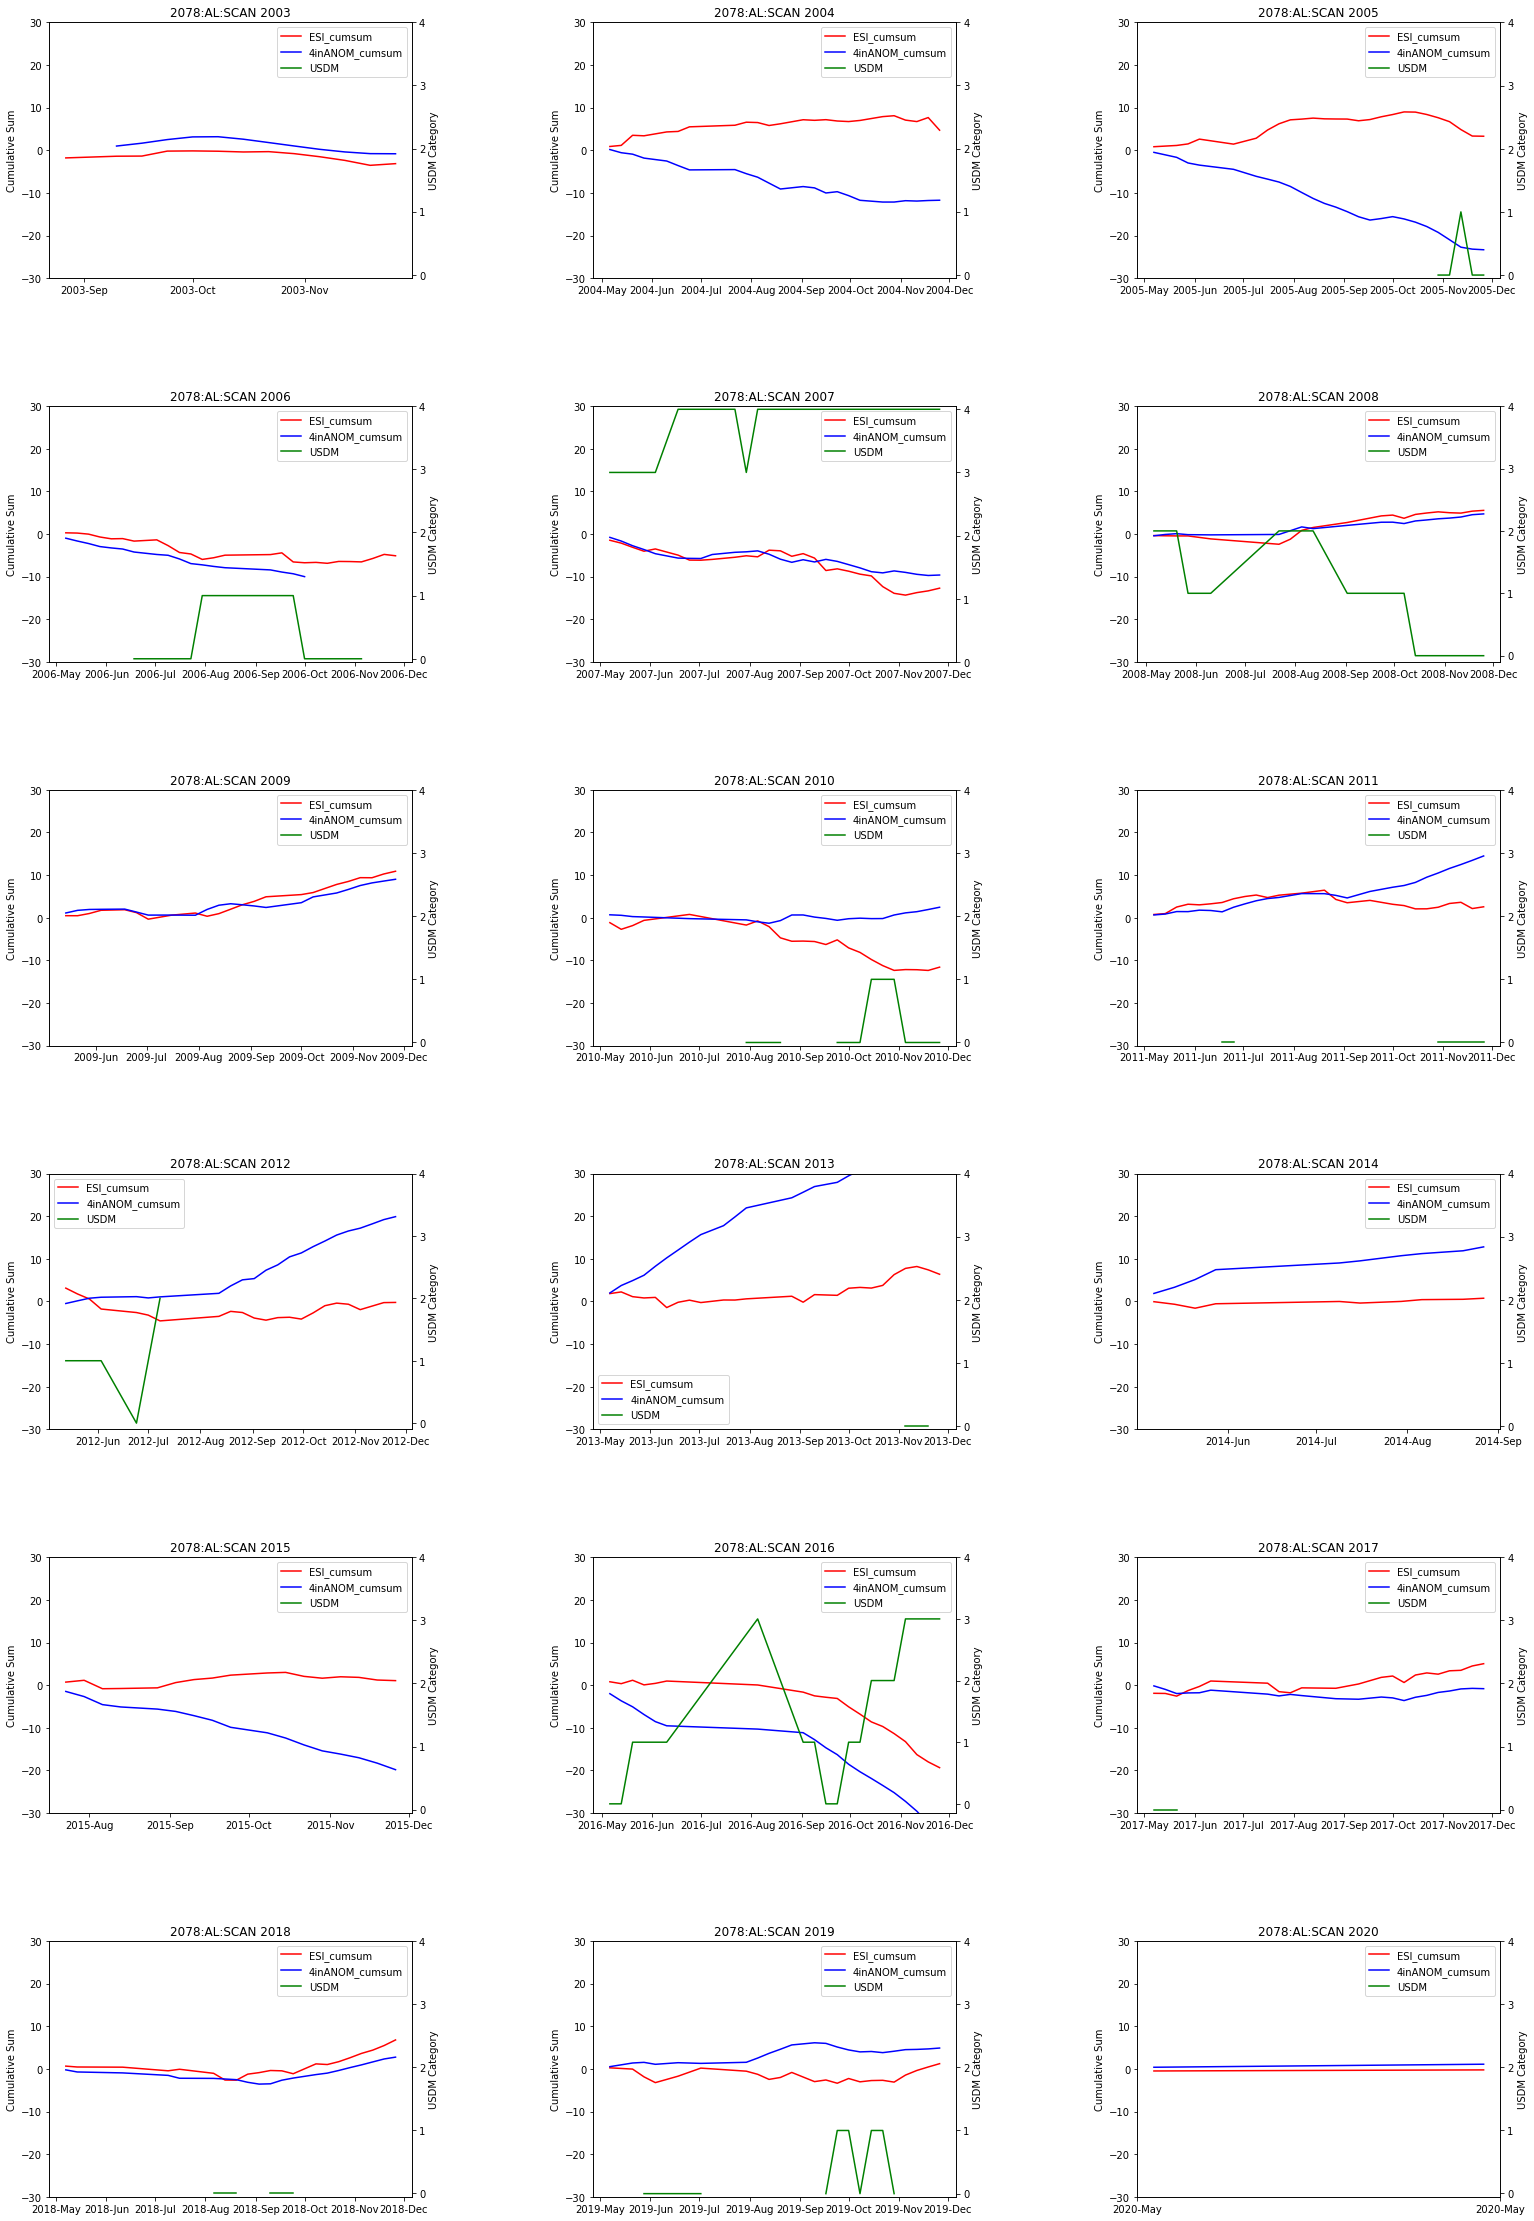

In [115]:
fig, ax = plt.subplots(figsize=(26,40), nrows=6, ncols=3)
axes = ax.flatten()
count=0
for y in test.index.year.unique():
    yearFrame = test[test.index.year==y]
    yearFrame['ESI_cumsum'] = yearFrame['ESI'].cumsum()
    yearFrame['4inANOM_cumsum'] = yearFrame['4inANOM'].cumsum()
    ESI_h, = axes[count].plot(yearFrame['ESI_cumsum'], label='ESI_cumsum', color='red')
    axes[count].set_ylabel('Cumulative Sum')
    axes[count].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    axes[count].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
    ANOM4in_h, = axes[count].plot(yearFrame['4inANOM_cumsum'], label='4inANOM_cumsum', color='blue')
    axes[count].set_ylim(-30,30)
    
    axes2 = axes[count].twinx()
    USDM_h, = axes2.plot(yearFrame['Category'], label='USDM', color='green')
    
    axes2.set_yticks([0,1,2,3,4])
    axes2.set_ylabel('USDM Category')
    
    axes[count].set_title('2078:AL:SCAN ' + str(y))
    axes[count].legend(handles=[ESI_h, ANOM4in_h, USDM_h])
    count+=1
plt.subplots_adjust(hspace=0.5, wspace=0.5)

/tmp/ipykernel_27158/2943343103.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum'] = yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/2943343103.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum'] = yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/2943343103.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

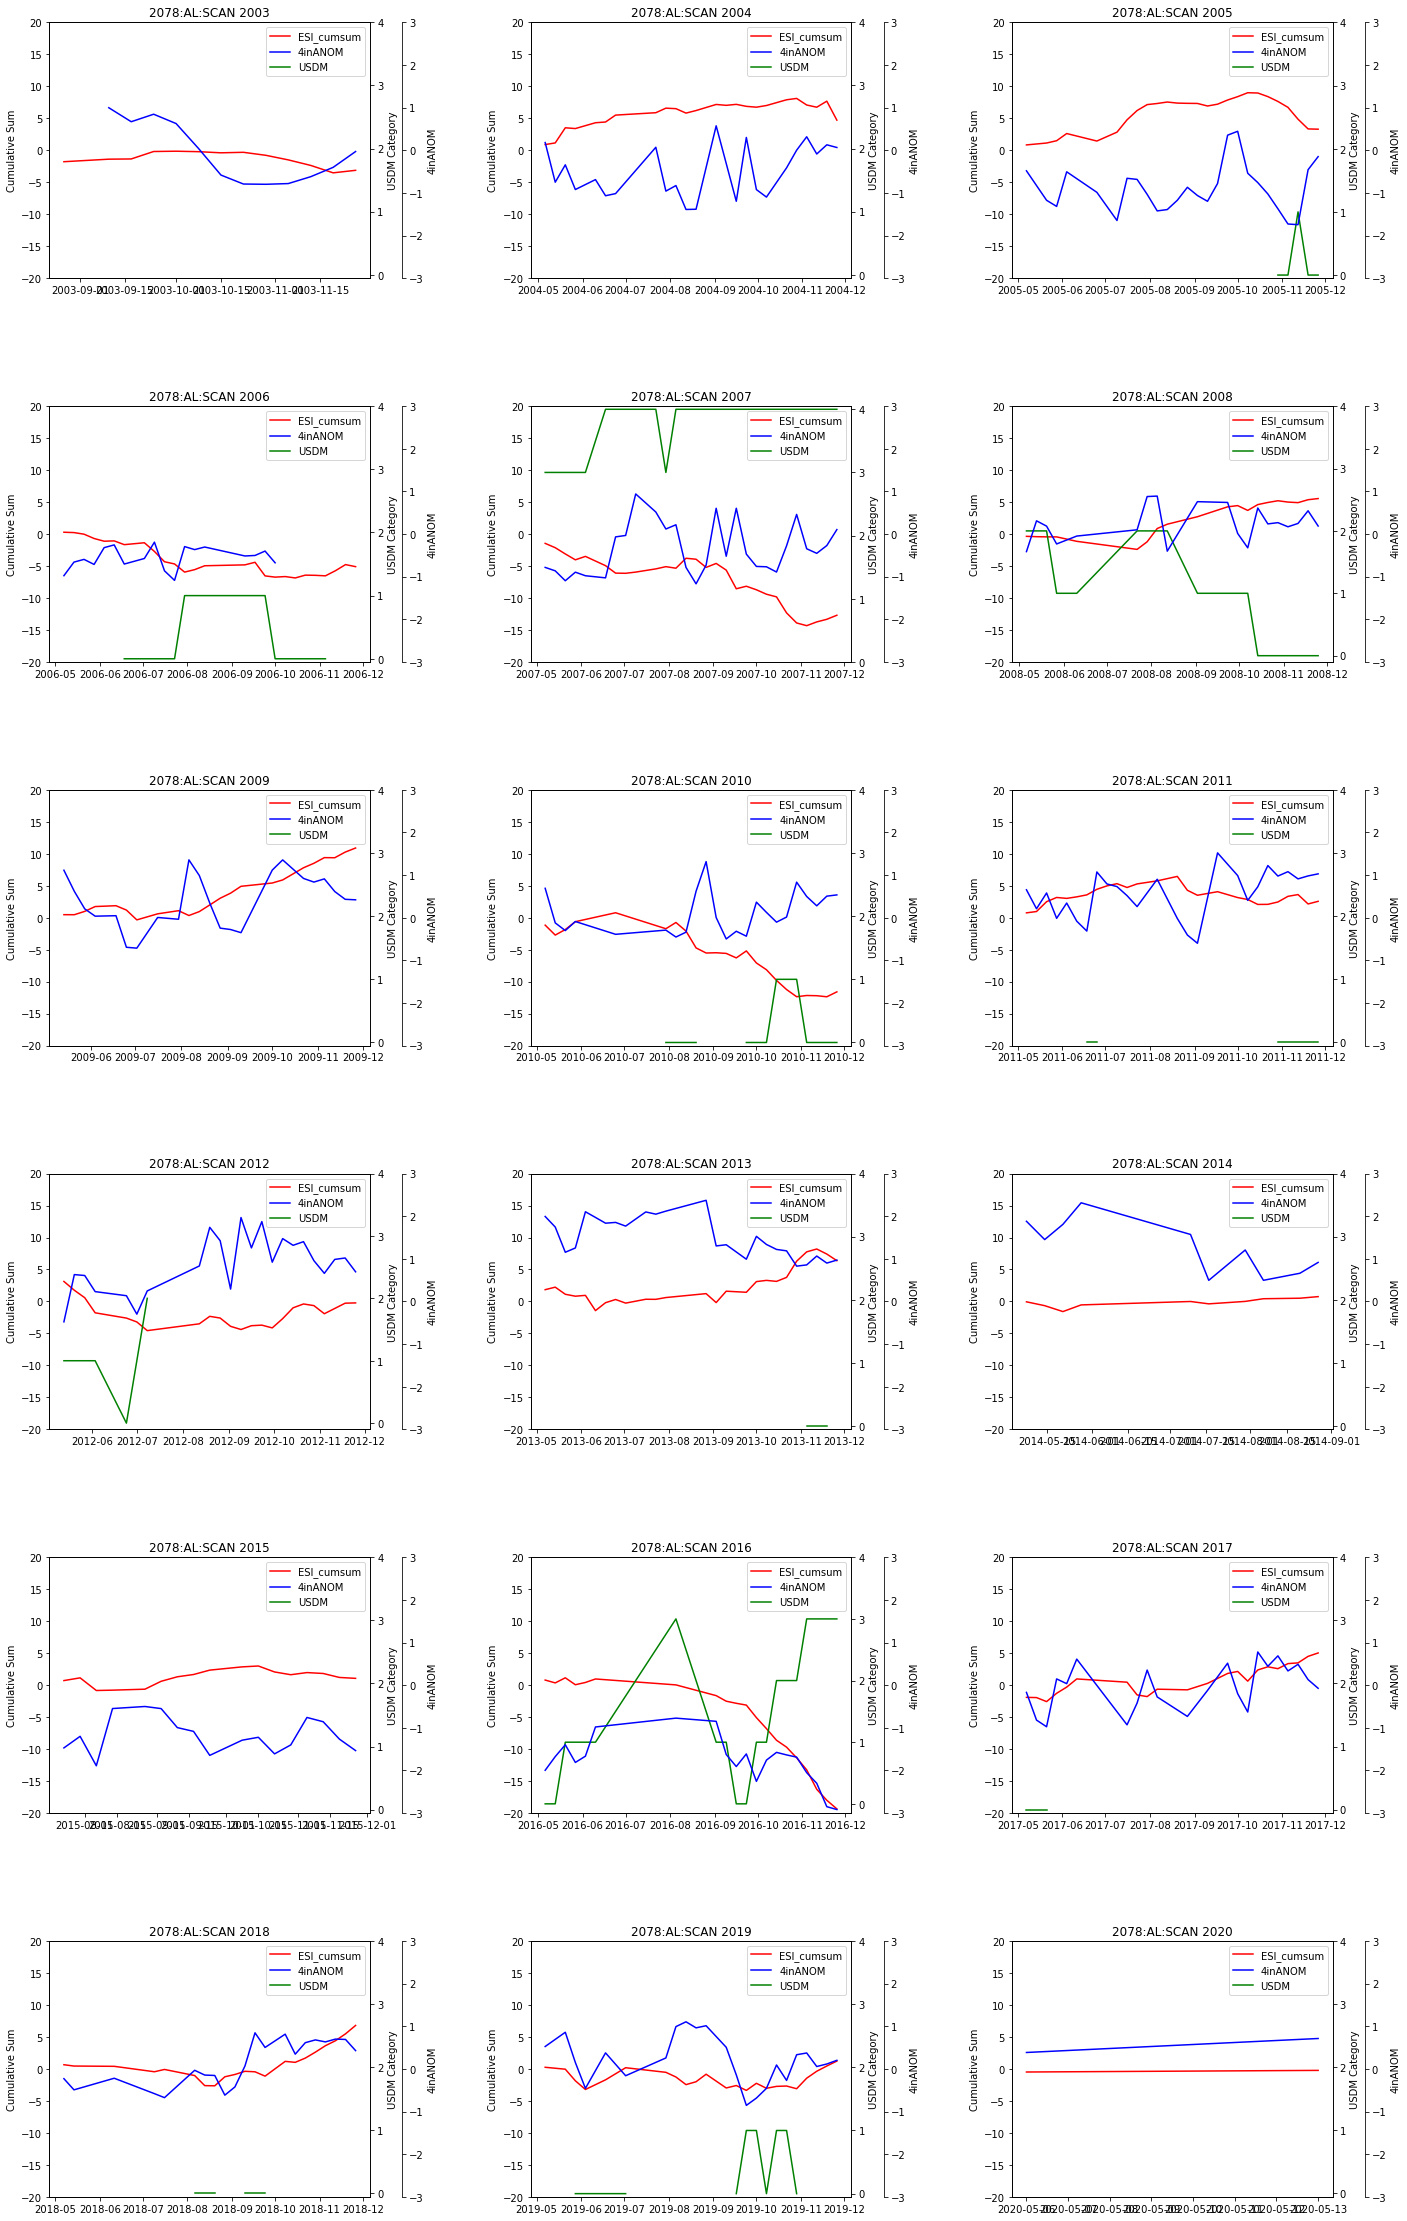

In [116]:
fig, ax = plt.subplots(figsize=(23,40), nrows=6, ncols=3)
axes = ax.flatten()
count=0
for y in test.index.year.unique():
    yearFrame = test[test.index.year==y]
    yearFrame['ESI_cumsum'] = yearFrame['ESI'].cumsum()
    ESI_h, = axes[count].plot(yearFrame['ESI_cumsum'], label='ESI_cumsum', color='red')
    axes[count].set_ylabel('Cumulative Sum')
    axes[count].set_ylim(-20, 20)
    
    axes2 = axes[count].twinx()
    USDM_h, = axes2.plot(yearFrame['Category'], label='USDM', color='green')
    axes2.set_ylabel('USDM Category')
    axes2.set_yticks([0,1,2,3,4])
    
    axes3 = axes[count].twinx()
    axes3.spines.right.set_position(("axes", 1.1))
    ANOM4in_h, = axes3.plot(yearFrame['4inANOM'], label='4inANOM', color='blue')
    axes3.set_ylabel('4inANOM')
    axes3.set_ylim(-3, 3)
        
    axes[count].set_title('2078:AL:SCAN ' + str(y))
    axes[count].legend(handles=[ESI_h, ANOM4in_h, USDM_h])
    count+=1
plt.subplots_adjust(hspace=0.5, wspace=0.5)

In [117]:
combined

ESI       station  week_x  week_y   2inANOM   4inANOM   8inANOM  \
Date                                                                            
2002-02-12 -1.326  2053:AL:SCAN       7       7  0.834835 -0.643664  0.542349   
2002-02-19 -1.577  2053:AL:SCAN       8       8  0.164259 -1.027176  0.290153   
2002-02-26 -1.735  2053:AL:SCAN       9       9  0.106221 -1.050136  0.179310   
2002-03-05 -0.752  2053:AL:SCAN      10      10 -0.309406 -1.455401  0.104532   
2002-03-12 -2.121  2053:AL:SCAN      11      11 -0.113839 -1.455137  0.076642   
...           ...           ...     ...     ...       ...       ...       ...   
2020-12-30  0.047  2115:AL:SCAN      53      53 -0.707107 -0.707107 -0.707107   
2020-12-30  0.266  2177:AL:SCAN      53      53       NaN       NaN       NaN   
2020-12-30  0.208  2175:AL:SCAN      53      53       NaN       NaN       NaN   
2020-12-30 -1.000  2173:AL:SCAN      53      53       NaN       NaN       NaN   
2020-12-30 -0.768  2053:AL:SCAN      53      53       NaN -1.101505  1.154264   

            20inANOM  40inANOM     2in_pr  ...    20in_pr    40in_pr  \
Date                                       ...                         
2002-02-12 -0.382594 -1.350406  78.965781  ...  33.190819   7.896985   
2002-02-19 -0.570702 -0.278074  53.503881  ...  27.351485  39.423898   
2002-02-26 -0.718167 -1.268593  51.350169  ...  23.278578   9.325034   
2002-03-05 -1.160224 -1.585050  37.640757  ...  12.207471   4.638106   
2002-03-12 -1.003007 -1.445378  44.233082  ...  15.706571   6.505554   
...              ...       ...        ...  ...        ...        ...   
2020-12-30 -0.707107 -0.707107  24.920739  ...  23.829883  25.503479   
2020-12-30       NaN       NaN        NaN  ...        NaN        NaN   
2020-12-30       NaN       NaN        NaN  ...        NaN        NaN   
2020-12-30       NaN       NaN        NaN  ...        NaN        NaN   
2020-12-30  0.418541  1.125623        NaN  ...  63.602610  88.770902   

            2inSMSDC  4inSMSDC  8inSMSDC  20inSMSDC  40inSMSDC  \
Date                                                             
2002-02-12       NaN       0.0       NaN        NaN        2.0   
2002-02-19       NaN       1.0       NaN        0.0        NaN   
2002-02-26       NaN       1.0       NaN        0.0        2.0   
2002-03-05       NaN       2.0       NaN        1.0        3.0   
2002-03-12       NaN       2.0       NaN        1.0        2.0   
...              ...       ...       ...        ...        ...   
2020-12-30       0.0       0.0       0.0        0.0        0.0   
2020-12-30       NaN       NaN       NaN        NaN        NaN   
2020-12-30       NaN       NaN       NaN        NaN        NaN   
2020-12-30       NaN       NaN       NaN        NaN        NaN   
2020-12-30       NaN       1.0       NaN        NaN        NaN   

                                 point  Category  Station Name  
Date                                                            
2002-02-12      POINT (-86.53333 34.9)       NaN         Wtars  
2002-02-19      POINT (-86.53333 34.9)       NaN         Wtars  
2002-02-26      POINT (-86.53333 34.9)       NaN         Wtars  
2002-03-05      POINT (-86.53333 34.9)       NaN         Wtars  
2002-03-12      POINT (-86.53333 34.9)       0.0         Wtars  
...                                ...       ...           ...  
2020-12-30  POINT (-85.74802 32.43455)       NaN      Tuskegee  
2020-12-30  POINT (-86.05253 32.28393)       NaN   Broad Acres  
2020-12-30  POINT (-85.51818 33.33168)       NaN       Wedowee  
2020-12-30  POINT (-87.98685 34.81982)       NaN  Isbell Farms  
2020-12-30      POINT (-86.53333 34.9)       NaN         Wtars  

[9674 rows x 22 columns]

In [118]:
#create a flash severity dataset 
store = {}

for s in combined['station'].unique():
    stationFrame = combined[combined['station']==s]
    mean = stationFrame.mean()['4inANOM']
    std = stationFrame.std()['4inANOM']
    stationFrame['4inANOMsma3pentad'] = stationFrame['4inANOM'].rolling(3, min_periods=3).mean()
    stationFrame['4insma_pr3pentad'] = stationFrame['4inANOMsma3pentad'].rank(pct=True)
    stationFrame['4inANOMsma1pentad']=stationFrame['4inANOM'].rolling(1, min_periods=1).mean()
    stationFrame['4insma_pr1pentad']=stationFrame['4inANOMsma1pentad'].rank(pct=True)
    #stationFrame['ESI_cumsum']=stationFrame['ESI'].cumsum()
    stationFrame['4inANOMmean']= mean
    stationFrame['4instd'] = std
    store[s]=stationFrame
df = pd.concat(store, axis=0)
    #rollingFrame = pd.rolling(combined[combined['station']==s])
    #print(s, meanFrame, stdFrame)

/tmp/ipykernel_27158/3894012046.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = stationFrame.mean()['4inANOM']
/tmp/ipykernel_27158/3894012046.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = stationFrame.std()['4inANOM']
/tmp/ipykernel_27158/3894012046.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stationFrame['4inANOMsma3pentad'] = stationFrame['4inANOM'].rolling(3, min_periods=3).mean

/tmp/ipykernel_27158/3894012046.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stationFrame['4insma_pr1pentad']=stationFrame['4inANOMsma1pentad'].rank(pct=True)
/tmp/ipykernel_27158/3894012046.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stationFrame['4inANOMmean']= mean
/tmp/ipykernel_27158/3894012046.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

/tmp/ipykernel_27158/3894012046.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stationFrame['4inANOMsma1pentad']=stationFrame['4inANOM'].rolling(1, min_periods=1).mean()
/tmp/ipykernel_27158/3894012046.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stationFrame['4insma_pr1pentad']=stationFrame['4inANOMsma1pentad'].rank(pct=True)
/tmp/ipykernel_27158/3894012046.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

/tmp/ipykernel_27158/3894012046.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stationFrame['4insma_pr1pentad']=stationFrame['4inANOMsma1pentad'].rank(pct=True)
/tmp/ipykernel_27158/3894012046.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stationFrame['4inANOMmean']= mean
/tmp/ipykernel_27158/3894012046.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [119]:
df['1pentad-3pentad'] = df['4insma_pr1pentad']-df['4insma_pr3pentad']

In [120]:
store = {}

#now create the ESI cumsum for each year
for s in df.station.unique():
    stationFrame=df[df['station']==s]
    for y in stationFrame.index.get_level_values('Date').year.unique():
        yearFrame = stationFrame[stationFrame.index.get_level_values('Date').year==y]
        yearFrame['ESI_cumsum'] = yearFrame['ESI'].cumsum()
        store[s+str(y)]=yearFrame
df = pd.concat(store, axis=0)

/tmp/ipykernel_27158/3935403733.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum'] = yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/3935403733.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum'] = yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/3935403733.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

/tmp/ipykernel_27158/3935403733.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum'] = yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/3935403733.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum'] = yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/3935403733.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

/tmp/ipykernel_27158/3935403733.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum'] = yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/3935403733.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum'] = yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/3935403733.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

/tmp/ipykernel_27158/3935403733.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum'] = yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/3935403733.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum'] = yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/3935403733.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

/tmp/ipykernel_27158/3935403733.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum'] = yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/3935403733.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum'] = yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/3935403733.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

/tmp/ipykernel_27158/3935403733.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum'] = yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/3935403733.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum'] = yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/3935403733.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [121]:
df.index=df.index.get_level_values('Date')

In [122]:
count = 0
def count_neg(x):
    global count
    if x < 0:
        count+=1
    else :
        count = 0 
    return count

In [123]:
#find all the flashdroughts for a particular year
store = {}
for s in df.station.unique():
    stationFrame=df[df['station']==s]
    for y in stationFrame.index.year.unique():
        yearFrame=stationFrame[stationFrame.index.year==y]
        yearFrame['numNegative']=yearFrame['1pentad-3pentad'].apply(count_neg)
        count=0
        store[str(y) + s] = yearFrame
df = pd.concat(store, axis=0)

/tmp/ipykernel_27158/4155808144.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['numNegative']=yearFrame['1pentad-3pentad'].apply(count_neg)
/tmp/ipykernel_27158/4155808144.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['numNegative']=yearFrame['1pentad-3pentad'].apply(count_neg)
/tmp/ipykernel_27158/4155808144.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

/tmp/ipykernel_27158/4155808144.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['numNegative']=yearFrame['1pentad-3pentad'].apply(count_neg)
/tmp/ipykernel_27158/4155808144.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['numNegative']=yearFrame['1pentad-3pentad'].apply(count_neg)
/tmp/ipykernel_27158/4155808144.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

/tmp/ipykernel_27158/4155808144.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['numNegative']=yearFrame['1pentad-3pentad'].apply(count_neg)
/tmp/ipykernel_27158/4155808144.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['numNegative']=yearFrame['1pentad-3pentad'].apply(count_neg)
/tmp/ipykernel_27158/4155808144.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

/tmp/ipykernel_27158/4155808144.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['numNegative']=yearFrame['1pentad-3pentad'].apply(count_neg)
/tmp/ipykernel_27158/4155808144.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['numNegative']=yearFrame['1pentad-3pentad'].apply(count_neg)
/tmp/ipykernel_27158/4155808144.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

/tmp/ipykernel_27158/4155808144.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['numNegative']=yearFrame['1pentad-3pentad'].apply(count_neg)
/tmp/ipykernel_27158/4155808144.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['numNegative']=yearFrame['1pentad-3pentad'].apply(count_neg)
/tmp/ipykernel_27158/4155808144.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

/tmp/ipykernel_27158/4155808144.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['numNegative']=yearFrame['1pentad-3pentad'].apply(count_neg)
/tmp/ipykernel_27158/4155808144.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['numNegative']=yearFrame['1pentad-3pentad'].apply(count_neg)
/tmp/ipykernel_27158/4155808144.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [124]:
df[(df['station']=='2057:AL:SCAN')&(df.index.get_level_values('Date').year==2019)]

ESI       station  week_x  week_y   2inANOM  \
                 Date                                                        
20192057:AL:SCAN 2019-01-08  0.365  2057:AL:SCAN       2       2 -1.103725   
                 2019-01-15 -1.547  2057:AL:SCAN       3       3 -2.049773   
                 2019-01-22 -1.359  2057:AL:SCAN       4       4 -1.000383   
                 2019-01-29 -0.755  2057:AL:SCAN       5       5 -1.540285   
                 2019-02-05  0.447  2057:AL:SCAN       6       6 -2.791447   
                 2019-02-12  0.064  2057:AL:SCAN       7       7 -2.172595   
                 2019-02-19 -1.022  2057:AL:SCAN       8       8 -1.795763   
                 2019-02-26  1.524  2057:AL:SCAN       9       9 -1.202150   
                 2019-03-05  1.153  2057:AL:SCAN      10      10 -2.017962   
                 2019-03-12  1.562  2057:AL:SCAN      11      11 -1.301397   
                 2019-03-19  0.391  2057:AL:SCAN      12      12 -2.156959   
                 2019-03-26  0.197  2057:AL:SCAN      13      13 -1.596423   
                 2019-04-02 -0.554  2057:AL:SCAN      14      14 -1.430030   
                 2019-04-09  0.805  2057:AL:SCAN      15      15 -0.407564   
                 2019-04-16  0.638  2057:AL:SCAN      16      16 -0.471811   
                 2019-04-23  0.637  2057:AL:SCAN      17      17 -0.173735   
                 2019-04-30 -0.530  2057:AL:SCAN      18      18 -0.608559   
                 2019-05-07  0.119  2057:AL:SCAN      19      19 -0.391417   
                 2019-05-14  0.742  2057:AL:SCAN      20      20  0.471348   
                 2019-05-21  0.304  2057:AL:SCAN      21      21 -0.542658   
                 2019-05-28 -1.277  2057:AL:SCAN      22      22 -1.187070   
                 2019-06-04 -1.352  2057:AL:SCAN      23      23 -1.070963   
                 2019-06-18  0.071  2057:AL:SCAN      25      25 -0.685170   
                 2019-07-02  0.607  2057:AL:SCAN      27      27 -0.798140   
                 2019-07-09 -0.287  2057:AL:SCAN      28      28 -1.032596   
                 2019-07-16  0.244  2057:AL:SCAN      29      29 -0.183719   
                 2019-07-23  1.450  2057:AL:SCAN      30      30  0.977861   
                 2019-07-30 -0.745  2057:AL:SCAN      31      31 -0.676740   
                 2019-08-06  0.581  2057:AL:SCAN      32      32 -0.320020   
                 2019-08-13  0.210  2057:AL:SCAN      33      33 -0.262023   
                 2019-08-20 -0.333  2057:AL:SCAN      34      34 -1.076246   
                 2019-08-27 -0.945  2057:AL:SCAN      35      35 -0.780767   
                 2019-09-03 -1.315  2057:AL:SCAN      36      36 -0.866953   
                 2019-09-10 -2.150  2057:AL:SCAN      37      37 -1.176373   
                 2019-09-17 -1.229  2057:AL:SCAN      38      38  0.327269   
                 2019-09-24 -1.182  2057:AL:SCAN      39      39 -1.466898   
                 2019-10-01 -0.581  2057:AL:SCAN      40      40 -1.234512   
                 2019-10-08 -1.424  2057:AL:SCAN      41      41 -0.714334   
                 2019-10-15  0.429  2057:AL:SCAN      42      42 -0.216305   
                 2019-10-22  0.356  2057:AL:SCAN      43      43 -1.065984   
                 2019-10-29 -0.418  2057:AL:SCAN      44      44  0.630463   
                 2019-11-05  1.549  2057:AL:SCAN      45      45  0.254656   
                 2019-11-12  0.877  2057:AL:SCAN      46      46 -0.073016   
                 2019-11-19  0.411  2057:AL:SCAN      47      47 -0.429538   
                 2019-11-26  0.613  2057:AL:SCAN      48      48 -0.533772   
                 2019-12-03 -0.319  2057:AL:SCAN      49      49 -0.328451   
                 2019-12-10  0.181  2057:AL:SCAN      50      50 -1.621854   
                 2019-12-17  0.563  2057:AL:SCAN      51      51 -0.376695   
                 2019-12-24  1.251  2057:AL:SCAN      52      52 -0.480208   
                 2019-12-31 -0.640  2057:AL:SCAN     

In [125]:
df.index = df.index.get_level_values('Date')

In [126]:
store = {}
for s in df.station.unique():
    stationFrame=df[df['station']==s]
    for y in stationFrame.index.year.unique():
        yearFrame=stationFrame[stationFrame.index.year==y]
        is_pos = yearFrame['1pentad-3pentad'].ge(0)
        consec_pos = (is_pos & is_pos.shift(1)) | (is_pos & is_pos.shift(-1))

        #group values by changes in consec positives
        consec_group = consec_pos.ne(consec_pos.shift(1)).cumsum()

        #count consecutive negatives within each group, then set consec_pos groups to 0
        #(I think this can be done w/out a groupby but I can't figure it out)
        yearFrame['sequenceNeg'] = consec_pos.groupby(consec_group).cumcount().add(1)
        yearFrame.loc[consec_pos,'sequenceNeg'] = 0
        store[s+str(y)] = yearFrame
df = pd.concat(store, axis=0)

/tmp/ipykernel_27158/1183531761.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['sequenceNeg'] = consec_pos.groupby(consec_group).cumcount().add(1)
/tmp/ipykernel_27158/1183531761.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['sequenceNeg'] = consec_pos.groupby(consec_group).cumcount().add(1)
/tmp/ipykernel_27158/1183531761.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

/tmp/ipykernel_27158/1183531761.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['sequenceNeg'] = consec_pos.groupby(consec_group).cumcount().add(1)
/tmp/ipykernel_27158/1183531761.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['sequenceNeg'] = consec_pos.groupby(consec_group).cumcount().add(1)
/tmp/ipykernel_27158/1183531761.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

/tmp/ipykernel_27158/1183531761.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['sequenceNeg'] = consec_pos.groupby(consec_group).cumcount().add(1)
/tmp/ipykernel_27158/1183531761.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['sequenceNeg'] = consec_pos.groupby(consec_group).cumcount().add(1)
/tmp/ipykernel_27158/1183531761.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

/tmp/ipykernel_27158/1183531761.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['sequenceNeg'] = consec_pos.groupby(consec_group).cumcount().add(1)
/tmp/ipykernel_27158/1183531761.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['sequenceNeg'] = consec_pos.groupby(consec_group).cumcount().add(1)
/tmp/ipykernel_27158/1183531761.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

/tmp/ipykernel_27158/1183531761.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['sequenceNeg'] = consec_pos.groupby(consec_group).cumcount().add(1)
/tmp/ipykernel_27158/1183531761.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['sequenceNeg'] = consec_pos.groupby(consec_group).cumcount().add(1)
/tmp/ipykernel_27158/1183531761.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

/tmp/ipykernel_27158/1183531761.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['sequenceNeg'] = consec_pos.groupby(consec_group).cumcount().add(1)
/tmp/ipykernel_27158/1183531761.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['sequenceNeg'] = consec_pos.groupby(consec_group).cumcount().add(1)
/tmp/ipykernel_27158/1183531761.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

/tmp/ipykernel_27158/1183531761.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['sequenceNeg'] = consec_pos.groupby(consec_group).cumcount().add(1)
/tmp/ipykernel_27158/1183531761.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['sequenceNeg'] = consec_pos.groupby(consec_group).cumcount().add(1)
/tmp/ipykernel_27158/1183531761.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

/tmp/ipykernel_27158/1183531761.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['sequenceNeg'] = consec_pos.groupby(consec_group).cumcount().add(1)
/tmp/ipykernel_27158/1183531761.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['sequenceNeg'] = consec_pos.groupby(consec_group).cumcount().add(1)
/tmp/ipykernel_27158/1183531761.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [127]:
df[(df['station']=='2057:AL:SCAN')&(df.index.get_level_values('Date').year==2019)]

ESI       station  week_x  week_y   2inANOM  \
                 Date                                                        
2057:AL:SCAN2019 2019-01-08  0.365  2057:AL:SCAN       2       2 -1.103725   
                 2019-01-15 -1.547  2057:AL:SCAN       3       3 -2.049773   
                 2019-01-22 -1.359  2057:AL:SCAN       4       4 -1.000383   
                 2019-01-29 -0.755  2057:AL:SCAN       5       5 -1.540285   
                 2019-02-05  0.447  2057:AL:SCAN       6       6 -2.791447   
                 2019-02-12  0.064  2057:AL:SCAN       7       7 -2.172595   
                 2019-02-19 -1.022  2057:AL:SCAN       8       8 -1.795763   
                 2019-02-26  1.524  2057:AL:SCAN       9       9 -1.202150   
                 2019-03-05  1.153  2057:AL:SCAN      10      10 -2.017962   
                 2019-03-12  1.562  2057:AL:SCAN      11      11 -1.301397   
                 2019-03-19  0.391  2057:AL:SCAN      12      12 -2.156959   
                 2019-03-26  0.197  2057:AL:SCAN      13      13 -1.596423   
                 2019-04-02 -0.554  2057:AL:SCAN      14      14 -1.430030   
                 2019-04-09  0.805  2057:AL:SCAN      15      15 -0.407564   
                 2019-04-16  0.638  2057:AL:SCAN      16      16 -0.471811   
                 2019-04-23  0.637  2057:AL:SCAN      17      17 -0.173735   
                 2019-04-30 -0.530  2057:AL:SCAN      18      18 -0.608559   
                 2019-05-07  0.119  2057:AL:SCAN      19      19 -0.391417   
                 2019-05-14  0.742  2057:AL:SCAN      20      20  0.471348   
                 2019-05-21  0.304  2057:AL:SCAN      21      21 -0.542658   
                 2019-05-28 -1.277  2057:AL:SCAN      22      22 -1.187070   
                 2019-06-04 -1.352  2057:AL:SCAN      23      23 -1.070963   
                 2019-06-18  0.071  2057:AL:SCAN      25      25 -0.685170   
                 2019-07-02  0.607  2057:AL:SCAN      27      27 -0.798140   
                 2019-07-09 -0.287  2057:AL:SCAN      28      28 -1.032596   
                 2019-07-16  0.244  2057:AL:SCAN      29      29 -0.183719   
                 2019-07-23  1.450  2057:AL:SCAN      30      30  0.977861   
                 2019-07-30 -0.745  2057:AL:SCAN      31      31 -0.676740   
                 2019-08-06  0.581  2057:AL:SCAN      32      32 -0.320020   
                 2019-08-13  0.210  2057:AL:SCAN      33      33 -0.262023   
                 2019-08-20 -0.333  2057:AL:SCAN      34      34 -1.076246   
                 2019-08-27 -0.945  2057:AL:SCAN      35      35 -0.780767   
                 2019-09-03 -1.315  2057:AL:SCAN      36      36 -0.866953   
                 2019-09-10 -2.150  2057:AL:SCAN      37      37 -1.176373   
                 2019-09-17 -1.229  2057:AL:SCAN      38      38  0.327269   
                 2019-09-24 -1.182  2057:AL:SCAN      39      39 -1.466898   
                 2019-10-01 -0.581  2057:AL:SCAN      40      40 -1.234512   
                 2019-10-08 -1.424  2057:AL:SCAN      41      41 -0.714334   
                 2019-10-15  0.429  2057:AL:SCAN      42      42 -0.216305   
                 2019-10-22  0.356  2057:AL:SCAN      43      43 -1.065984   
                 2019-10-29 -0.418  2057:AL:SCAN      44      44  0.630463   
                 2019-11-05  1.549  2057:AL:SCAN      45      45  0.254656   
                 2019-11-12  0.877  2057:AL:SCAN      46      46 -0.073016   
                 2019-11-19  0.411  2057:AL:SCAN      47      47 -0.429538   
                 2019-11-26  0.613  2057:AL:SCAN      48      48 -0.533772   
                 2019-12-03 -0.319  2057:AL:SCAN      49      49 -0.328451   
                 2019-12-10  0.181  2057:AL:SCAN      50      50 -1.621854   
                 2019-12-17  0.563  2057:AL:SCAN      51      51 -0.376695   
                 2019-12-24  1.251  2057:AL:SCAN      52      52 -0.480208   
                 2019-12-31 -0.640  2057:AL:SCAN     

In [128]:
df.index = df.index.get_level_values('Date')

In [129]:
#calculate sv category
store = {}

for s in df.station.unique():
    stationFrame=df[df['station']==s]
    std = stationFrame['1pentad-3pentad'].std()
    for y in stationFrame.index.year.unique():
        yearFrame=stationFrame[stationFrame.index.year==y]
        yearFrame['sv_cat'] = yearFrame['1pentad-3pentad']/std
        store[str(y)+s]=yearFrame
df = pd.concat(store, axis=0)

/tmp/ipykernel_27158/3637063065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['sv_cat'] = yearFrame['1pentad-3pentad']/std
/tmp/ipykernel_27158/3637063065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['sv_cat'] = yearFrame['1pentad-3pentad']/std
/tmp/ipykernel_27158/3637063065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

/tmp/ipykernel_27158/3637063065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['sv_cat'] = yearFrame['1pentad-3pentad']/std
/tmp/ipykernel_27158/3637063065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['sv_cat'] = yearFrame['1pentad-3pentad']/std
/tmp/ipykernel_27158/3637063065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

/tmp/ipykernel_27158/3637063065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['sv_cat'] = yearFrame['1pentad-3pentad']/std
/tmp/ipykernel_27158/3637063065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['sv_cat'] = yearFrame['1pentad-3pentad']/std
/tmp/ipykernel_27158/3637063065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

/tmp/ipykernel_27158/3637063065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['sv_cat'] = yearFrame['1pentad-3pentad']/std
/tmp/ipykernel_27158/3637063065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['sv_cat'] = yearFrame['1pentad-3pentad']/std
/tmp/ipykernel_27158/3637063065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

/tmp/ipykernel_27158/3637063065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['sv_cat'] = yearFrame['1pentad-3pentad']/std
/tmp/ipykernel_27158/3637063065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['sv_cat'] = yearFrame['1pentad-3pentad']/std
/tmp/ipykernel_27158/3637063065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

/tmp/ipykernel_27158/3637063065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['sv_cat'] = yearFrame['1pentad-3pentad']/std
/tmp/ipykernel_27158/3637063065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['sv_cat'] = yearFrame['1pentad-3pentad']/std
/tmp/ipykernel_27158/3637063065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [130]:
df.columns

Index(['ESI', 'station', 'week_x', 'week_y', '2inANOM', '4inANOM', '8inANOM',
       '20inANOM', '40inANOM', '2in_pr', '4in_pr', '8in_pr', '20in_pr',
       '40in_pr', '2inSMSDC', '4inSMSDC', '8inSMSDC', '20inSMSDC', '40inSMSDC',
       'point', 'Category', 'Station Name', '4inANOMsma3pentad',
       '4insma_pr3pentad', '4inANOMsma1pentad', '4insma_pr1pentad',
       '4inANOMmean', '4instd', '1pentad-3pentad', 'ESI_cumsum', 'numNegative',
       'sequenceNeg', 'sv_cat'],
      dtype='object')

In [131]:
df['esi_change'] = df['ESI_cumsum']-df['ESI_cumsum'].shift(1)
df['severity_change']= df['1pentad-3pentad']-df['1pentad-3pentad'].shift(1)

In [132]:
df[['ESI_cumsum','esi_change','severity_change']].corr()

ESI_cumsum  esi_change  severity_change
ESI_cumsum         1.000000    0.138026        -0.008790
esi_change         0.138026    1.000000        -0.004159
severity_change   -0.008790   -0.004159         1.000000

In [133]:
indexes = []
values=[]
for i in range(len(df)-2):
    a = df.iloc[i]['sequenceNeg']
    b = df.iloc[i+1]['sequenceNeg']
    c = df.iloc[i+2]['sequenceNeg']
    #print(a, b, c)
    if (a>0)&(b>a):
        maxIndex=i+1
        maxValue=b
        if (c<b)&(b>=3):
            indexes.append(maxIndex)
            values.append(maxValue)
print(indexes)
print(values)

test = df.iloc[indexes]

[3, 10, 21, 32, 41, 49, 67, 75, 82, 86, 103, 114, 122, 127, 135, 143, 150, 162, 169, 181, 195, 202, 216, 222, 230, 247, 254, 262, 301, 306, 311, 319, 329, 335, 341, 350, 356, 362, 368, 386, 395, 401, 439, 482, 502, 516, 529, 536, 544, 550, 564, 571, 576, 595, 606, 615, 620, 635, 642, 653, 669, 674, 688, 703, 709, 719, 730, 737, 742, 751, 765, 774, 783, 788, 801, 808, 813, 817, 842, 846, 859, 869, 892, 901, 916, 929, 941, 965, 978, 987, 993, 999, 1004, 1016, 1028, 1036, 1051, 1054, 1061, 1066, 1074, 1086, 1093, 1101, 1111, 1119, 1134, 1141, 1156, 1166, 1181, 1188, 1194, 1204, 1219, 1260, 1300, 1307, 1318, 1331, 1342, 1360, 1366, 1373, 1380, 1400, 1422, 1425, 1449, 1463, 1469, 1484, 1494, 1502, 1511, 1545, 1551, 1574, 1587, 1593, 1609, 1612, 1619, 1625, 1630, 1637, 1650, 1659, 1668, 1679, 1686, 1691, 1696, 1706, 1725, 1739, 1744, 1756, 1768, 1782, 1796, 1810, 1838, 1853, 1858, 1869, 1878, 1884, 1902, 1909, 1921, 1929, 1944, 1960, 1965, 1980, 1990, 1997, 2011, 2024, 2033, 2079, 2084, 2089

In [134]:
priors = []
starts = []
severities =[]
esi_cumsums = []
seqNegs = []

for i in range(len(indexes)):
    subtract = values[i]
    index = indexes[i]
    start = index-subtract
    Prior = df.iloc[start-1:start]['esi_change'].item()
    priors.append(Prior)
    Start = df.iloc[start]['esi_change'].item()
    starts.append(Start)
    deltaSeverity = df.iloc[start-1:start+subtract]['1pentad-3pentad'].sum()
    severities.append(deltaSeverity)
    deltaESI_cumsum = df.iloc[start-1:start+subtract]['ESI_cumsum'].sum()
    print(df.iloc[start-1:start+subtract]['ESI_cumsum'], deltaESI_cumsum)
    esi_cumsums.append(deltaESI_cumsum)
    seqNeg = df.iloc[start-1:start+subtract]['sequenceNeg'].max()
    seqNegs.append(seqNeg)

flashDroughts = pd.DataFrame()
flashDroughts['priorToFlash-ESI_cumsumChange']=priors
flashDroughts['startFlash-ESI_cumsumChange']=starts
flashDroughts['FlashSeverityDelta']=severities
flashDroughts['FlashESICumSumDelta']=esi_cumsums
flashDroughts['FlashLength']=seqNegs


Series([], Name: ESI_cumsum, dtype: float64) 0.0
                  Date      
20022053:AL:SCAN  2002-03-19   -6.105
                  2002-04-02   -6.540
                  2002-04-09   -6.703
                  2002-04-16   -7.187
                  2002-04-23   -8.685
Name: ESI_cumsum, dtype: float64 -35.22
                  Date      
20022053:AL:SCAN  2002-05-14   -6.268
                  2002-05-21   -5.249
                  2002-05-28   -4.633
                  2002-06-04   -3.583
                  2002-06-11   -3.208
                  2002-06-18   -2.882
                  2002-06-25   -2.495
                  2002-07-02   -1.597
                  2002-07-09   -0.171
                  2002-08-27    0.367
Name: ESI_cumsum, dtype: float64 -29.71899999999999
                  Date      
20022053:AL:SCAN  2002-10-08   -0.199
                  2002-10-15    1.927
                  2002-10-22    3.480
                  2002-10-29    6.146
                  2002-11-12    7.610
            

                  Date      
20042056:AL:SCAN  2004-04-15   -4.078
                  2004-04-22   -4.799
                  2004-04-29   -5.446
                  2004-05-06   -5.607
                  2004-05-13   -5.605
                  2004-05-20   -3.820
Name: ESI_cumsum, dtype: float64 -29.355
                  Date      
20042056:AL:SCAN  2004-06-24   -2.581
                  2004-07-15   -1.713
                  2004-07-29   -1.035
                  2004-08-05   -0.263
                  2004-08-12   -1.605
                  2004-08-19   -1.846
                  2004-08-26   -0.687
                  2004-09-09   -1.571
                  2004-09-16   -1.755
                  2004-09-23   -2.143
                  2004-09-30   -1.508
                  2004-10-07   -1.450
                  2004-10-14   -0.296
                  2004-10-21    0.659
                  2004-10-28    0.939
                  2004-11-11    0.628
                  2004-11-18    0.684
                  2004-11-2

Name: ESI_cumsum, dtype: float64 88.23599999999999
                  Date      
20202057:AL:SCAN  2020-12-02    8.765
                  2020-12-09    9.616
                  2020-12-16    9.494
                  2020-12-23    8.733
Name: ESI_cumsum, dtype: float64 36.608000000000004
                  Date      
20202057:AL:SCAN  2020-12-23    8.733
                  2020-12-30    7.961
20032078:AL:SCAN  2003-08-27   -1.783
                  2003-09-10   -1.387
                  2003-09-17   -1.352
                  2003-09-24   -0.187
                  2003-10-01   -0.141
                  2003-10-08   -0.215
                  2003-10-15   -0.392
                  2003-10-22   -0.313
Name: ESI_cumsum, dtype: float64 10.924000000000003
                  Date      
20042078:AL:SCAN  2004-03-04    4.486
                  2004-03-11    4.172
                  2004-03-18    3.880
                  2004-03-25    1.992
Name: ESI_cumsum, dtype: float64 14.530000000000001
                  Date

Name: ESI_cumsum, dtype: float64 33.739999999999995
                  Date      
20102115:AL:SCAN  2010-03-12     9.426
                  2010-03-19    10.657
                  2010-03-26    11.682
                  2010-04-02    13.101
                  2010-04-09    12.523
Name: ESI_cumsum, dtype: float64 57.38900000000002
                  Date      
20102115:AL:SCAN  2010-04-30    11.441
                  2010-05-07    11.655
                  2010-05-14    11.739
                  2010-05-21    12.476
                  2010-05-28    13.414
                  2010-06-04    14.985
                  2010-06-11    15.443
                  2010-06-18    16.576
                  2010-06-25    17.402
Name: ESI_cumsum, dtype: float64 125.13100000000004
                  Date      
20102115:AL:SCAN  2010-09-24    9.254
                  2010-10-01    8.915
                  2010-10-08    8.062
                  2010-10-15    7.615
Name: ESI_cumsum, dtype: float64 33.84600000000001
         

Name: ESI_cumsum, dtype: float64 20.396
                  Date      
20152178:AL:SCAN  2015-11-05    3.712
                  2015-11-19    3.788
                  2015-11-26    3.771
                  2015-12-03    5.232
                  2015-12-10    4.840
                  2015-12-17    6.237
Name: ESI_cumsum, dtype: float64 27.58
                  Date      
20162178:AL:SCAN  2016-01-29    3.985
                  2016-02-05    3.472
                  2016-02-12    2.309
                  2016-02-19    2.390
                  2016-03-04    2.028
                  2016-03-11    2.329
                  2016-03-18    1.074
Name: ESI_cumsum, dtype: float64 17.587000000000003
                  Date      
20162178:AL:SCAN  2016-04-08   -0.516
                  2016-04-15   -1.782
                  2016-04-22   -1.628
                  2016-04-29   -0.509
                  2016-05-13    0.056
                  2016-05-20   -0.073
                  2016-05-27   -0.170
                  2016

Name: ESI_cumsum, dtype: float64 15.217000000000004
                  Date      
20152176:AL:SCAN  2015-03-26     7.501
                  2015-04-02     9.174
                  2015-04-09     8.362
                  2015-04-16     8.393
                  2015-04-23     9.898
                  2015-04-30    11.765
Name: ESI_cumsum, dtype: float64 55.093
                  Date      
20152176:AL:SCAN  2015-09-03    17.830
                  2015-09-10    17.848
20162176:AL:SCAN  2016-01-01     0.672
                  2016-01-08    -1.233
Name: ESI_cumsum, dtype: float64 35.117
                  Date      
20162176:AL:SCAN  2016-01-22   -0.303
                  2016-01-29    0.809
                  2016-02-05    0.359
                  2016-02-12    0.202
                  2016-02-19   -0.440
Name: ESI_cumsum, dtype: float64 0.627
                  Date      
20162176:AL:SCAN  2016-03-25    0.146
                  2016-04-01    2.111
                  2016-04-08    0.727
                  2

                  Date      
20152181:AL:SCAN  2015-07-30    7.675
                  2015-08-06    8.262
                  2015-08-13    7.536
                  2015-08-20    5.495
Name: ESI_cumsum, dtype: float64 28.967999999999996
                  Date      
20152181:AL:SCAN  2015-09-24     3.241
                  2015-10-01     3.902
                  2015-10-22     3.241
                  2015-10-29     4.605
                  2015-11-05     5.533
                  2015-11-12     8.325
                  2015-11-19     8.823
                  2015-11-26     9.000
                  2015-12-03    10.394
                  2015-12-10     9.727
                  2015-12-17     6.772
Name: ESI_cumsum, dtype: float64 73.56299999999999
                  Date      
20152181:AL:SCAN  2015-12-17     6.772
                  2015-12-24     6.936
20162181:AL:SCAN  2016-01-08    -0.075
                  2016-01-15    -0.046
                  2016-01-22     1.987
                  2016-01-29     2

In [135]:
#calculate the ESI_CUMSUM Anomaly from Raw Data
from datasets import ALEXI_ESI_READ

In [136]:
store = {}
for s in ALEXI_ESI_READ['StationTriplet'].unique():
    stationFrame=ALEXI_ESI_READ[ALEXI_ESI_READ['StationTriplet']==s]
    stationFrame.set_index('Date', inplace=True)
    stationFrame.sort_index(inplace=True)
    stationFrame.index = pd.to_datetime(stationFrame.index)
    stationFrame['ESI_cumsum']=stationFrame['ESI'].cumsum()
    stdDev=stationFrame['ESI_cumsum'].std()
    mean = stationFrame['ESI_cumsum'].mean()
    for y in stationFrame.index.year.unique():
        yearFrame=stationFrame[stationFrame.index.year==y]
        yearFrame['ESI_cumsum_year']=yearFrame['ESI'].cumsum()
        yearFrame['ESI_cumsum_anom']=(yearFrame['ESI_cumsum_year']-mean)/stdDev
        store[s+str(y)]=yearFrame[['ESI_cumsum_anom','StationTriplet']]
        
ESI_ANOM = pd.concat(store, axis=0)

/tmp/ipykernel_27158/2251742863.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stationFrame['ESI_cumsum']=stationFrame['ESI'].cumsum()
/tmp/ipykernel_27158/2251742863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_year']=yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/2251742863.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

/tmp/ipykernel_27158/2251742863.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_anom']=(yearFrame['ESI_cumsum_year']-mean)/stdDev
/tmp/ipykernel_27158/2251742863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_year']=yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/2251742863.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

/tmp/ipykernel_27158/2251742863.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_anom']=(yearFrame['ESI_cumsum_year']-mean)/stdDev
/tmp/ipykernel_27158/2251742863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_year']=yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/2251742863.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

/tmp/ipykernel_27158/2251742863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_year']=yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/2251742863.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_anom']=(yearFrame['ESI_cumsum_year']-mean)/stdDev
/tmp/ipykernel_27158/2251742863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

/tmp/ipykernel_27158/2251742863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_year']=yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/2251742863.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_anom']=(yearFrame['ESI_cumsum_year']-mean)/stdDev
/tmp/ipykernel_27158/2251742863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

/tmp/ipykernel_27158/2251742863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_year']=yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/2251742863.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_anom']=(yearFrame['ESI_cumsum_year']-mean)/stdDev
/tmp/ipykernel_27158/2251742863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

/tmp/ipykernel_27158/2251742863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_year']=yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/2251742863.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_anom']=(yearFrame['ESI_cumsum_year']-mean)/stdDev
/tmp/ipykernel_27158/2251742863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

/tmp/ipykernel_27158/2251742863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_year']=yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/2251742863.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_anom']=(yearFrame['ESI_cumsum_year']-mean)/stdDev
/tmp/ipykernel_27158/2251742863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

/tmp/ipykernel_27158/2251742863.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_anom']=(yearFrame['ESI_cumsum_year']-mean)/stdDev
/tmp/ipykernel_27158/2251742863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_year']=yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/2251742863.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

/tmp/ipykernel_27158/2251742863.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_anom']=(yearFrame['ESI_cumsum_year']-mean)/stdDev
/tmp/ipykernel_27158/2251742863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_year']=yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/2251742863.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

/tmp/ipykernel_27158/2251742863.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_anom']=(yearFrame['ESI_cumsum_year']-mean)/stdDev
/tmp/ipykernel_27158/2251742863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_year']=yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/2251742863.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

/tmp/ipykernel_27158/2251742863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_year']=yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/2251742863.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_anom']=(yearFrame['ESI_cumsum_year']-mean)/stdDev
/tmp/ipykernel_27158/2251742863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

/tmp/ipykernel_27158/2251742863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_year']=yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/2251742863.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_anom']=(yearFrame['ESI_cumsum_year']-mean)/stdDev
/tmp/ipykernel_27158/2251742863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

/tmp/ipykernel_27158/2251742863.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_anom']=(yearFrame['ESI_cumsum_year']-mean)/stdDev
/tmp/ipykernel_27158/2251742863.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stationFrame['ESI_cumsum']=stationFrame['ESI'].cumsum()
/tmp/ipykernel_27158/2251742863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

/tmp/ipykernel_27158/2251742863.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_anom']=(yearFrame['ESI_cumsum_year']-mean)/stdDev
/tmp/ipykernel_27158/2251742863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_year']=yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/2251742863.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

/tmp/ipykernel_27158/2251742863.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_anom']=(yearFrame['ESI_cumsum_year']-mean)/stdDev
/tmp/ipykernel_27158/2251742863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_year']=yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/2251742863.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

/tmp/ipykernel_27158/2251742863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_year']=yearFrame['ESI'].cumsum()
/tmp/ipykernel_27158/2251742863.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearFrame['ESI_cumsum_anom']=(yearFrame['ESI_cumsum_year']-mean)/stdDev
/tmp/ipykernel_27158/2251742863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [137]:
ESI_ANOM.index = ESI_ANOM.index.get_level_values('Date')

In [138]:
df.index=df.index.get_level_values('Date')

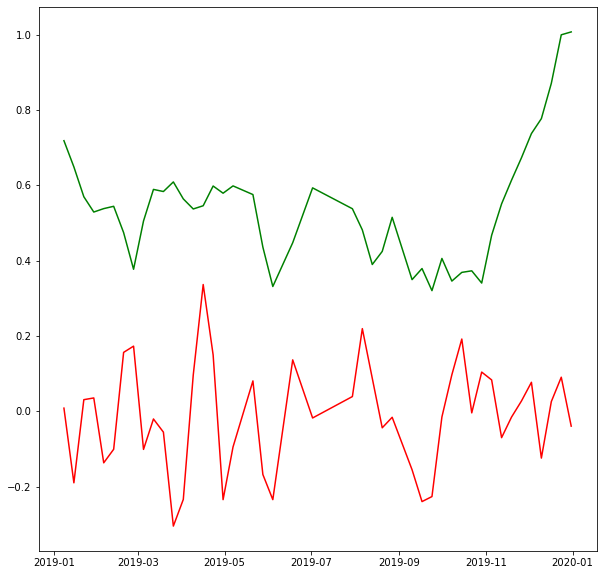

In [139]:
fig, ax=plt.subplots(figsize=(10,10))
ax.plot(ESI_ANOM[(ESI_ANOM['StationTriplet']=='2078:AL:SCAN')&(ESI_ANOM.index.year==2019)]['ESI_cumsum_anom'], label='ESI_cumsum_anom', color='green')
ax.plot(df[(df['station']=='2078:AL:SCAN')&(df.index.year==2019)]['1pentad-3pentad'], label='sv', color='red')

In [140]:
ESI_ANOM.rename(columns={'StationTriplet':'station'}, inplace=True)

In [141]:
ESI_ANOM.reset_index(inplace=True)

In [142]:
df

ESI       station  week_x  week_y   2inANOM   4inANOM   8inANOM  \
Date                                                                            
2002-02-12 -1.326  2053:AL:SCAN       7       7  0.834835 -0.643664  0.542349   
2002-02-19 -1.577  2053:AL:SCAN       8       8  0.164259 -1.027176  0.290153   
2002-02-26 -1.735  2053:AL:SCAN       9       9  0.106221 -1.050136  0.179310   
2002-03-05 -0.752  2053:AL:SCAN      10      10 -0.309406 -1.455401  0.104532   
2002-03-12 -2.121  2053:AL:SCAN      11      11 -0.113839 -1.455137  0.076642   
...           ...           ...     ...     ...       ...       ...       ...   
2020-12-02 -0.337  2181:AL:SCAN      49      49  1.621483  1.227094  1.383636   
2020-12-09  0.266  2181:AL:SCAN      50      50  1.309197  0.938780  0.903196   
2020-12-16 -0.068  2181:AL:SCAN      51      51  0.807112  0.612089  0.423563   
2020-12-23  0.715  2181:AL:SCAN      52      52  0.490286  0.302427 -0.436928   
2020-12-30 -1.414  2181:AL:SCAN      53      53       NaN       NaN       NaN   

            20inANOM  40inANOM     2in_pr  ...  4insma_pr1pentad  \
Date                                       ...                     
2002-02-12 -0.382594 -1.350406  78.965781  ...          0.261119   
2002-02-19 -0.570702 -0.278074  53.503881  ...          0.152080   
2002-02-26 -0.718167 -1.268593  51.350169  ...          0.146341   
2002-03-05 -1.160224 -1.585050  37.640757  ...          0.084648   
2002-03-12 -1.003007 -1.445378  44.233082  ...          0.086083   
...              ...       ...        ...  ...               ...   
2020-12-02  1.925959  1.081761  97.288729  ...          0.909091   
2020-12-09  0.887784  0.855720  93.123428  ...          0.826087   
2020-12-16  0.223647  0.281672  77.927189  ...          0.723320   
2020-12-23 -1.622440 -1.132620  65.267301  ...          0.604743   
2020-12-30       NaN       NaN        NaN  ...               NaN   

             4inANOMmean    4instd  1pentad-3pentad  ESI_cumsum  numNegative  \
Date                                                                           
2002-02-12 -1.019430e-16  0.961919              NaN      -1.326            0   
2002-02-19 -1.019430e-16  0.961919              NaN      -2.903            0   
2002-02-26 -1.019430e-16  0.961919        -0.013832      -4.638            1   
2002-03-05 -1.019430e-16  0.961919        -0.025020      -5.390            2   
2002-03-12 -1.019430e-16  0.961919         0.005275      -7.511            0   
...                  ...       ...              ...         ...          ...   
2020-12-02 -2.808469e-17  0.893095         0.178479     -12.936            0   
2020-12-09 -2.808469e-17  0.893095        -0.010648     -12.670            1   
2020-12-16 -2.808469e-17  0.893095        -0.170557     -12.738            2   
2020-12-23 -2.808469e-17  0.893095        -0.183012     -12.023            3   
2020-12-30 -2.808469e-17  0.893095              NaN     -13.437            0   

            sequenceNeg    sv_cat  esi_change severity_change  
Date                                                           
2002-02-12            1       NaN         NaN             NaN  
2002-02-19            2       NaN      -1.577             NaN  
2002-02-26            3 -0.099030      -1.735             NaN  
2002-03-05            4 -0.179132      -0.752       -0.011188  
2002-03-12            0  0.037768      -2.121        0.030295  
...                 ...       ...         ...             ...  
2020-12-02           36  0.814407      -0.337        0.454287  
2020-12-09           37 -0.048586       0.266       -0.189126  
2020-12-16           38 -0.778262      -0.068       -0.159910  
2020-12-23           39 -0.835093       0.715       -0.012455  
2020-12-30           40       NaN      -1.414             NaN  

[9674 rows x 35 columns]

In [143]:
df.reset_index(inplace=True)

In [144]:
new=df.merge(ESI_ANOM, on=['station', 'Date'])

In [145]:
new

Date    ESI       station  week_x  week_y   2inANOM   4inANOM  \
0    2002-02-12 -1.326  2053:AL:SCAN       7       7  0.834835 -0.643664   
1    2002-02-19 -1.577  2053:AL:SCAN       8       8  0.164259 -1.027176   
2    2002-02-26 -1.735  2053:AL:SCAN       9       9  0.106221 -1.050136   
3    2002-03-05 -0.752  2053:AL:SCAN      10      10 -0.309406 -1.455401   
4    2002-03-12 -2.121  2053:AL:SCAN      11      11 -0.113839 -1.455137   
...         ...    ...           ...     ...     ...       ...       ...   
9669 2020-12-02 -0.337  2181:AL:SCAN      49      49  1.621483  1.227094   
9670 2020-12-09  0.266  2181:AL:SCAN      50      50  1.309197  0.938780   
9671 2020-12-16 -0.068  2181:AL:SCAN      51      51  0.807112  0.612089   
9672 2020-12-23  0.715  2181:AL:SCAN      52      52  0.490286  0.302427   
9673 2020-12-30 -1.414  2181:AL:SCAN      53      53       NaN       NaN   

       8inANOM  20inANOM  40inANOM  ...   4inANOMmean    4instd  \
0     0.542349 -0.382594 -1.350406  ... -1.019430e-16  0.961919   
1     0.290153 -0.570702 -0.278074  ... -1.019430e-16  0.961919   
2     0.179310 -0.718167 -1.268593  ... -1.019430e-16  0.961919   
3     0.104532 -1.160224 -1.585050  ... -1.019430e-16  0.961919   
4     0.076642 -1.003007 -1.445378  ... -1.019430e-16  0.961919   
...        ...       ...       ...  ...           ...       ...   
9669  1.383636  1.925959  1.081761  ... -2.808469e-17  0.893095   
9670  0.903196  0.887784  0.855720  ... -2.808469e-17  0.893095   
9671  0.423563  0.223647  0.281672  ... -2.808469e-17  0.893095   
9672 -0.436928 -1.622440 -1.132620  ... -2.808469e-17  0.893095   
9673       NaN       NaN       NaN  ... -2.808469e-17  0.893095   

      1pentad-3pentad  ESI_cumsum  numNegative  sequenceNeg    sv_cat  \
0                 NaN      -1.326            0            1       NaN   
1                 NaN      -2.903            0            2       NaN   
2           -0.013832      -4.638            1            3 -0.099030   
3           -0.025020      -5.390            2            4 -0.179132   
4            0.005275      -7.511            0            0  0.037768   
...               ...         ...          ...          ...       ...   
9669         0.178479     -12.936            0           36  0.814407   
9670        -0.010648     -12.670            1           37 -0.048586   
9671        -0.170557     -12.738            2           38 -0.778262   
9672        -0.183012     -12.023            3           39 -0.835093   
9673              NaN     -13.437            0           40       NaN   

      esi_change  severity_change  ESI_cumsum_anom  
0            NaN              NaN        -0.787725  
1         -1.577              NaN        -0.921394  
2         -1.735              NaN        -1.068456  
3         -0.752        -0.011188        -1.132197  
4         -2.121         0.030295        -1.311978  
...          ...              ...              ...  
9669      -0.337         0.454287        -1.697137  
9670       0.266        -0.189126        -1.677912  
9671      -0.068        -0.159910        -1.682826  
9672       0.715        -0.012455        -1.631150  
9673      -1.414              NaN        -1.733346  

[9674 rows x 37 columns]

In [146]:
new['esi_change'] = new['ESI_cumsum_anom']-new['ESI_cumsum_anom'].shift(1)
new['severity_change']=new['1pentad-3pentad']-new['1pentad-3pentad'].shift(1)

In [147]:
date = []
priors = []
starts = []
change_deltas = []
esi_cumsum_anom_priors = []
esi_cumsum_anom_starts = []
esi_cumsum_anom_deltas = []
severities =[]
prior_severity =[]
start_severity=[]
seqNegs = []

for i in range(len(indexes)):
    subtract = values[i]
    index = indexes[i]
    start = index-subtract
    
    #flashdate 
    dateStart = new.iloc[start]['Date']
    date.append(dateStart)
    
    #esi_cumsum_anom change
    priorChange = new.iloc[start-1]['esi_change'].item() #index prior to flashdrought
    priors.append(priorChange) 
    
    startChange = new.iloc[start]['esi_change'].item() #index at start of flashdrought
    starts.append(startChange)
    
    change_delta = new.iloc[start+subtract]['esi_change'].item()-new.iloc[start]['esi_change'].item()
    change_deltas.append(change_delta)
    
    #severity of flash drought
    deltaSeverity = new.iloc[start+subtract]['1pentad-3pentad']-new.iloc[start]['1pentad-3pentad'] #end-start
    severities.append(deltaSeverity)
    
    #change in severitey prior and at start 
    priorSeverityChange = new.iloc[start-1]['severity_change'].item()
    startSeverityChange =new.iloc[start]['severity_change'].item()
    prior_severity.append(priorSeverityChange)
    start_severity.append(startSeverityChange)
    
    #drought duration
    seqNeg = new.iloc[start:start+subtract]['sequenceNeg'].max()
    seqNegs.append(seqNeg)
    
    #value of ESI_cumsum_anom at start and prior
    esi_anom_prior = new.iloc[start-1]['ESI_cumsum_anom'].item()
    esi_cumsum_anom_priors.append(esi_anom_prior)
    
    esi_anom_start = new.iloc[start]['ESI_cumsum_anom'].item()
    esi_cumsum_anom_starts.append(esi_anom_start)
    
    #value of ESI_cumsum_delta
    esi_anom_delta = new.iloc[start+subtract]['ESI_cumsum_anom']-new.iloc[start-1]['ESI_cumsum_anom'] #end-start
    esi_cumsum_anom_deltas.append(esi_anom_delta)

flashDroughts = pd.DataFrame()
flashDroughts['Date']=date
flashDroughts['prior_change']=priors #measuring the change between ESI timesteps prior to the flashDrought
flashDroughts['start_change']=starts #measuring the change between ESI timesteps at start of flashDrought
flashDroughts['change_delta']=change_deltas #measuring ESI change at end of timestep - beginning 
flashDroughts['FlashSeverityDelta']=severities #measuring change in severity from end to beginning 
flashDroughts['prior_severity']=prior_severity #measuring the severity prior to flash drought event
flashDroughts['start_severity']=start_severity #measuring the severity at the start of flash drought
flashDroughts['esi_cumsum_anom_prior']=esi_cumsum_anom_priors #esi anom prior to flash drought
flashDroughts['esi_cumsum_anom_start']=esi_cumsum_anom_starts #esi anom at start of flash drought
flashDroughts['esi_cumsum_anom_deltas']=esi_cumsum_anom_deltas #esi change in anomaly from end to beginning 
flashDroughts['FlashLength']=seqNegs #length of flash drought event


In [148]:
flashDroughts.set_index('Date')

prior_change  start_change  change_delta  FlashSeverityDelta  \
Date                                                                       
2020-12-30      0.051676     -0.102196      0.038455                 NaN   
2002-04-02      0.119175     -0.036871      0.083830           -0.267307   
2002-05-21      0.157912      0.086372     -0.035091           -0.322806   
2002-10-15      0.118667      0.180204     -0.347778           -0.250440   
2002-12-31     -0.136128      0.284037     -0.131127            0.093816   
...                  ...           ...           ...                 ...   
2018-04-16      0.096269      0.046544     -0.122938           -0.247270   
2018-06-11      0.005637      0.014672     -0.035342           -0.074389   
2018-08-27      0.081164      0.022839     -0.102629           -0.281617   
2018-11-19      0.007011      0.066492     -0.016623           -0.272421   
2018-12-31      0.113904      0.049869      0.002457                 NaN   

            prior_severity  start_severity  esi_cumsum_anom_prior  \
Date                                                                
2020-12-30       -0.012455             NaN              -1.631150   
2002-04-02        0.363955       -0.227721              -1.192802   
2002-05-21        0.522056       -0.089930              -1.206618   
2002-10-15        0.019964       -0.406852              -0.680416   
2002-12-31       -0.305179       -0.142592              -0.038768   
...                    ...             ...                    ...   
2018-04-16        0.074534       -0.091522              -0.057600   
2018-06-11        0.212568       -0.334775               0.108920   
2018-08-27        0.155763       -0.212793              -0.045819   
2018-11-19       -0.086537       -0.031153               0.007953   
2018-12-31       -0.168250       -0.195176               0.687474   

            esi_cumsum_anom_start  esi_cumsum_anom_deltas  FlashLength  
Date                                                                    
2020-12-30              -1.733346                0.498953          NaN  
2002-04-02              -1.229674               -0.171728          3.0  
2002-05-21              -1.120246                0.613677          8.0  
2002-10-15              -0.500212                0.621814          5.0  
2002-12-31               0.245269               -0.172152          4.0  
...                           ...                     ...          ...  
2018-04-16              -0.011055                0.117301          2.0  
2018-06-11               0.123591                0.007806          3.0  
2018-08-27              -0.022980               -0.100605          4.0  
2018-11-19               0.074445                0.729390          5.0  
2018-12-31               0.737343               -1.242102         41.0  

[802 rows x 10 columns]

In [149]:
flashDroughts.index = pd.to_datetime(flashDroughts['Date'])

<AxesSubplot:xlabel='Date', ylabel='FlashSeverityDelta'>

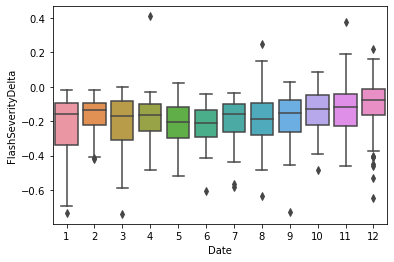

In [150]:
sns.boxplot(x=flashDroughts.index.month, y='FlashSeverityDelta', data=flashDroughts)

<AxesSubplot:xlabel='Date', ylabel='esi_cumsum_anom_deltas'>

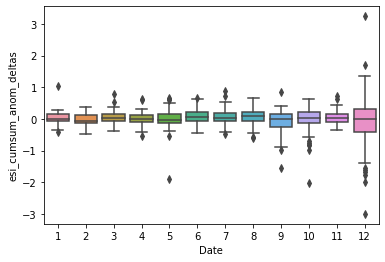

In [151]:
sns.boxplot(x=flashDroughts.index.month, y='esi_cumsum_anom_deltas', data=flashDroughts)

<AxesSubplot:xlabel='Date', ylabel='esi_cumsum_anom_start'>

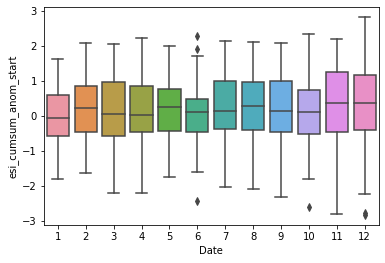

In [152]:
sns.boxplot(x=flashDroughts.index.month, y='esi_cumsum_anom_start', data=flashDroughts)

<AxesSubplot:xlabel='Date', ylabel='esi_cumsum_anom_prior'>

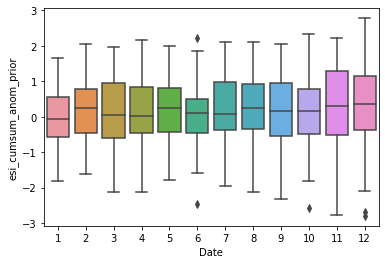

In [153]:
sns.boxplot(x=flashDroughts.index.month, y='esi_cumsum_anom_prior', data=flashDroughts)

<AxesSubplot:xlabel='Date', ylabel='start_change'>

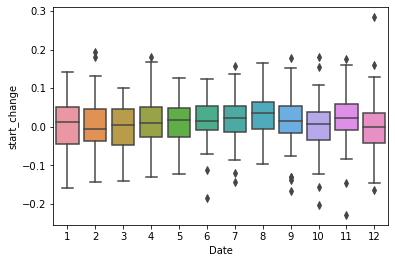

In [154]:
sns.boxplot(x=flashDroughts.index.month, y='start_change', data=flashDroughts)

<AxesSubplot:xlabel='Date', ylabel='prior_change'>

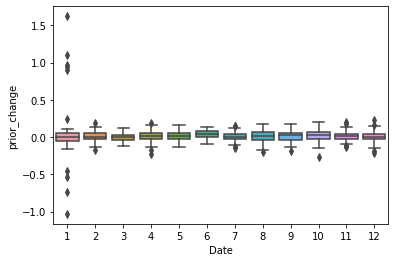

In [155]:
sns.boxplot(x=flashDroughts.index.month, y='prior_change', data=flashDroughts)

<AxesSubplot:xlabel='Date', ylabel='change_delta'>

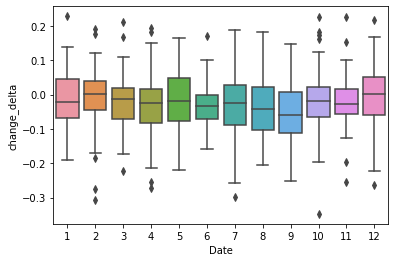

In [156]:
sns.boxplot(x=flashDroughts.index.month, y='change_delta', data=flashDroughts)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '(-2.822, -1.199]'),
  Text(1, 0, '(-1.199, -0.721]'),
  Text(2, 0, '(-0.721, -0.471]'),
  Text(3, 0, '(-0.471, -0.274]'),
  Text(4, 0, '(-0.274, -0.024]'),
  Text(5, 0, '(-0.024, 0.191]'),
  Text(6, 0, '(0.191, 0.385]'),
  Text(7, 0, '(0.385, 0.673]'),
  Text(8, 0, '(0.673, 0.95]'),
  Text(9, 0, '(0.95, 1.328]'),
  Text(10, 0, '(1.328, 1.669]'),
  Text(11, 0, '(1.669, 2.823]')])

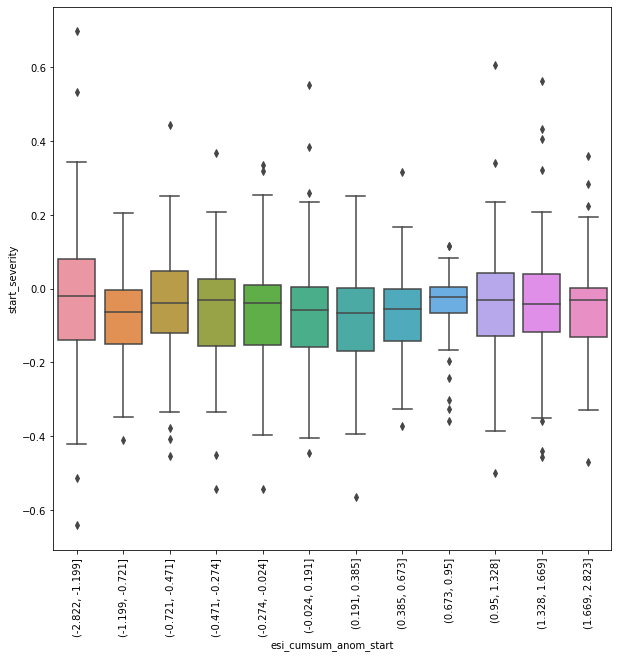

In [157]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x=pd.qcut(flashDroughts['esi_cumsum_anom_start'],12), y='start_severity', data=flashDroughts)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '(-2.8009999999999997, -1.183]'),
  Text(1, 0, '(-1.183, -0.737]'),
  Text(2, 0, '(-0.737, -0.484]'),
  Text(3, 0, '(-0.484, -0.293]'),
  Text(4, 0, '(-0.293, -0.0396]'),
  Text(5, 0, '(-0.0396, 0.169]'),
  Text(6, 0, '(0.169, 0.399]'),
  Text(7, 0, '(0.399, 0.681]'),
  Text(8, 0, '(0.681, 0.928]'),
  Text(9, 0, '(0.928, 1.34]'),
  Text(10, 0, '(1.34, 1.66]'),
  Text(11, 0, '(1.66, 2.777]')])

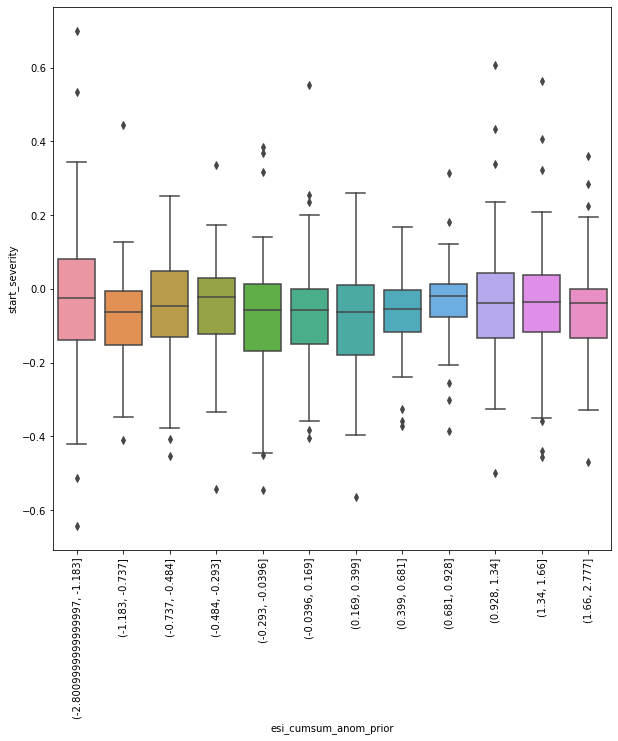

In [158]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x=pd.qcut(flashDroughts['esi_cumsum_anom_prior'],12), y='start_severity', data=flashDroughts)
plt.xticks(rotation=90)

In [159]:
from sklearn.metrics import confusion_matrix

In [160]:
flashDroughts

Date  prior_change  start_change  change_delta  \
Date                                                              
2020-12-30 2020-12-30      0.051676     -0.102196      0.038455   
2002-04-02 2002-04-02      0.119175     -0.036871      0.083830   
2002-05-21 2002-05-21      0.157912      0.086372     -0.035091   
2002-10-15 2002-10-15      0.118667      0.180204     -0.347778   
2002-12-31 2002-12-31     -0.136128      0.284037     -0.131127   
...               ...           ...           ...           ...   
2018-04-16 2018-04-16      0.096269      0.046544     -0.122938   
2018-06-11 2018-06-11      0.005637      0.014672     -0.035342   
2018-08-27 2018-08-27      0.081164      0.022839     -0.102629   
2018-11-19 2018-11-19      0.007011      0.066492     -0.016623   
2018-12-31 2018-12-31      0.113904      0.049869      0.002457   

            FlashSeverityDelta  prior_severity  start_severity  \
Date                                                             
2020-12-30                 NaN       -0.012455             NaN   
2002-04-02           -0.267307        0.363955       -0.227721   
2002-05-21           -0.322806        0.522056       -0.089930   
2002-10-15           -0.250440        0.019964       -0.406852   
2002-12-31            0.093816       -0.305179       -0.142592   
...                        ...             ...             ...   
2018-04-16           -0.247270        0.074534       -0.091522   
2018-06-11           -0.074389        0.212568       -0.334775   
2018-08-27           -0.281617        0.155763       -0.212793   
2018-11-19           -0.272421       -0.086537       -0.031153   
2018-12-31                 NaN       -0.168250       -0.195176   

            esi_cumsum_anom_prior  esi_cumsum_anom_start  \
Date                                                       
2020-12-30              -1.631150              -1.733346   
2002-04-02              -1.192802              -1.229674   
2002-05-21              -1.206618              -1.120246   
2002-10-15              -0.680416              -0.500212   
2002-12-31              -0.038768               0.245269   
...                           ...                    ...   
2018-04-16              -0.057600              -0.011055   
2018-06-11               0.108920               0.123591   
2018-08-27              -0.045819              -0.022980   
2018-11-19               0.007953               0.074445   
2018-12-31               0.687474               0.737343   

            esi_cumsum_anom_deltas  FlashLength  
Date                                             
2020-12-30                0.498953          NaN  
2002-04-02               -0.171728          3.0  
2002-05-21                0.613677          8.0  
2002-10-15                0.621814          5.0  
2002-12-31               -0.172152          4.0  
...                            ...          ...  
2018-04-16                0.117301          2.0  
2018-06-11                0.007806          3.0  
2018-08-27               -0.100605          4.0  
2018-11-19                0.729390          5.0  
2018-12-31               -1.242102         41.0  

[802 rows x 11 columns]

In [161]:
def get_signs(x):
    if x >= 0:
        return 0
    else:
        return 1 #means drought or negative score

In [162]:
flashDroughts['start_severity_sign'] = flashDroughts['start_severity'].apply(get_signs)
flashDroughts['esi_cumsum_anom_start_severity_sign']=flashDroughts['esi_cumsum_anom_start'].apply(get_signs)
flashDroughts['esi_cumsum_anom_prior_severity_sign']=flashDroughts['esi_cumsum_anom_prior'].apply(get_signs)

In [163]:
flashDroughts.dropna()

Date  prior_change  start_change  change_delta  \
Date                                                              
2002-04-02 2002-04-02      0.119175     -0.036871      0.083830   
2002-05-21 2002-05-21      0.157912      0.086372     -0.035091   
2002-10-15 2002-10-15      0.118667      0.180204     -0.347778   
2002-12-31 2002-12-31     -0.136128      0.284037     -0.131127   
2003-03-05 2003-03-05     -0.062809      0.068403     -0.223093   
...               ...           ...           ...           ...   
2018-01-29 2018-01-29      0.111880     -0.037510      0.070323   
2018-04-16 2018-04-16      0.096269      0.046544     -0.122938   
2018-06-11 2018-06-11      0.005637      0.014672     -0.035342   
2018-08-27 2018-08-27      0.081164      0.022839     -0.102629   
2018-11-19 2018-11-19      0.007011      0.066492     -0.016623   

            FlashSeverityDelta  prior_severity  start_severity  \
Date                                                             
2002-04-02           -0.267307        0.363955       -0.227721   
2002-05-21           -0.322806        0.522056       -0.089930   
2002-10-15           -0.250440        0.019964       -0.406852   
2002-12-31            0.093816       -0.305179       -0.142592   
2003-03-05           -0.268502        0.073620       -0.035353   
...                        ...             ...             ...   
2018-01-29           -0.235864       -0.255804       -0.022522   
2018-04-16           -0.247270        0.074534       -0.091522   
2018-06-11           -0.074389        0.212568       -0.334775   
2018-08-27           -0.281617        0.155763       -0.212793   
2018-11-19           -0.272421       -0.086537       -0.031153   

            esi_cumsum_anom_prior  esi_cumsum_anom_start  \
Date                                                       
2002-04-02              -1.192802              -1.229674   
2002-05-21              -1.206618              -1.120246   
2002-10-15              -0.680416              -0.500212   
2002-12-31              -0.038768               0.245269   
2003-03-05              -0.224651              -0.156248   
...                           ...                    ...   
2018-01-29              -0.520081              -0.557592   
2018-04-16              -0.057600              -0.011055   
2018-06-11               0.108920               0.123591   
2018-08-27              -0.045819              -0.022980   
2018-11-19               0.007953               0.074445   

            esi_cumsum_anom_deltas  FlashLength  start_severity_sign  \
Date                                                                   
2002-04-02               -0.171728          3.0                    1   
2002-05-21                0.613677          8.0                    1   
2002-10-15                0.621814          5.0                    1   
2002-12-31               -0.172152          4.0                    1   
2003-03-05               -0.396347          3.0                    1   
...                            ...          ...                  ...   
2018-01-29                0.192972          4.0                    1   
2018-04-16                0.117301          2.0                    1   
2018-06-11                0.007806          3.0                    1   
2018-08-27               -0.100605          4.0                    1   
2018-11-19                0.729390          5.0                    1   

            esi_cumsum_anom_start_severity_sign  \
Date                                              
2002-04-02                                    1   
2002-05-21                                    1   
2002-10-15                                    1   
2002-12-31                                    0   
2003-03-05                                    1   
...                                         ...   
2018-01-29                                    1   
2018-04-16                                    1   
2018-06-11                                    0   
2018-08

In [164]:
y_pred = flashDroughts['esi_cumsum_anom_start_severity_sign']
x_true = flashDroughts['start_severity_sign']
confusionData=confusion_matrix(y_pred,x_true)

[Text(0.5, 51.0, 'Soil Moisture Drought Severity Sign (1=negative, 0=positve) at Start of Event'),
 Text(51.0, 0.5, 'ESI_cumsum_anom sign at start of event')]

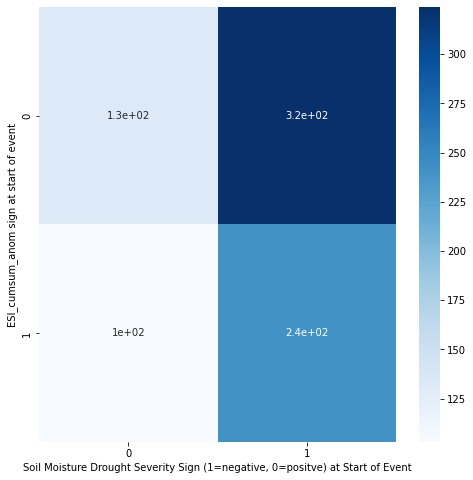

In [165]:
fig, ax = plt.subplots(figsize=(8,8))
hm = sns.heatmap(confusionData, annot=True, cmap="Blues") 
hm.set(xlabel='Soil Moisture Drought Severity Sign (1=negative, 0=positve) at Start of Event', ylabel='ESI_cumsum_anom sign at start of event')

In [166]:
y_pred = flashDroughts['esi_cumsum_anom_prior_severity_sign']
x_true = flashDroughts['start_severity_sign']
confusionData=confusion_matrix(x_true, y_pred)

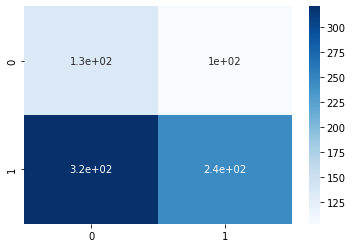

In [167]:
hm = sns.heatmap(confusionData, annot=True, cmap="Blues") 

In [170]:
#going to average ESI over 2, 4, and 8 week intervals and see if they are helpful
for s in new['station'].unique():
    print(s)

2053:AL:SCAN
2055:AL:SCAN
2056:AL:SCAN
2057:AL:SCAN
2078:AL:SCAN
2114:AL:SCAN
2115:AL:SCAN
2113:AL:SCAN
2173:AL:SCAN
2178:AL:SCAN
2179:AL:SCAN
2177:AL:SCAN
2175:AL:SCAN
2176:AL:SCAN
2174:AL:SCAN
2182:AL:SCAN
2180:AL:SCAN
2181:AL:SCAN


In [179]:
store = {}
for s in df.station.unique():
    stationFrame=df[df['station']==s]
    stationFrame['ESI2week']=stationFrame['ESI'].rolling(2).mean()
    stationFrame['ESI4week']=stationFrame['ESI'].rolling(4).mean()
    stationFrame['ESI8week']=stationFrame['ESI'].rolling(8).mean()
    stationFrame['ESI2weekcumsum']=stationFrame['ESI2week'].cumsum()
    stationFrame['ESI4weekcumsum']=stationFrame['ESI4week'].cumsum()
    stationFrame['ESI8weekcumsum']=stationFrame['ESI8week'].cumsum()
    store[s]=stationFrame
testFrame = pd.concat(store, axis=0)

/tmp/ipykernel_27158/1642001974.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stationFrame['ESI2week']=stationFrame['ESI'].rolling(2).mean()
/tmp/ipykernel_27158/1642001974.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stationFrame['ESI4week']=stationFrame['ESI'].rolling(4).mean()
/tmp/ipykernel_27158/1642001974.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

/tmp/ipykernel_27158/1642001974.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stationFrame['ESI8weekcumsum']=stationFrame['ESI8week'].cumsum()
/tmp/ipykernel_27158/1642001974.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stationFrame['ESI2week']=stationFrame['ESI'].rolling(2).mean()
/tmp/ipykernel_27158/1642001974.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

/tmp/ipykernel_27158/1642001974.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stationFrame['ESI2week']=stationFrame['ESI'].rolling(2).mean()
/tmp/ipykernel_27158/1642001974.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stationFrame['ESI4week']=stationFrame['ESI'].rolling(4).mean()
/tmp/ipykernel_27158/1642001974.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [180]:
testFrame.corr()

ESI        week_x        week_y       2inANOM  \
ESI                1.000000 -2.743910e-02 -2.743910e-02  2.690226e-01   
week_x            -0.027439  1.000000e+00  1.000000e+00 -9.560318e-17   
week_y            -0.027439  1.000000e+00  1.000000e+00 -9.560318e-17   
2inANOM            0.269023 -9.560318e-17 -9.560318e-17  1.000000e+00   
4inANOM            0.259316  4.419061e-17  4.419061e-17  7.231285e-01   
8inANOM            0.237951 -2.202999e-17 -2.202999e-17  6.662089e-01   
20inANOM           0.210243 -7.588695e-17 -7.588695e-17  5.879132e-01   
40inANOM           0.174788 -1.411420e-16 -1.411420e-16  4.261916e-01   
2in_pr             0.268062 -1.458635e-03 -1.458635e-03  9.877345e-01   
4in_pr             0.256210  1.943870e-03  1.943870e-03  7.152452e-01   
8in_pr             0.240420  2.786927e-03  2.786927e-03  6.699781e-01   
20in_pr            0.209854  3.734767e-03  3.734767e-03  5.909172e-01   
40in_pr            0.174761 -5.817177e-03 -5.817177e-03  4.208855e-01   
2inSMSDC          -0.121212 -1.904137e-02 -1.904137e-02 -9.609251e-01   
4inSMSDC          -0.156123  7.462686e-03  7.462686e-03 -4.436765e-01   
8inSMSDC          -0.108232 -1.126429e-03 -1.126429e-03 -3.450547e-01   
20inSMSDC         -0.077681  3.421613e-02  3.421613e-02 -2.707533e-01   
40inSMSDC         -0.062993 -7.725341e-02 -7.725341e-02 -2.096014e-01   
Category          -0.171604  3.772613e-02  3.772613e-02 -1.795117e-01   
4inANOMsma3pentad  0.228908 -1.205455e-03 -1.205455e-03  6.007516e-01   
4insma_pr3pentad   0.228267  2.675205e-03  2.675205e-03  5.856915e-01   
4inANOMsma1pentad  0.259316  4.419061e-17  4.419061e-17  7.231285e-01   
4insma_pr1pentad   0.257988  1.660254e-03  1.660254e-03  7.158267e-01   
4inANOMmean        0.015533  1.919710e-03  1.919710e-03 -6.362141e-17   
4instd            -0.009368  2.344247e-03  2.344247e-03 -2.713369e-15   
1pentad-3pentad    0.054508 -9.195401e-03 -9.195401e-03  2.483808e-01   
ESI_cumsum         0.277702  1.338362e-02  1.338362e-02  2.213848e-01   
numNegative       -0.035265  7.490688e-02  7.490688e-02 -1.460781e-01   
sequenceNeg        0.020875  1.717453e-01  1.717453e-01  2.955570e-02   
sv_cat             0.054399 -9.974531e-03 -9.974531e-03  2.457951e-01   
esi_change         0.468494  3.788140e-02  3.788140e-02  9.677901e-02   
severity_change    0.019144  5.832711e-03  5.832711e-03  1.190512e-01   
ESI2week           0.793030 -3.155040e-02 -3.155040e-02  2.917854e-01   
ESI4week           0.587953 -4.106973e-02 -4.106973e-02  2.875592e-01   
ESI8week           0.443028 -4.670890e-02 -4.670890e-02  2.876228e-01   
ESI2weekcumsum     0.028798  2.046480e-02  2.046480e-02  1.177395e-02   
ESI4weekcumsum     0.010578  2.219674e-02  2.219674e-02  3.540888e-03   
ESI8weekcumsum    -0.005357  2.514315e-02  2.514315e-02 -7.348833e-03   

                        4inANOM       8inANOM      20inANOM      40inANOM  \
ESI                2.593155e-01  2.379506e-01  2.102425e-01  1.747882e-01   
week_x             4.419061e-17 -2.202999e-17 -7.588695e-17 -1.411420e-16   
week_y             4.419061e-17 -2.202999e-17 -7.588695e-17 -1.411420e-16   
2inANOM            7.231285e-01  6.662089e-01  5.879132e-01  4.261916e-01   
4inANOM            1.000000e+00  7.249723e-01  5.776336e-01  3.978371e-01   
8inANOM            7.249723e-01  1.000000e+00  6.596072e-01  4.505753e-01   
20inANOM           5.776336e-01  6.596072e-01  1.000000e+00  4.936700e-01   
40inANOM           3.978371e-01  4.505753e-01  4.936700e-01  1.000000e+00   
2in_pr             7.178616e-01  6.626749e-01  5.851576e-01  4.283206e-01   
4in_pr             9.871021e-01  7.136027e-01  5.731980e-01  3.910156e-01   
8in_pr             7.235237e-01  9.795786e-01  6.524692e-01  4.643355e-01   
20in_pr            5.761589e-01  6.534254e-01  9.785143e-01  4.960005e-01   
40in_pr            3.899748e-01  4.462323e-01  4.918328e-01  9.878301e-01   
2inSMSDC          -3.890289e-01 -3.401423e-01 -2.919631e-01 -2.169724e-01   
4inSMSDC          -9.

In [183]:
testFrame.set_index('Date', inplace=True)

In [187]:
test = testFrame[(testFrame['station']=='2078:AL:SCAN')&(testFrame.index.year==2019)].sort_index(inplace=True)